In [10]:
#Inicialización: borra todo y carga librerías (se pueden instalar fácilmente si no las tienen):
# install.packages("libreríaquequiero")

#Borra consola, variables y funciones definidas en el entorno Global
rm(list = setdiff(ls(), lsf.str()));
rm(list=lsf.str());
cat("\014")

#librerías, temas
suppressMessages(library("crayon")); suppressMessages(library("ggplot2"));
suppressMessages(library("gridExtra"));suppressMessages(library("latex2exp"))
library(xtable)
library(IRdisplay)
library(repr)
#opciones de ploteo ggplot2
temajuan3 <- theme(
    legend.title = element_text(size = 14),
    panel.background = element_rect(fill = "gray93"),
    legend.box = "vertical",
    legend.direction = "vertical",
    legend.key.height = unit(0.1,"snpc"),
    legend.key.width  = unit(0.1,"snpc"),
    axis.line = element_line(size = 0.5, lineend = "square"),
    axis.ticks = element_line(size = 1, colour = "black"),
    panel.border = element_rect(size = 1, fill = NA ),
    axis.title = element_text(size = 24),
    axis.text.x  = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    legend.background = element_blank(),
    legend.position = c(0.3,0.8),
    legend.key = element_blank(),
    legend.text = element_text(size = 20)
    )
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
fig(width = 24, heigth = 12)
setwd("/home/juan/Documentos/Docencia/fexpi/")


Attaching package: ‘IRdisplay’


The following object is masked from ‘package:xtable’:

    display




# Clase 3 (Apunte para estudiar soles): Graficación
### (con escenas de la vida real)


<img src="https://media1.tenor.com/images/2697a170d27ca031db9b7e96ec1b9e41/tenor.gif?itemid=11865968" width="800"/>

# Graficación

Los gráficos son la forma preferida de presentar resultados en ciencias, y son en general mucho más claros que una tabla, mostrando tendencias y relaciones entre variables.

Como los gráficos en ciencia son ***portadores de sentido*** (llevan un mensaje), es necesario entender qué elementos son importantes en un gráfico. De hecho, hay toda una **semiología** de gráficos, que hay que ir aprendiendo de a poco. Semiología quiere decir la ***lógica o estudio de los signos***, del griego ($\sigma \eta \mu \epsilon \iota \omega \tau \iota \kappa\text{ó}\varsigma$), semeiotikós, signo.

La semiología es "la ciencia que trata de los sistemas de comunicación dentro de las sociedades humanas,estudiando las propiedades generales de los sistemas de signos, como base para la comprensión de toda actividad humana". Quien vea los gráficos que producimos, va a intentar extraer información, siempre y cuando nosotros hayamos presentado los datos de manera ***entendible***, es decir, semiológicamente aceptable.

Si bien puede parecer ***naíf***, la presentación de los gráficos siempre demanda atención, estudio y tiempo. A primera vista parece que los gráficos son algo ***cuasi automático*** pero no van a tardar en darse cuenta que, como siempre, hay cosas aparentemente simples que, claro, no lo son tanto.

En lo que sigue, vamos a ver una introducción a ciertos aspectos ineludibles de la tarea de construir gráficos.

# Paquetes de Graficación en R

R tiene muchos paquetes de graficación, de los cuales quien escribe usa dos:

* El paquete ***base*** de graficación (que viene con la instalación de R)

* `ggplot2`, que es bastante popular y hay que instalarlo mediante `install.packages("ggplot2")`.

Los paquetes de graficación tienen distintas posibilidades, vamos a darle una mirada al primero que es el más simple, aunque termina siendo un poco árido porque hay que especificar mucho a mano: siempre recordemos copipastear.

## 1. Histogramas

Veremos un tipo de gráfico muy común en estadística: el histograma. Primero comenzaremos definiéndo un histograma como un gráfico de barras.

+ En las abcisas (eje horizontal) está nuestra variable partida en algún número de intervalos, por ejemplo, en 8 veces, a cada intervalo lo llamamos formalmente ***clase***.

+ En el eje vertical se grafica la frecuencia de aparición o frecuencia absoluta, para cada intervalo de las abscisas.

Para ver esto, vamos a cargar unos datos del acelerómetro de un teléfono celular en reposo, uno de los archivos que utilizamos en la tarea 2:

In [12]:
setwd("/home/juan/Documentos/Docencia/fexpi/2019/Laboratorios/Laboratorio4/Datos/") #indica un nuevo directorio
datos <- read.csv(file = "00.tsv", sep = "\t", header = F); datos <- datos[, c(-1,-2,-6)];
colnames(datos) <- c("gx","gy", "gz"); head(datos, 3)

gx     gy     gz   
1 -0.166  0.003 9.892
2 -0.115 -0.010 9.867
3 -0.044 -0.002 9.895

La variable datos tiene la descomposición del vector de la gravedad en las componentes (cuyas columnas ya bautizamos `gx`, `gy` y `gz`). Ahora vamos a calcular el módulo de la gravedad por parte del acelerómetro, sumando los cuadrados de las componentes y calculando la raíz cuadrada:

In [13]:
datos$g <- sqrt(datos$gx^2 + datos$gy^2 + datos$gz^2); head(datos, 3)

gx     gy     gz    g       
1 -0.166  0.003 9.892 9.893393
2 -0.115 -0.010 9.867 9.867675
3 -0.044 -0.002 9.895 9.895098

los valores del módulo de $g (m/s ^2)$ que obtuvimos no son ***todos iguales***, obvio, porque la repetición de medidas en general arroja una dispersión de valores. La forma habitual de ver dispersión de valores en ***una*** variable es el ***histograma***.

#### 1. Histogramas

El histograma nos da una idea de cómo se distribuyen los valores obtenidos en las mediciones y es una de las gráficas más utilizadas a la hora de mostrar resultados, con lo cual es muy probable que conozcan este tipo de gráficas. Para hacer la gráfica en R -una de las formas básicas, no la más "bonita"- podemos utilizar la función \textit{hist(nombre de la variable)}:

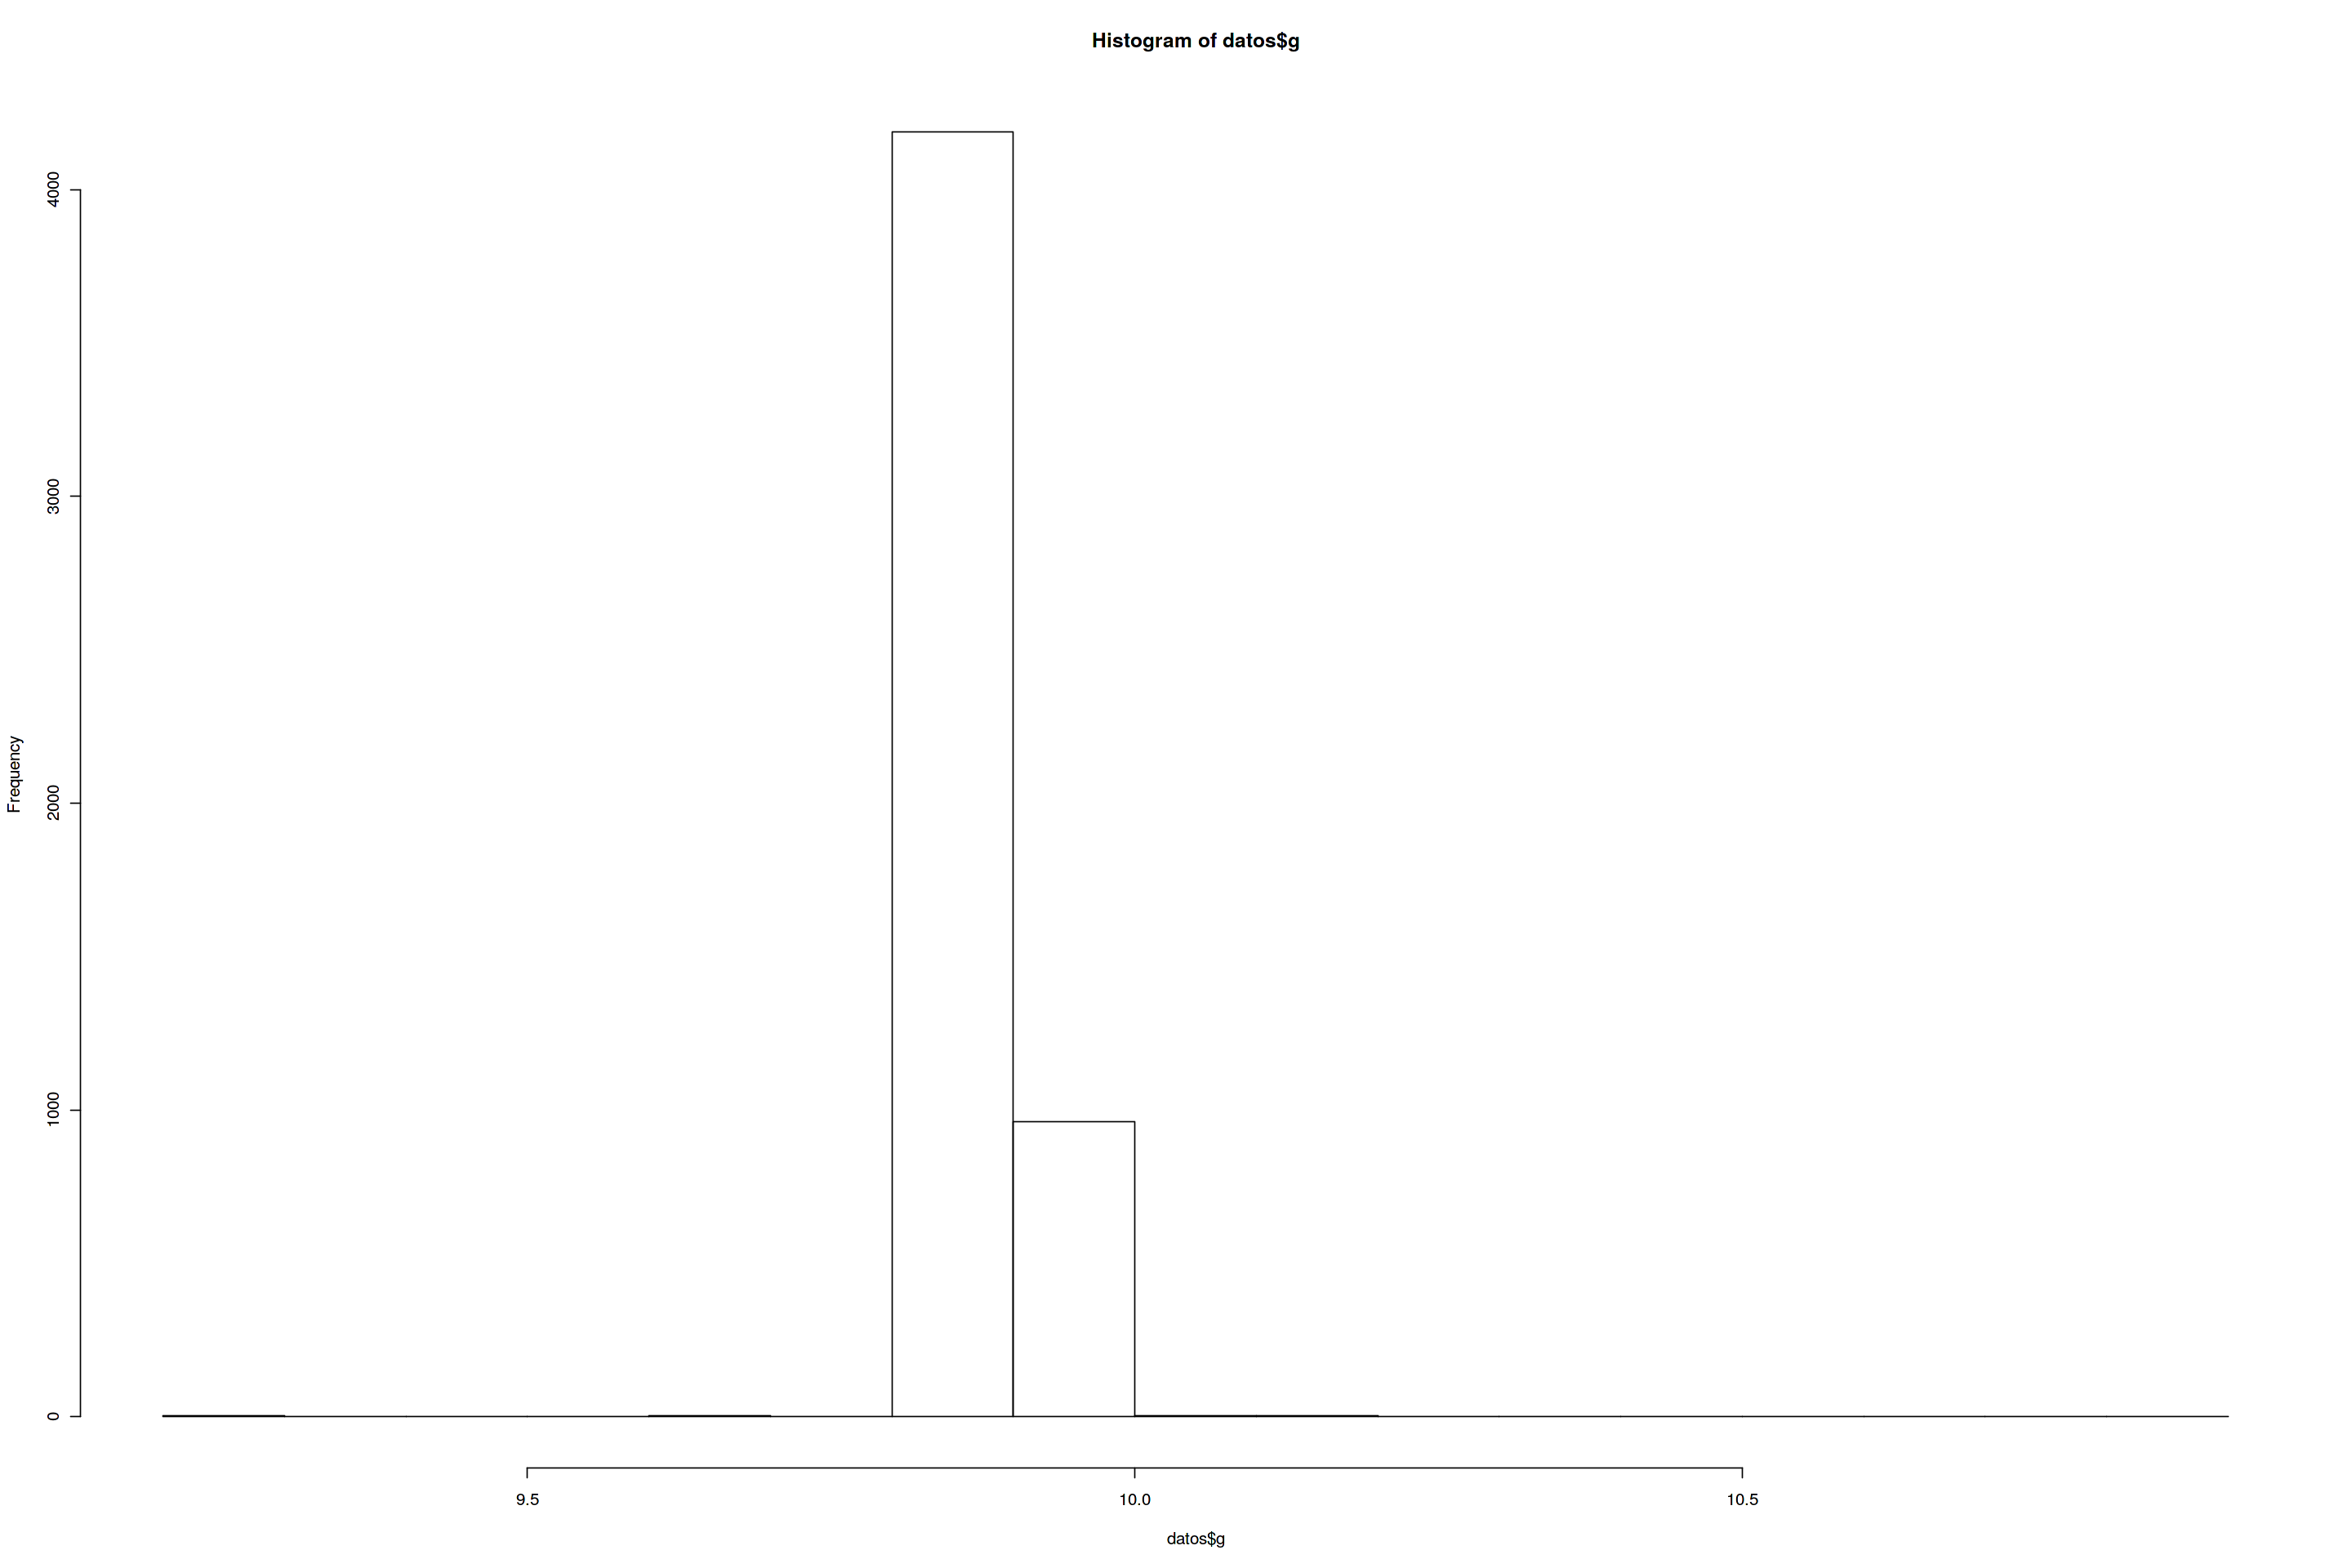

In [15]:
fig(24,16)
hist(datos$g)

Ojo que parece que los puntos extremos (outliers) a la derecha del gráfico, se están comiendo la información de la variable: esto es por una cuestion de escalas, ya que al apretar el botón del teléfono para dejar de registrar, parece que algunas medidas registraron con el sacudón. Esto se puede ver fácil en el gráfico de dispersión:

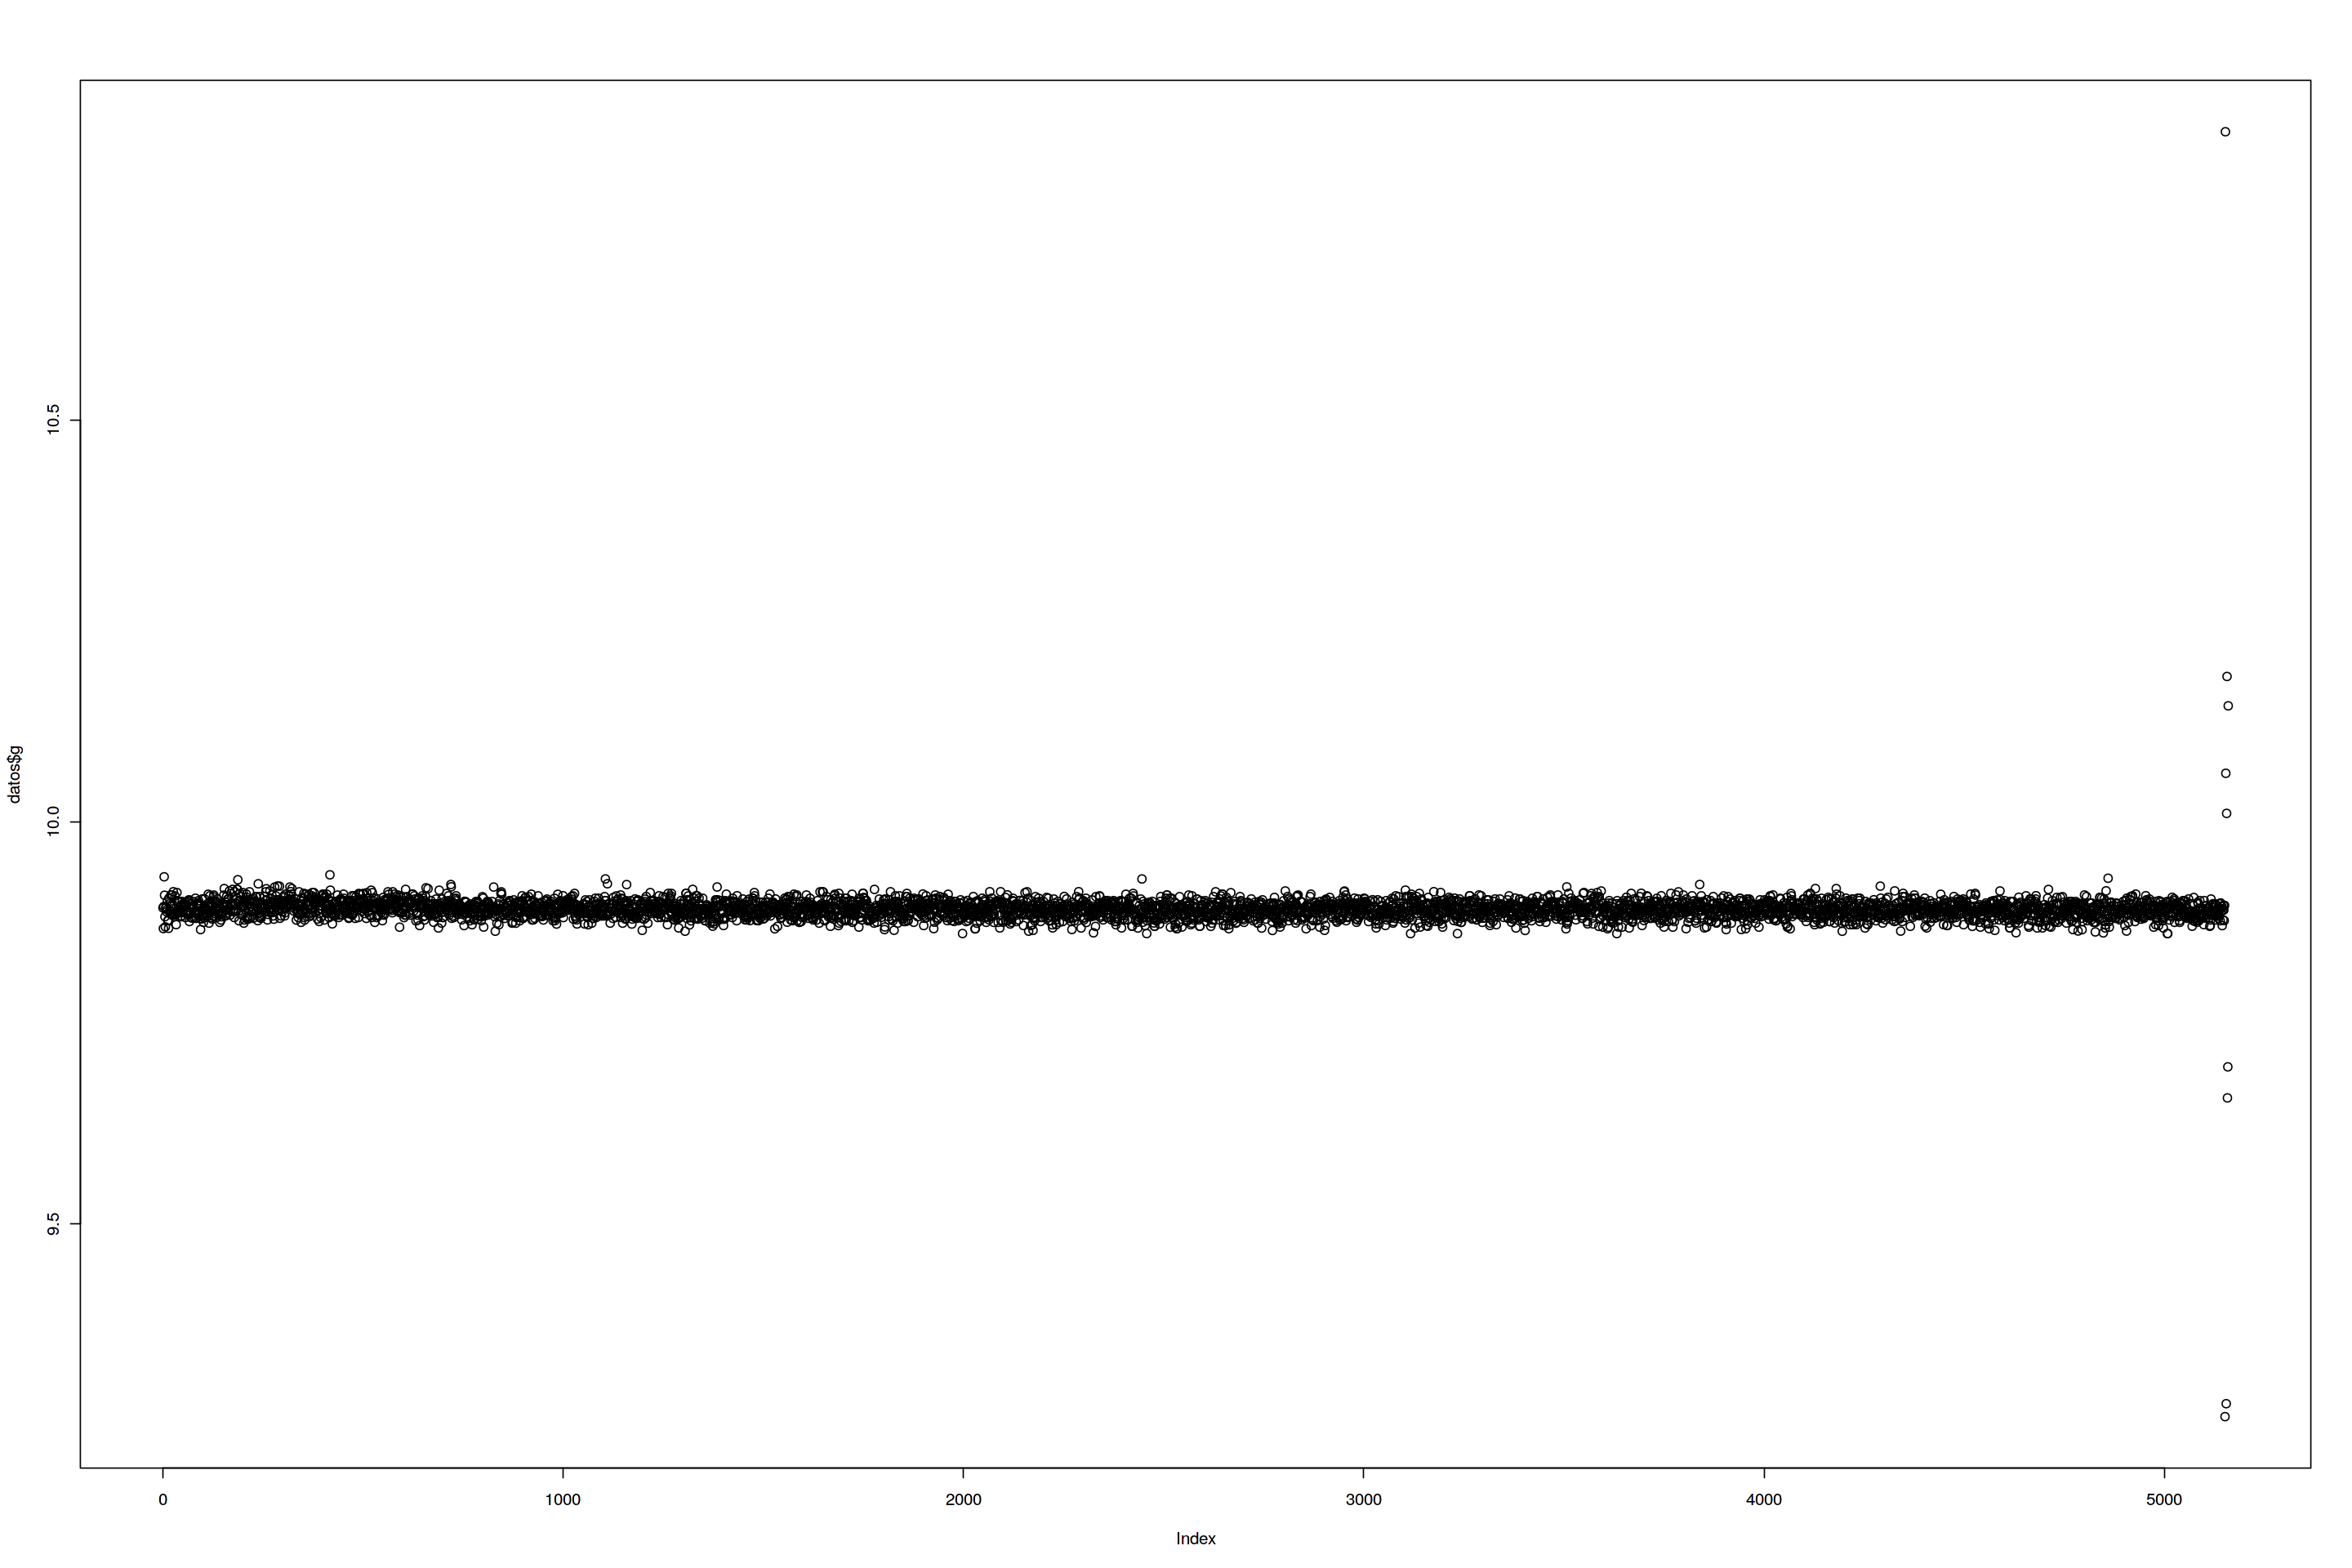

In [16]:
plot(datos$g)

sacamos los últimos diez valores (esto que estamos haciendo es ***limpiar*** los datos de una manera rústica):

In [18]:
datos <- datos[(1:(nrow(datos) - 10)), ]; #saca últimos diez datos

plot(datos$g) #grafica g vs número de medida, cambia el rango del eje vertical y se ve mejor la dispersión

Ahora nuestros datos deben quedar mejor en el histograma:

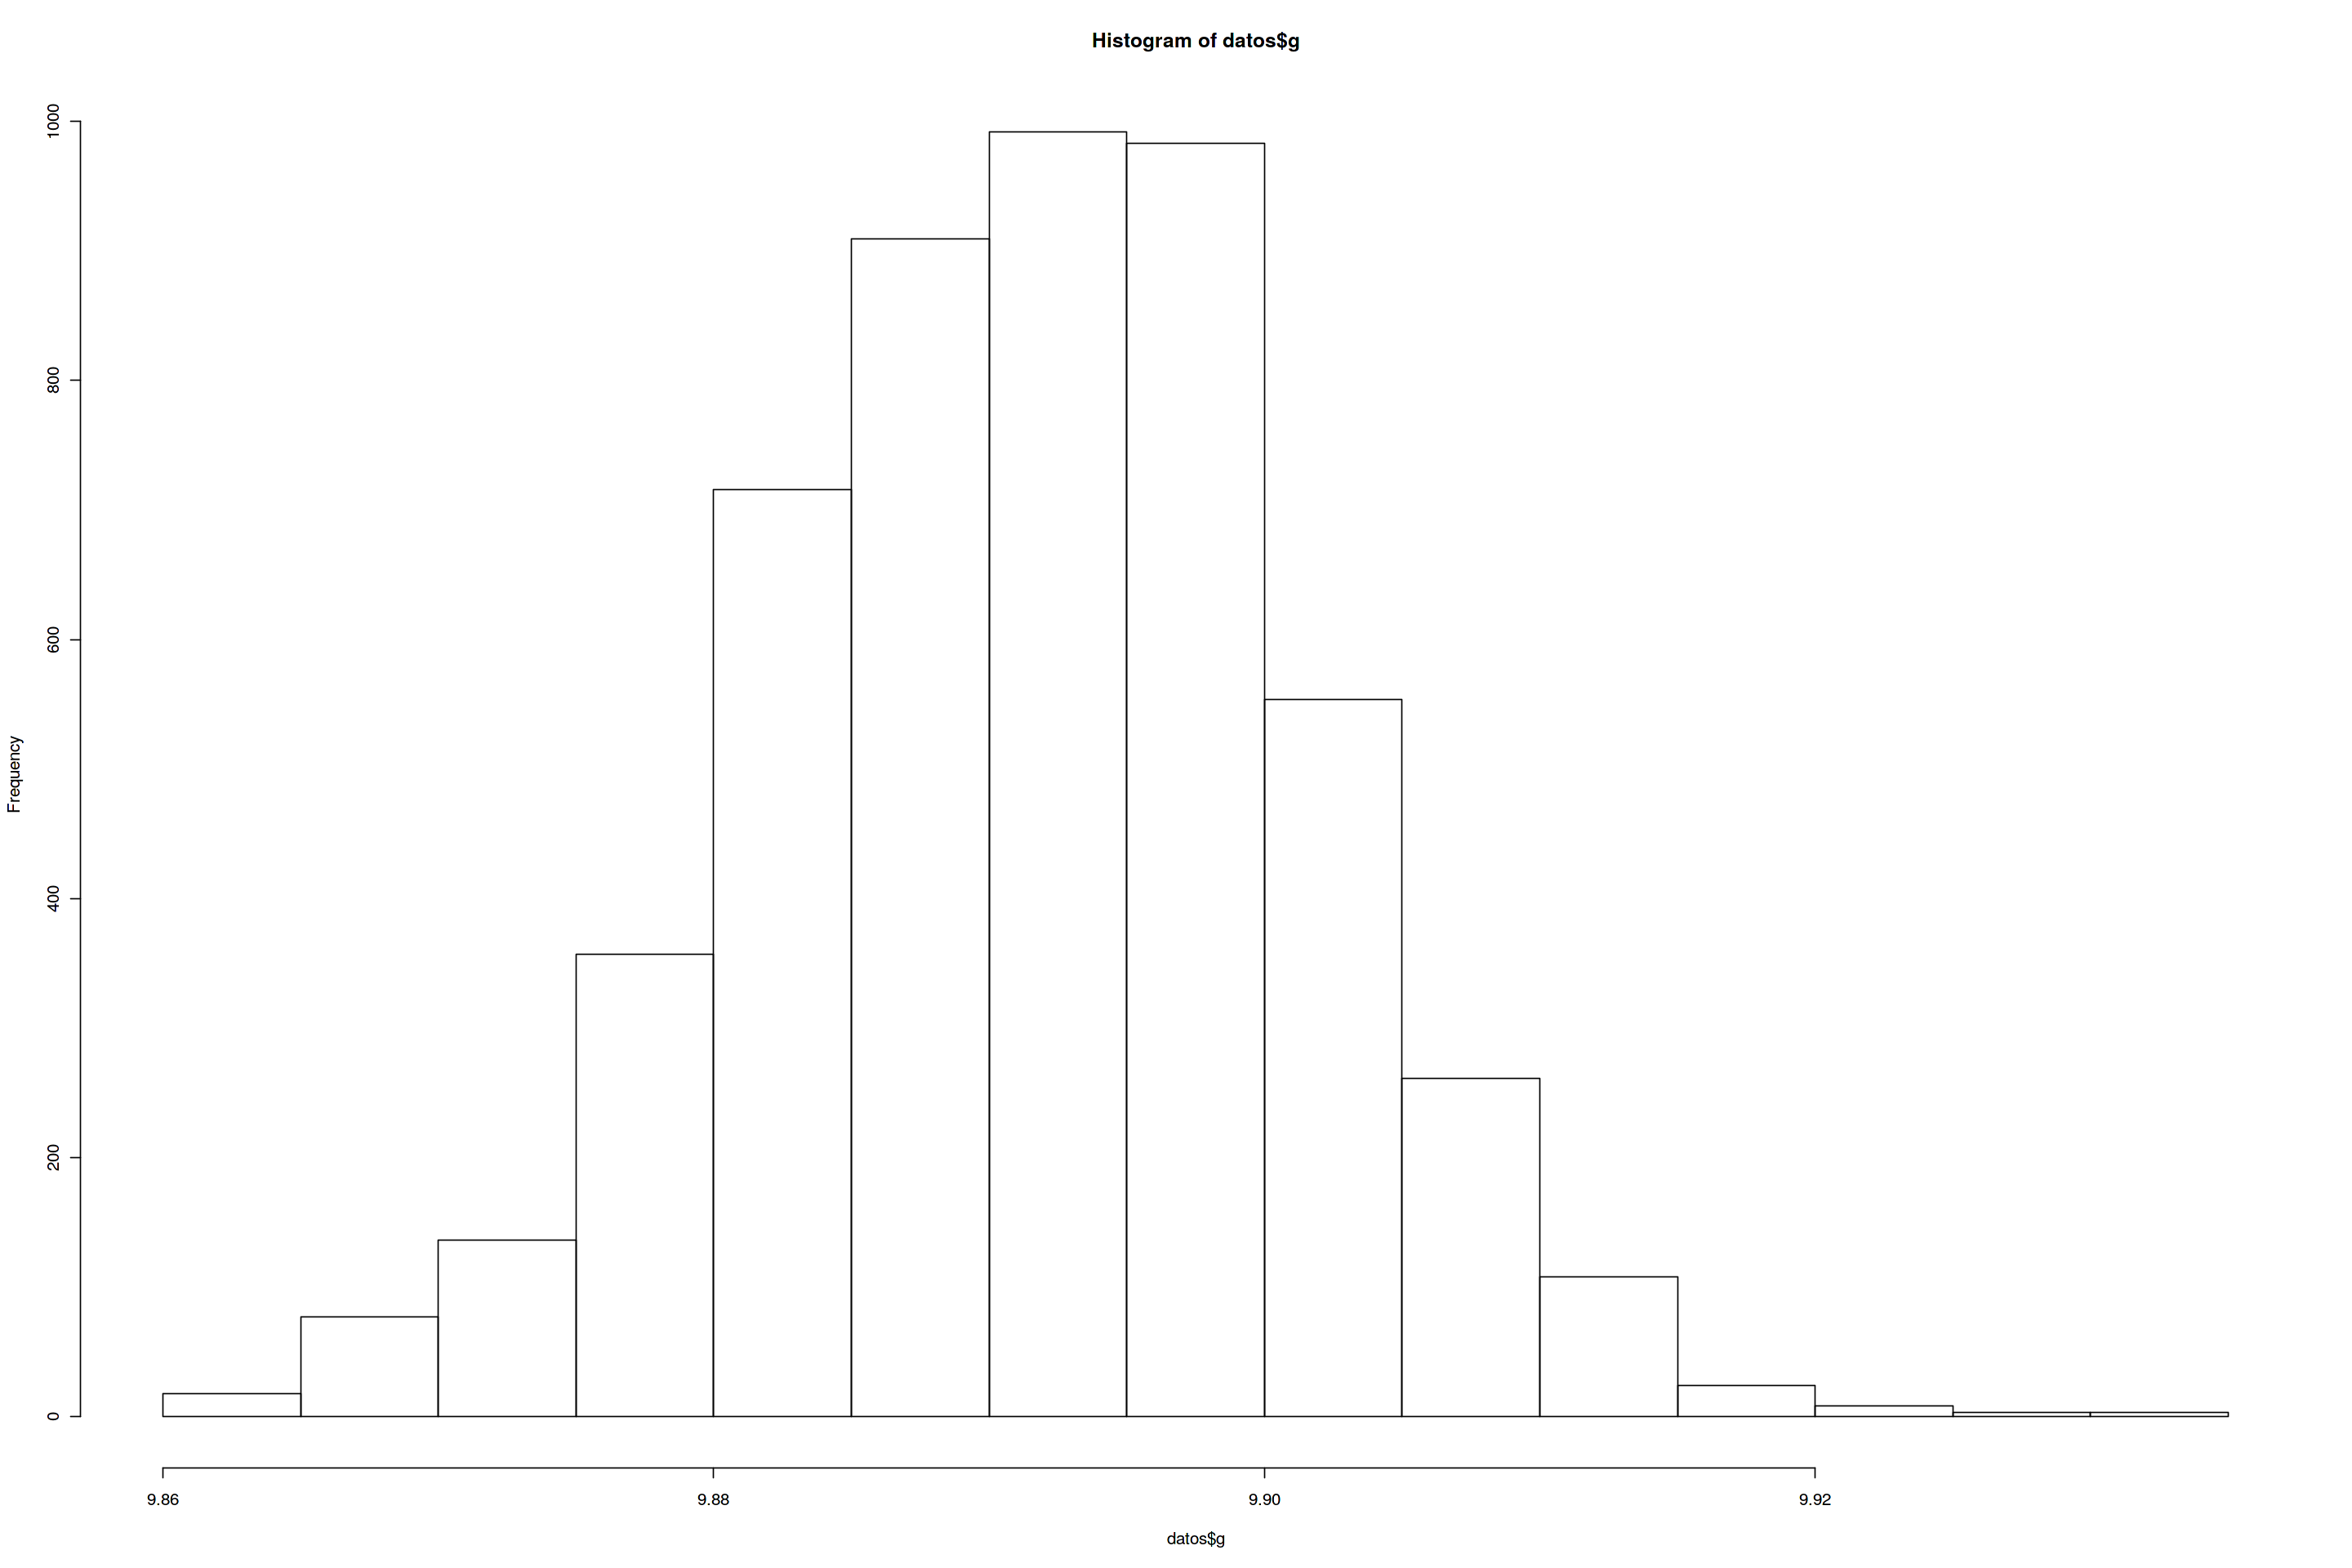

In [19]:
hist(datos$g)

La cantidad de clases, es decir, la cantidad de barritas, es importante: se ven más o menos detalles. La cantidad de clases se puede modificar mediante el argumento \textit{breaks}, como sigue:

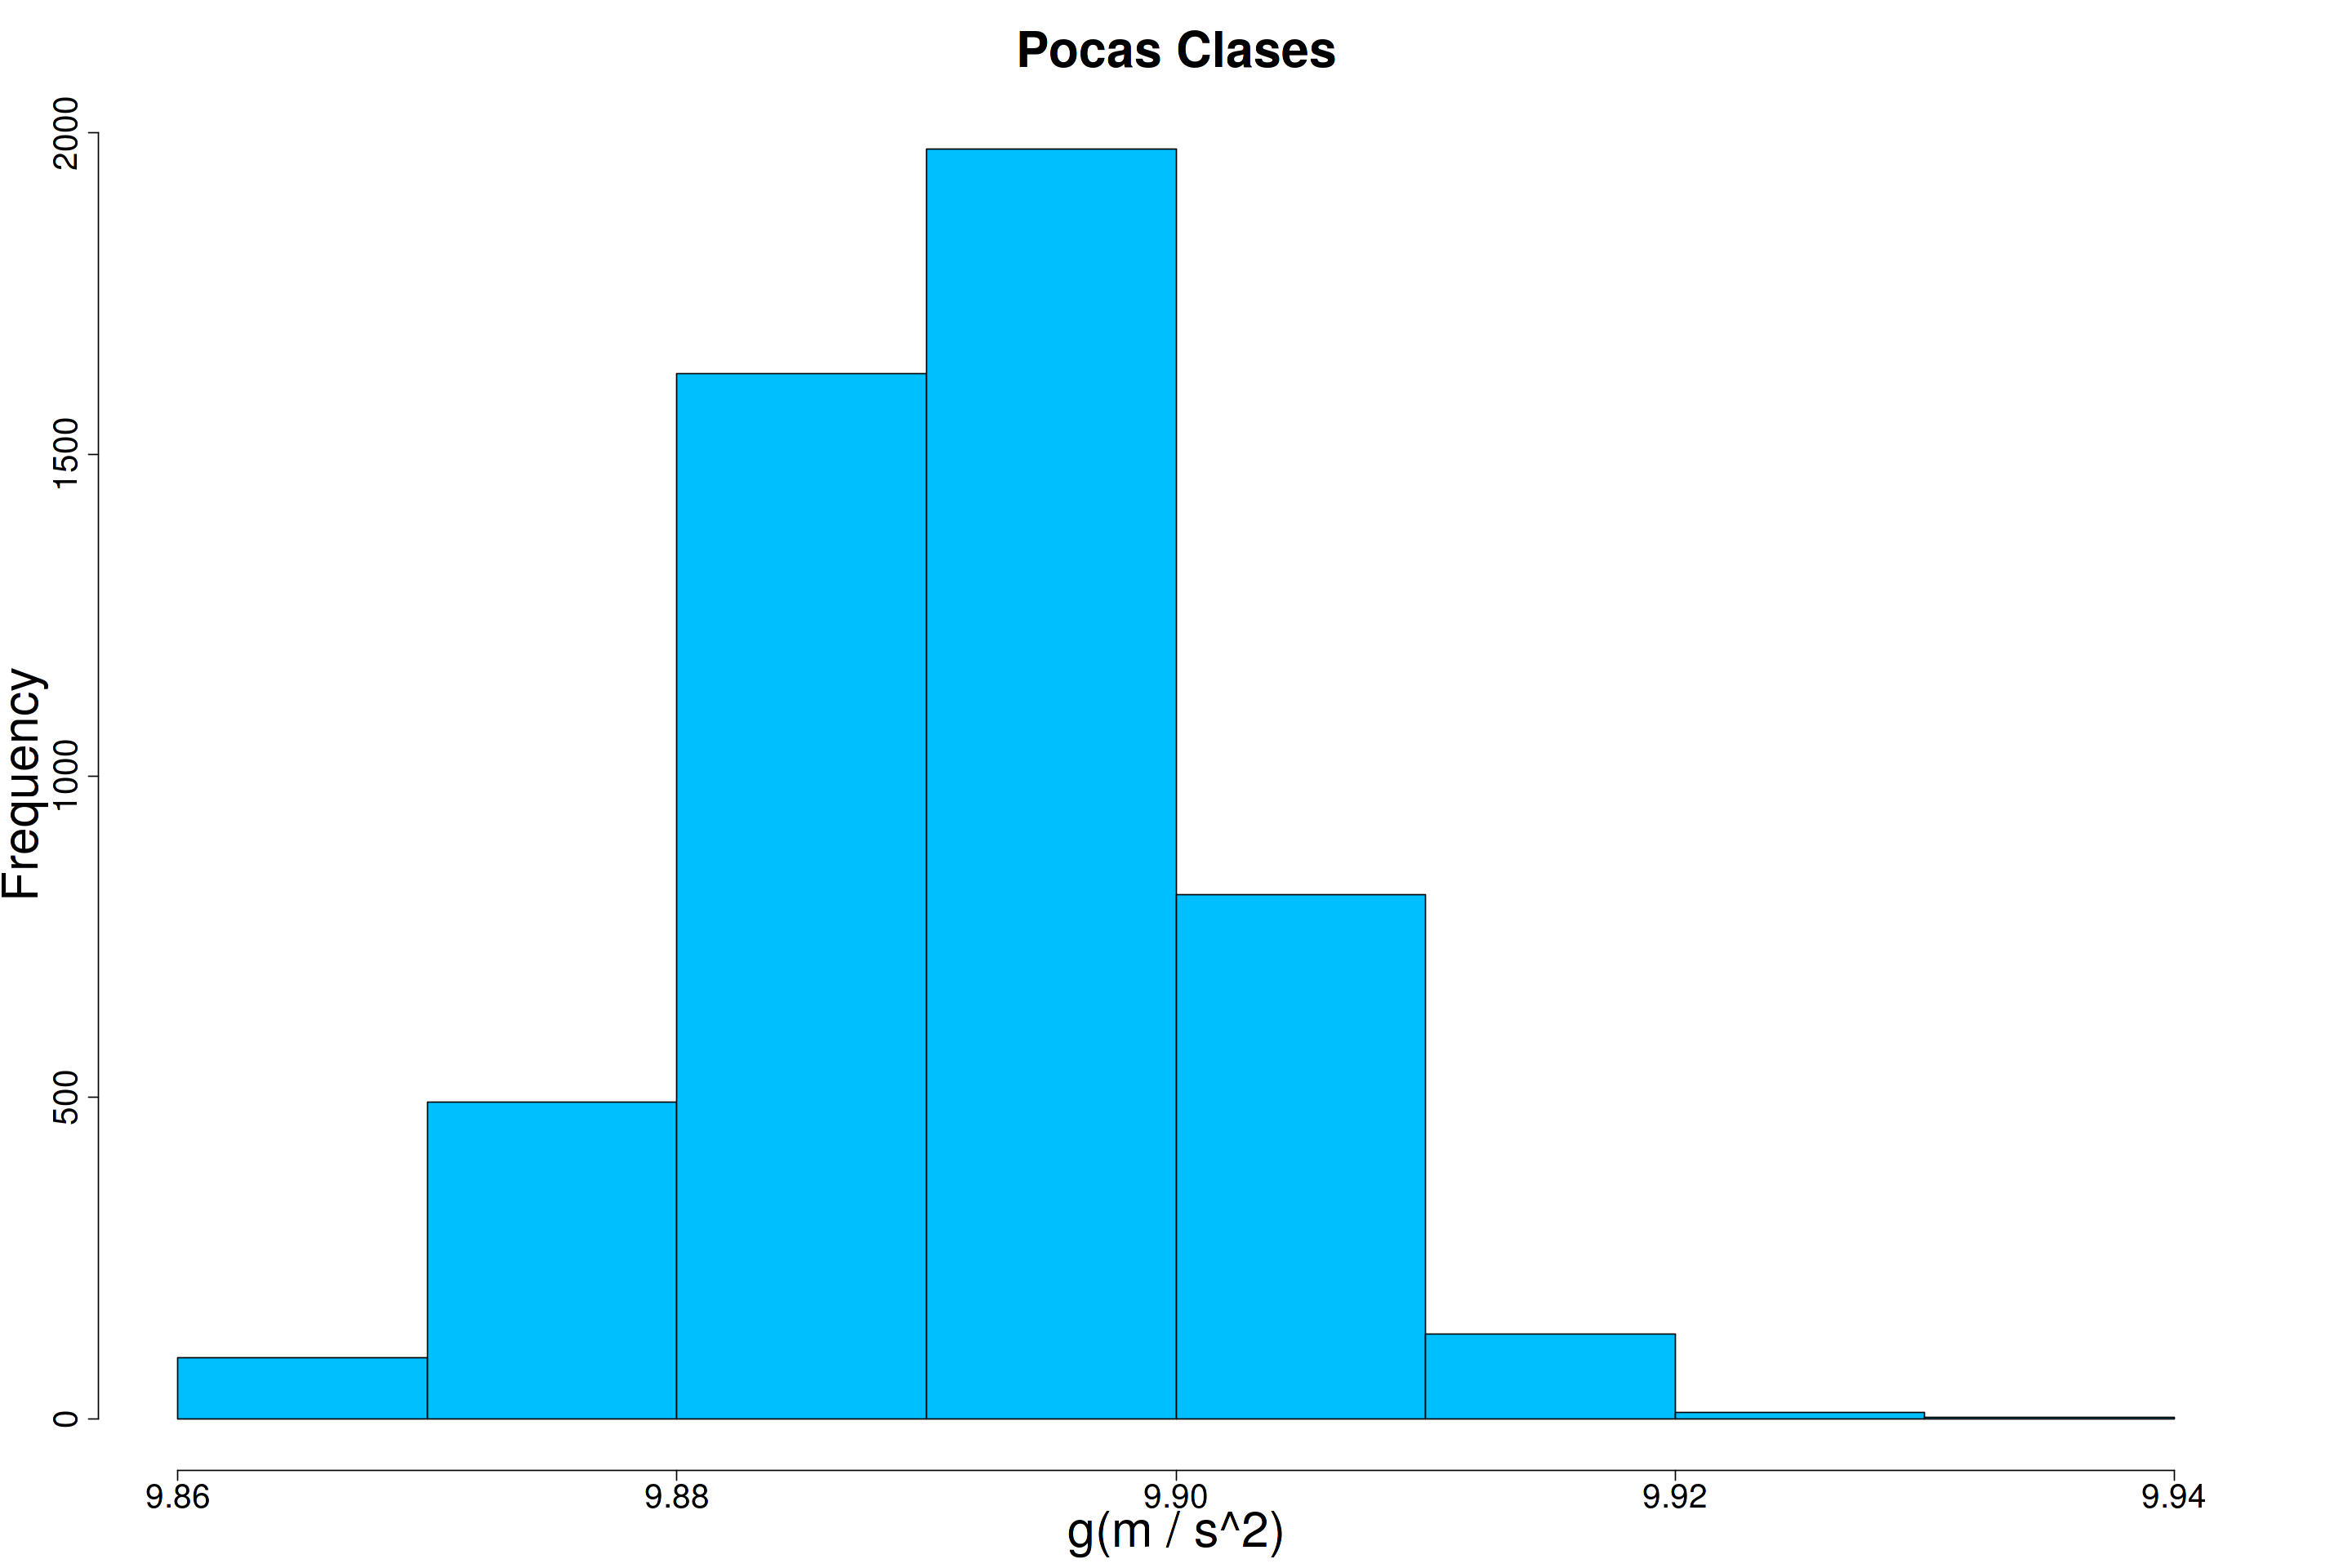

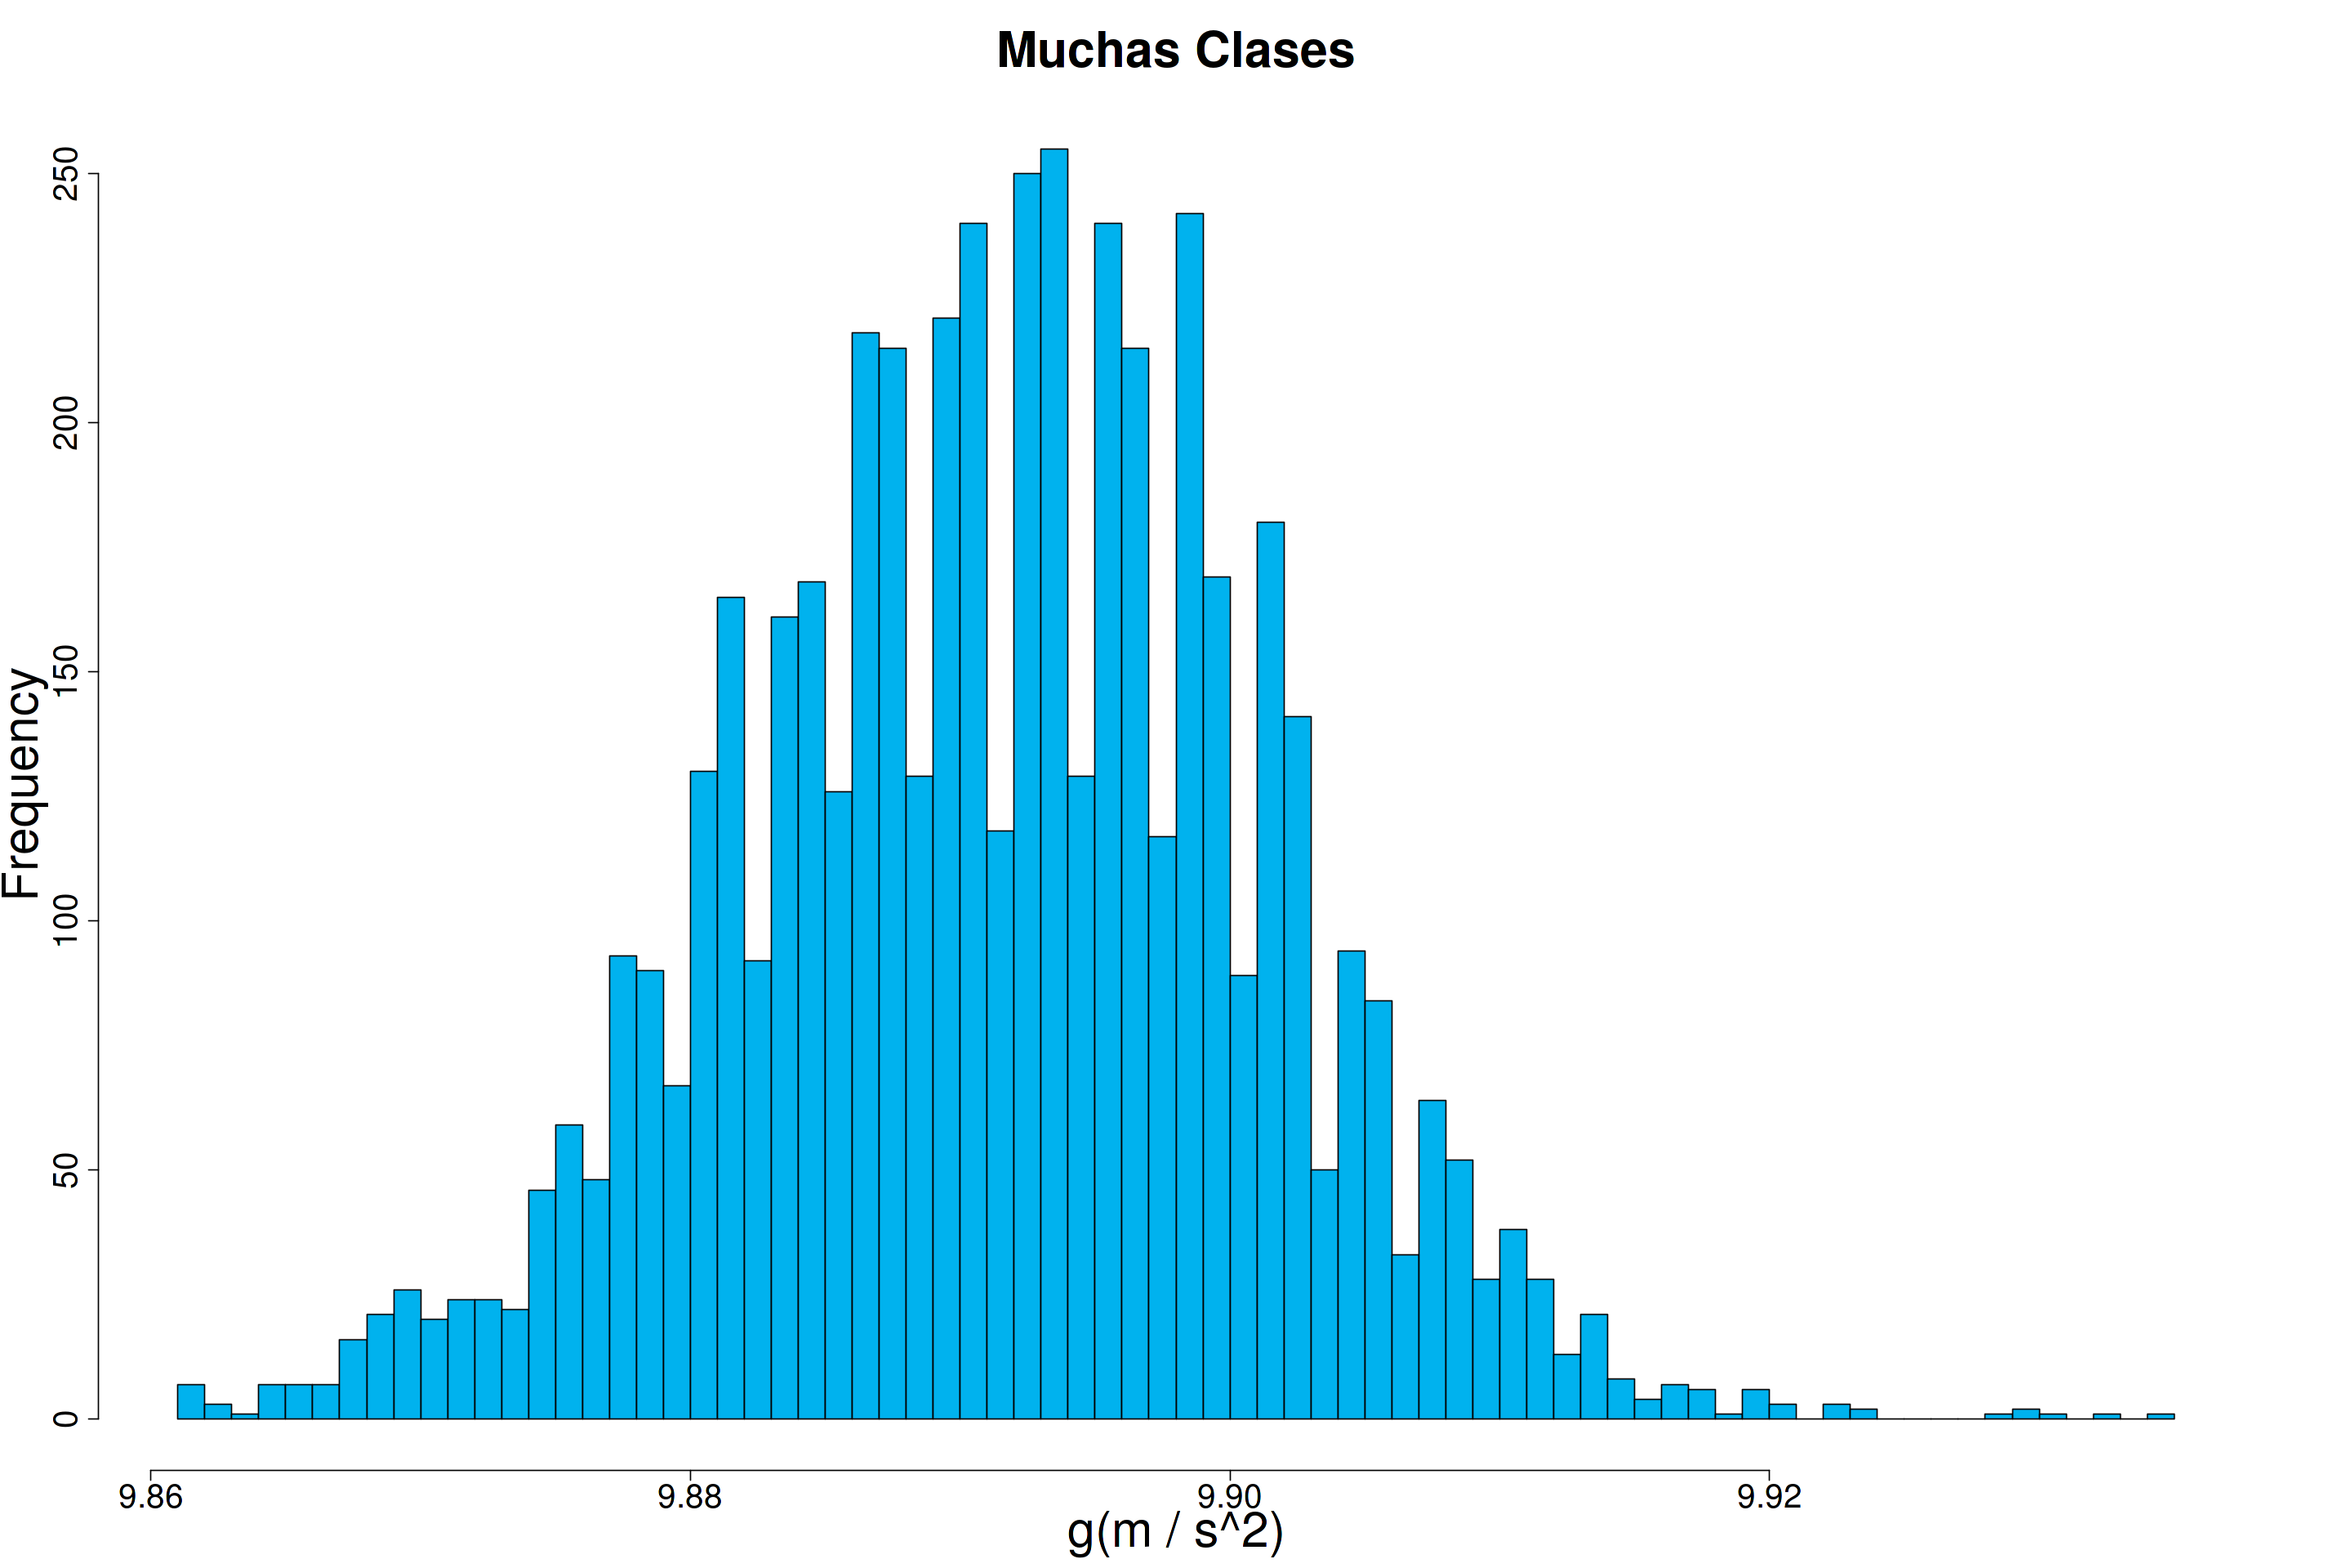

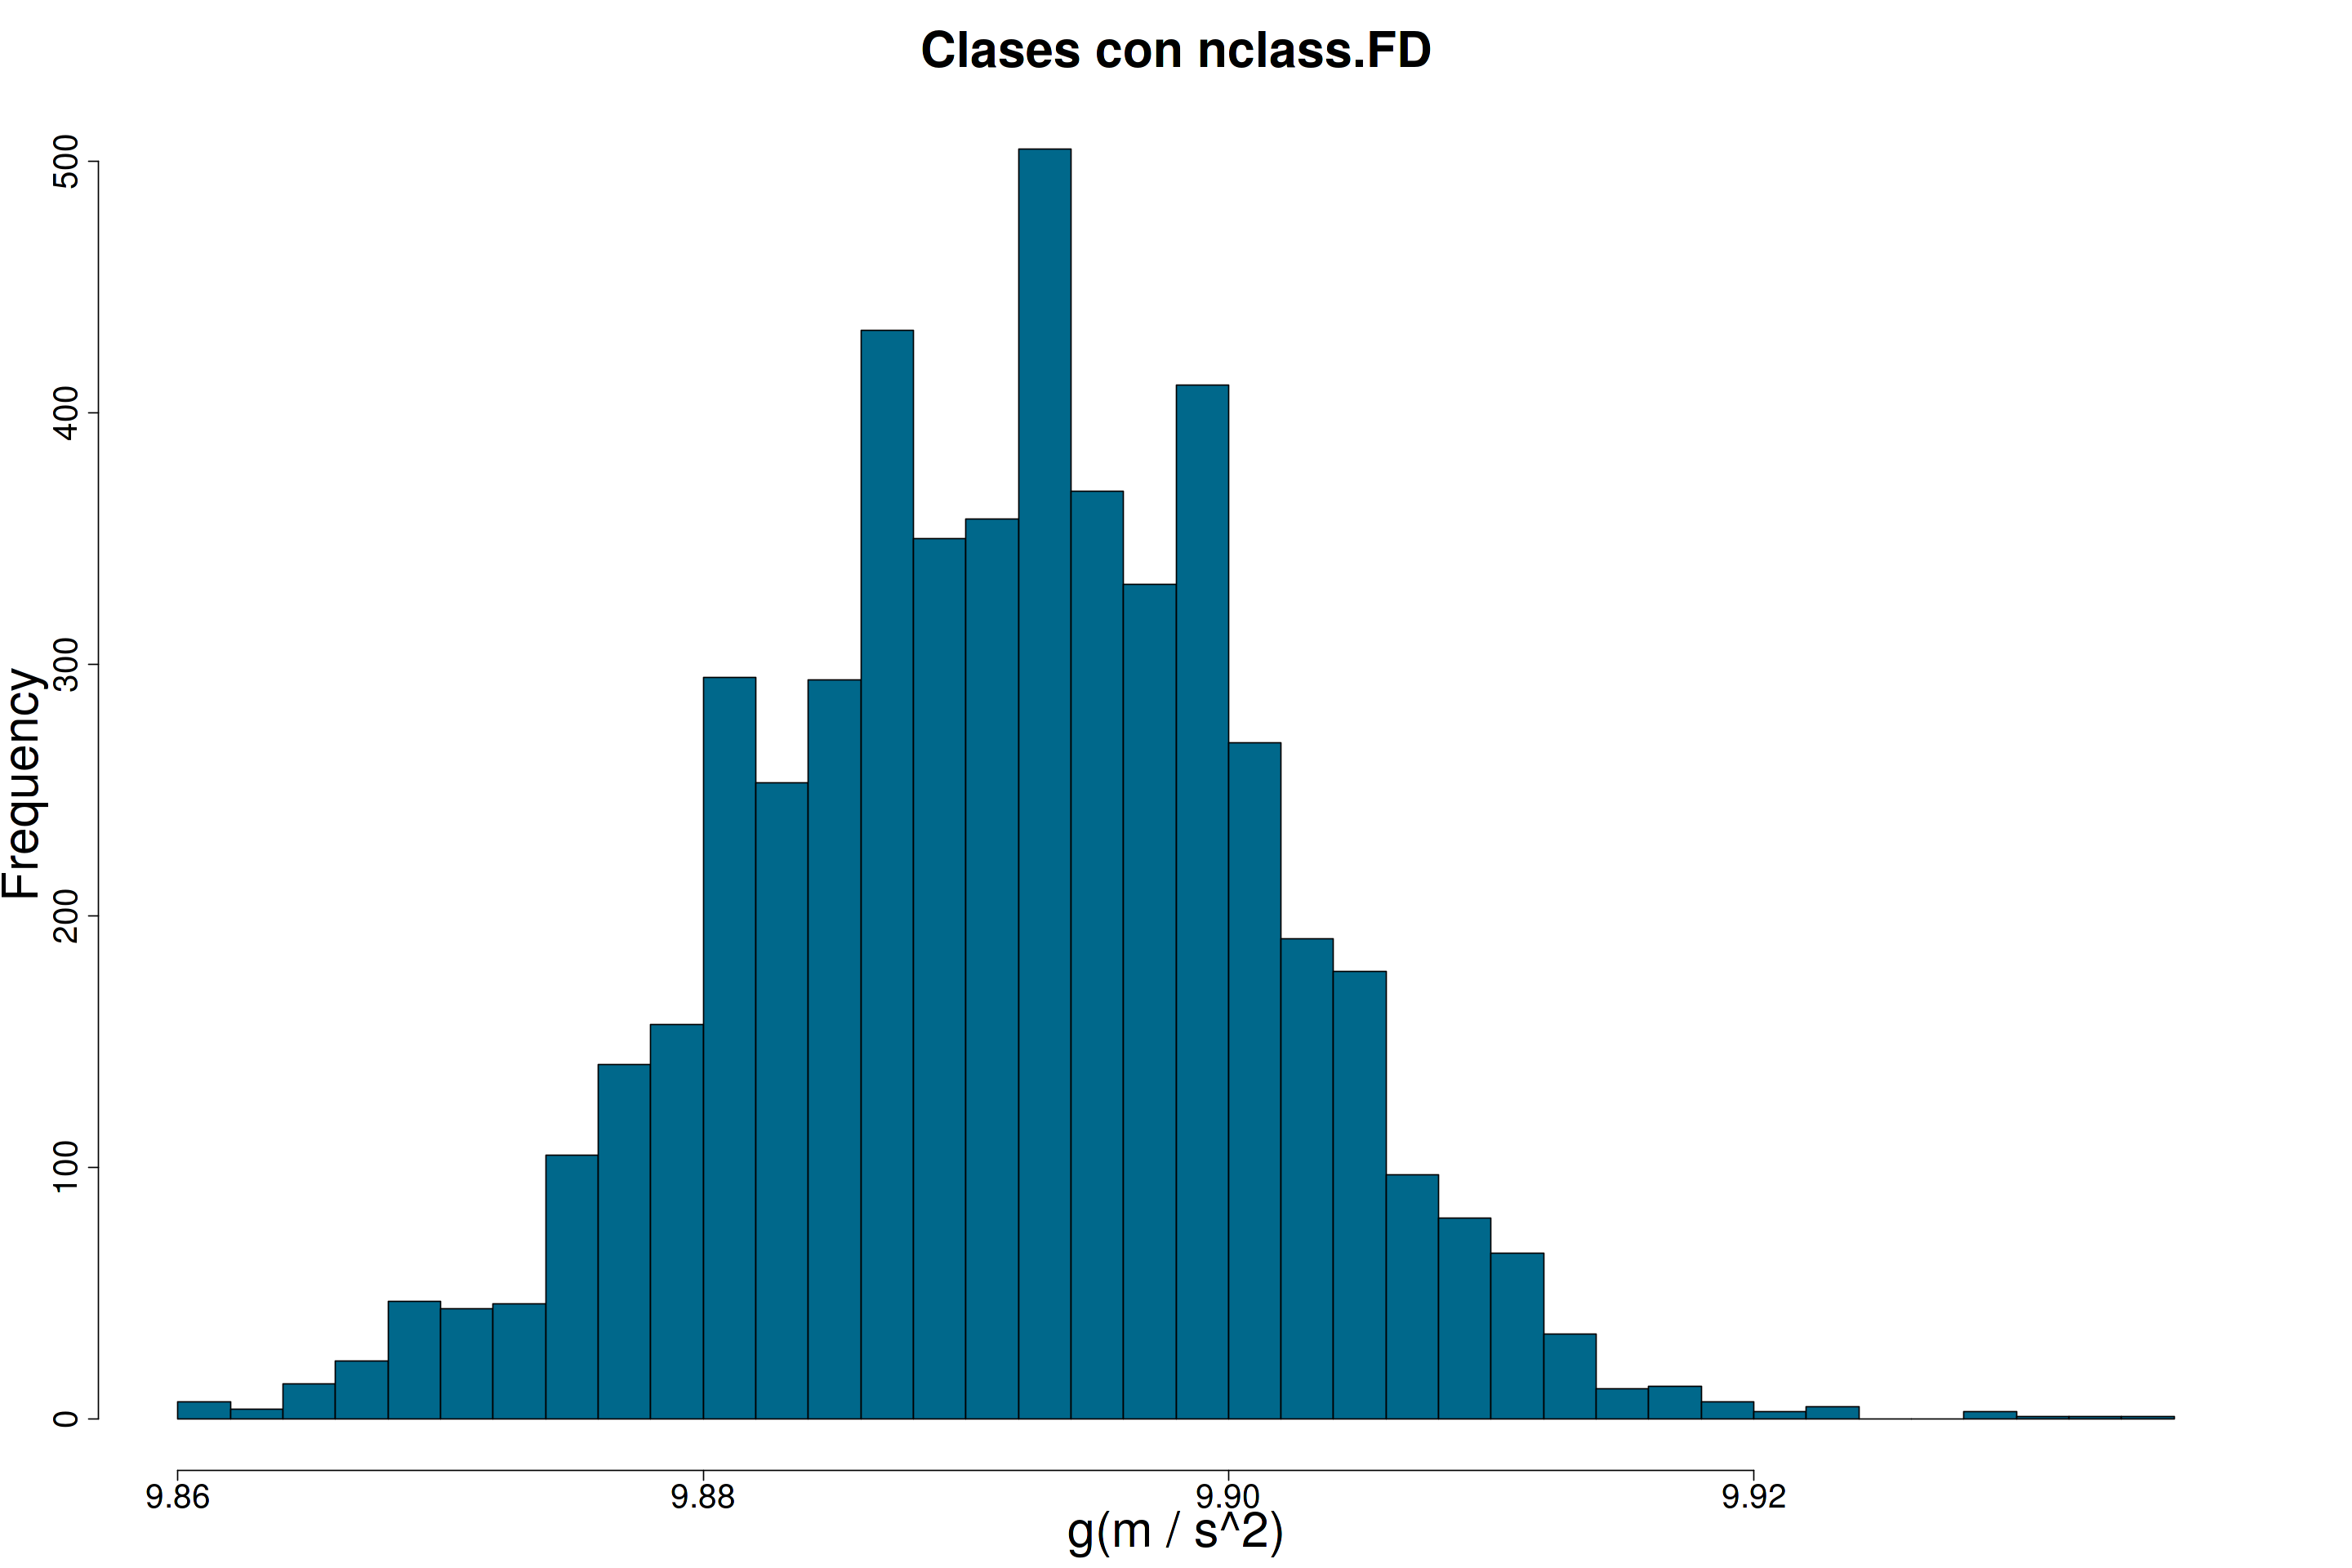

In [31]:
par(mar = c(5,5,5,5))
hist(datos$g, breaks = 6, col = "Deepskyblue1", xlab = "g(m / s^2)", main = "Pocas Clases", cex.axis = 2,cex.lab = 3, cex.main = 3 );
hist(datos$g, breaks = 60, col = "Deepskyblue2", xlab = "g(m / s^2)", main = "Muchas Clases", cex.axis = 2,cex.lab = 3, cex.main = 3 );
#la mejor cantidad de clases, con la función nclass.FD() ó nclass.Sturges() ó nclass.scott()
hist(datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4", xlab = "g(m / s^2)" ,main = "Clases con nclass.FD", cex.axis = 2,cex.lab = 3, cex.main = 3 ) 

Las funciones para calcular el número de clases están dadas por el Criterio de Sturges, el criterio de Scott y el criterio de Freedman-Diaconis:
`nclass.Stuges(datos$g)`
`nclass.scott(datos$g)`
`nclass.FD(datos$g)`


En el histograma notamos que:

* El histograma ***parece una campana***, que es justamente la característica de una distribución de probabilidades normal: el histograma nos ayuda a darnos una idea de una distribución de probabilidad, que es lo que nos permitirá cuantificar incertezas (no ahora, sino la semana que viene).


* De antemamo sabemos que el valor central de las medidas ***no es $9.8 m/s^2$, sino que parece estar mucho más cerca de $9.9 m/s^2$***. Esto no quiere decir que la gravedad cambió (que obvio, cambia y se usa para buscar petroleo, cuantificar movimientos de agua bajo tierra y muchas cosas más, pero cambia poco y cuesta mucho medirla), sino que la calibración del acelerómetro está un poco corrida (los acelerómetros son maquinitas metálicas de dimensiones de $\mu m$ ó $nm$, y generalmente las medidas cambian con la temperatura del chip).


* Las medidas ***no caen*** (nunca lo hacen) en un sólo valor, sino que tenemos, como siempre tendremos, una ***colección de valores*** de los cuales vamos a tener que extractar conclusiones por medio de probabilidades/estadística.

Ahora le vamos a agregar a nuestro histograma cosas ***imprescindibles*** (prescindibles):

* ***Título del eje x, con unidades (el eje y es la frecuencia, así es que se pone sólo. si quieren ponerlo en español, se puede).***


* Título del gráfico es prescindible, pero aquí podría ser "Medidas de g con acelerómetro".


* Indicaciones en general: se puede poner texto aclaratorio en alguna parte del gráfico.

* Fuente: de dónde salieron los datos en caso de que no los hayamos medido.

* ***Leyenda***, en caso de tener capas con diferentes significados, curvas, etc...una leyenda. Ojo: hacer redundancias está mal también, y es el primer problema en general al hacer gráficos. ¿Qué es redundancia *semiótica*? Cuando se utilizan dos signos que dicen lo mismo, por ejemplo, tengo dos modelos de datos graficados con línes, les ponemos colores distintos para distinguirlos y, ***redundantemente*** les cambiamos el tipo de línea: la semiología de gráficos tiene un principio: no expresar dos veces lo mismo.

Ahora vamos a agregarle al histograma los elementos que mencionamos, capa por capa. Los comandos los vamos a expresar mínimamente, habitualmente están llenos de parámetros. Cualquier ayuda que necesiten...www.buscadorpreferido.com

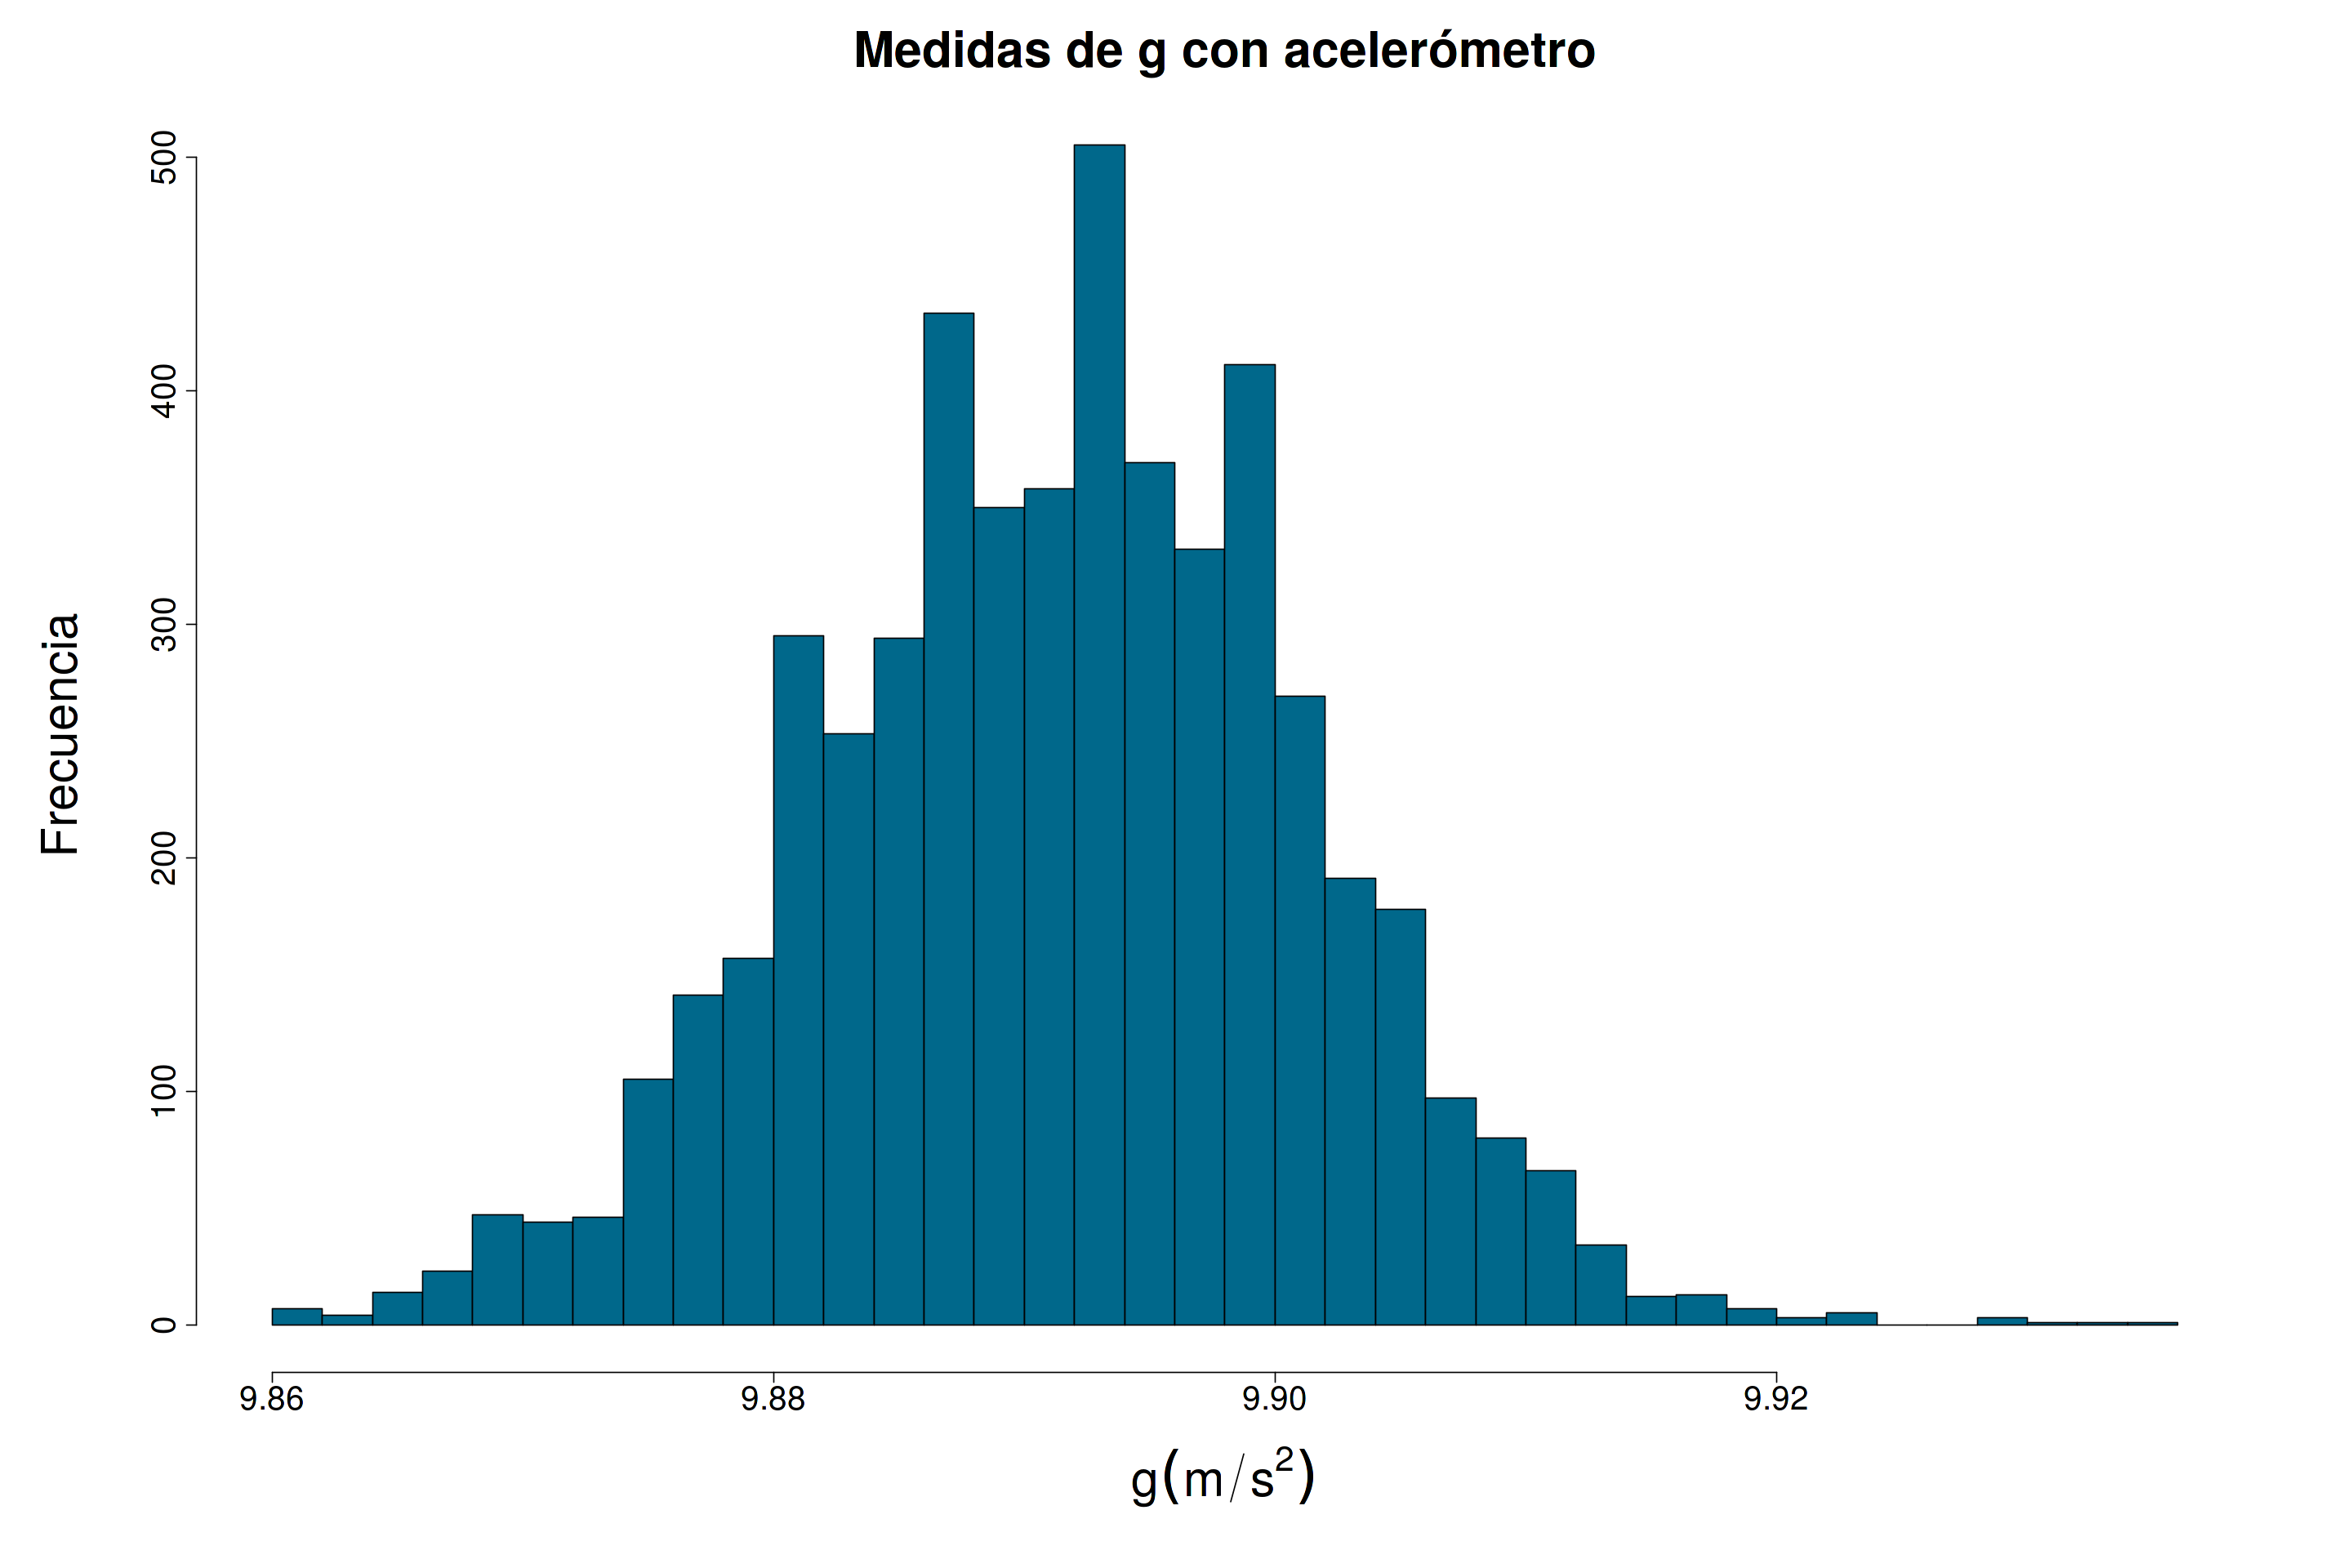

In [44]:
par(mar = c(10,10,5,5), mgp = c(6,1,0))
hist(datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), ylab = "Frecuencia", cex.main = 3,cex.lab = 3, cex.axis = 2) 

### Agregando la media muestral al histograma

Ya lo veremos, pero un ***estimador de tendencia central*** muy conocido y utilizado, es la media muestral $\overline{g}$: 

$$
\overline{g} = \sum_{i = 1}^{N} \frac{g_i}{N}
$$

Esta cuenta, en R se hace como:


In [46]:
mm.g <- mean(datos$g); mm.g

[1] 9.891475

y esta media muestral la podemos colocar en nuestro histograma:

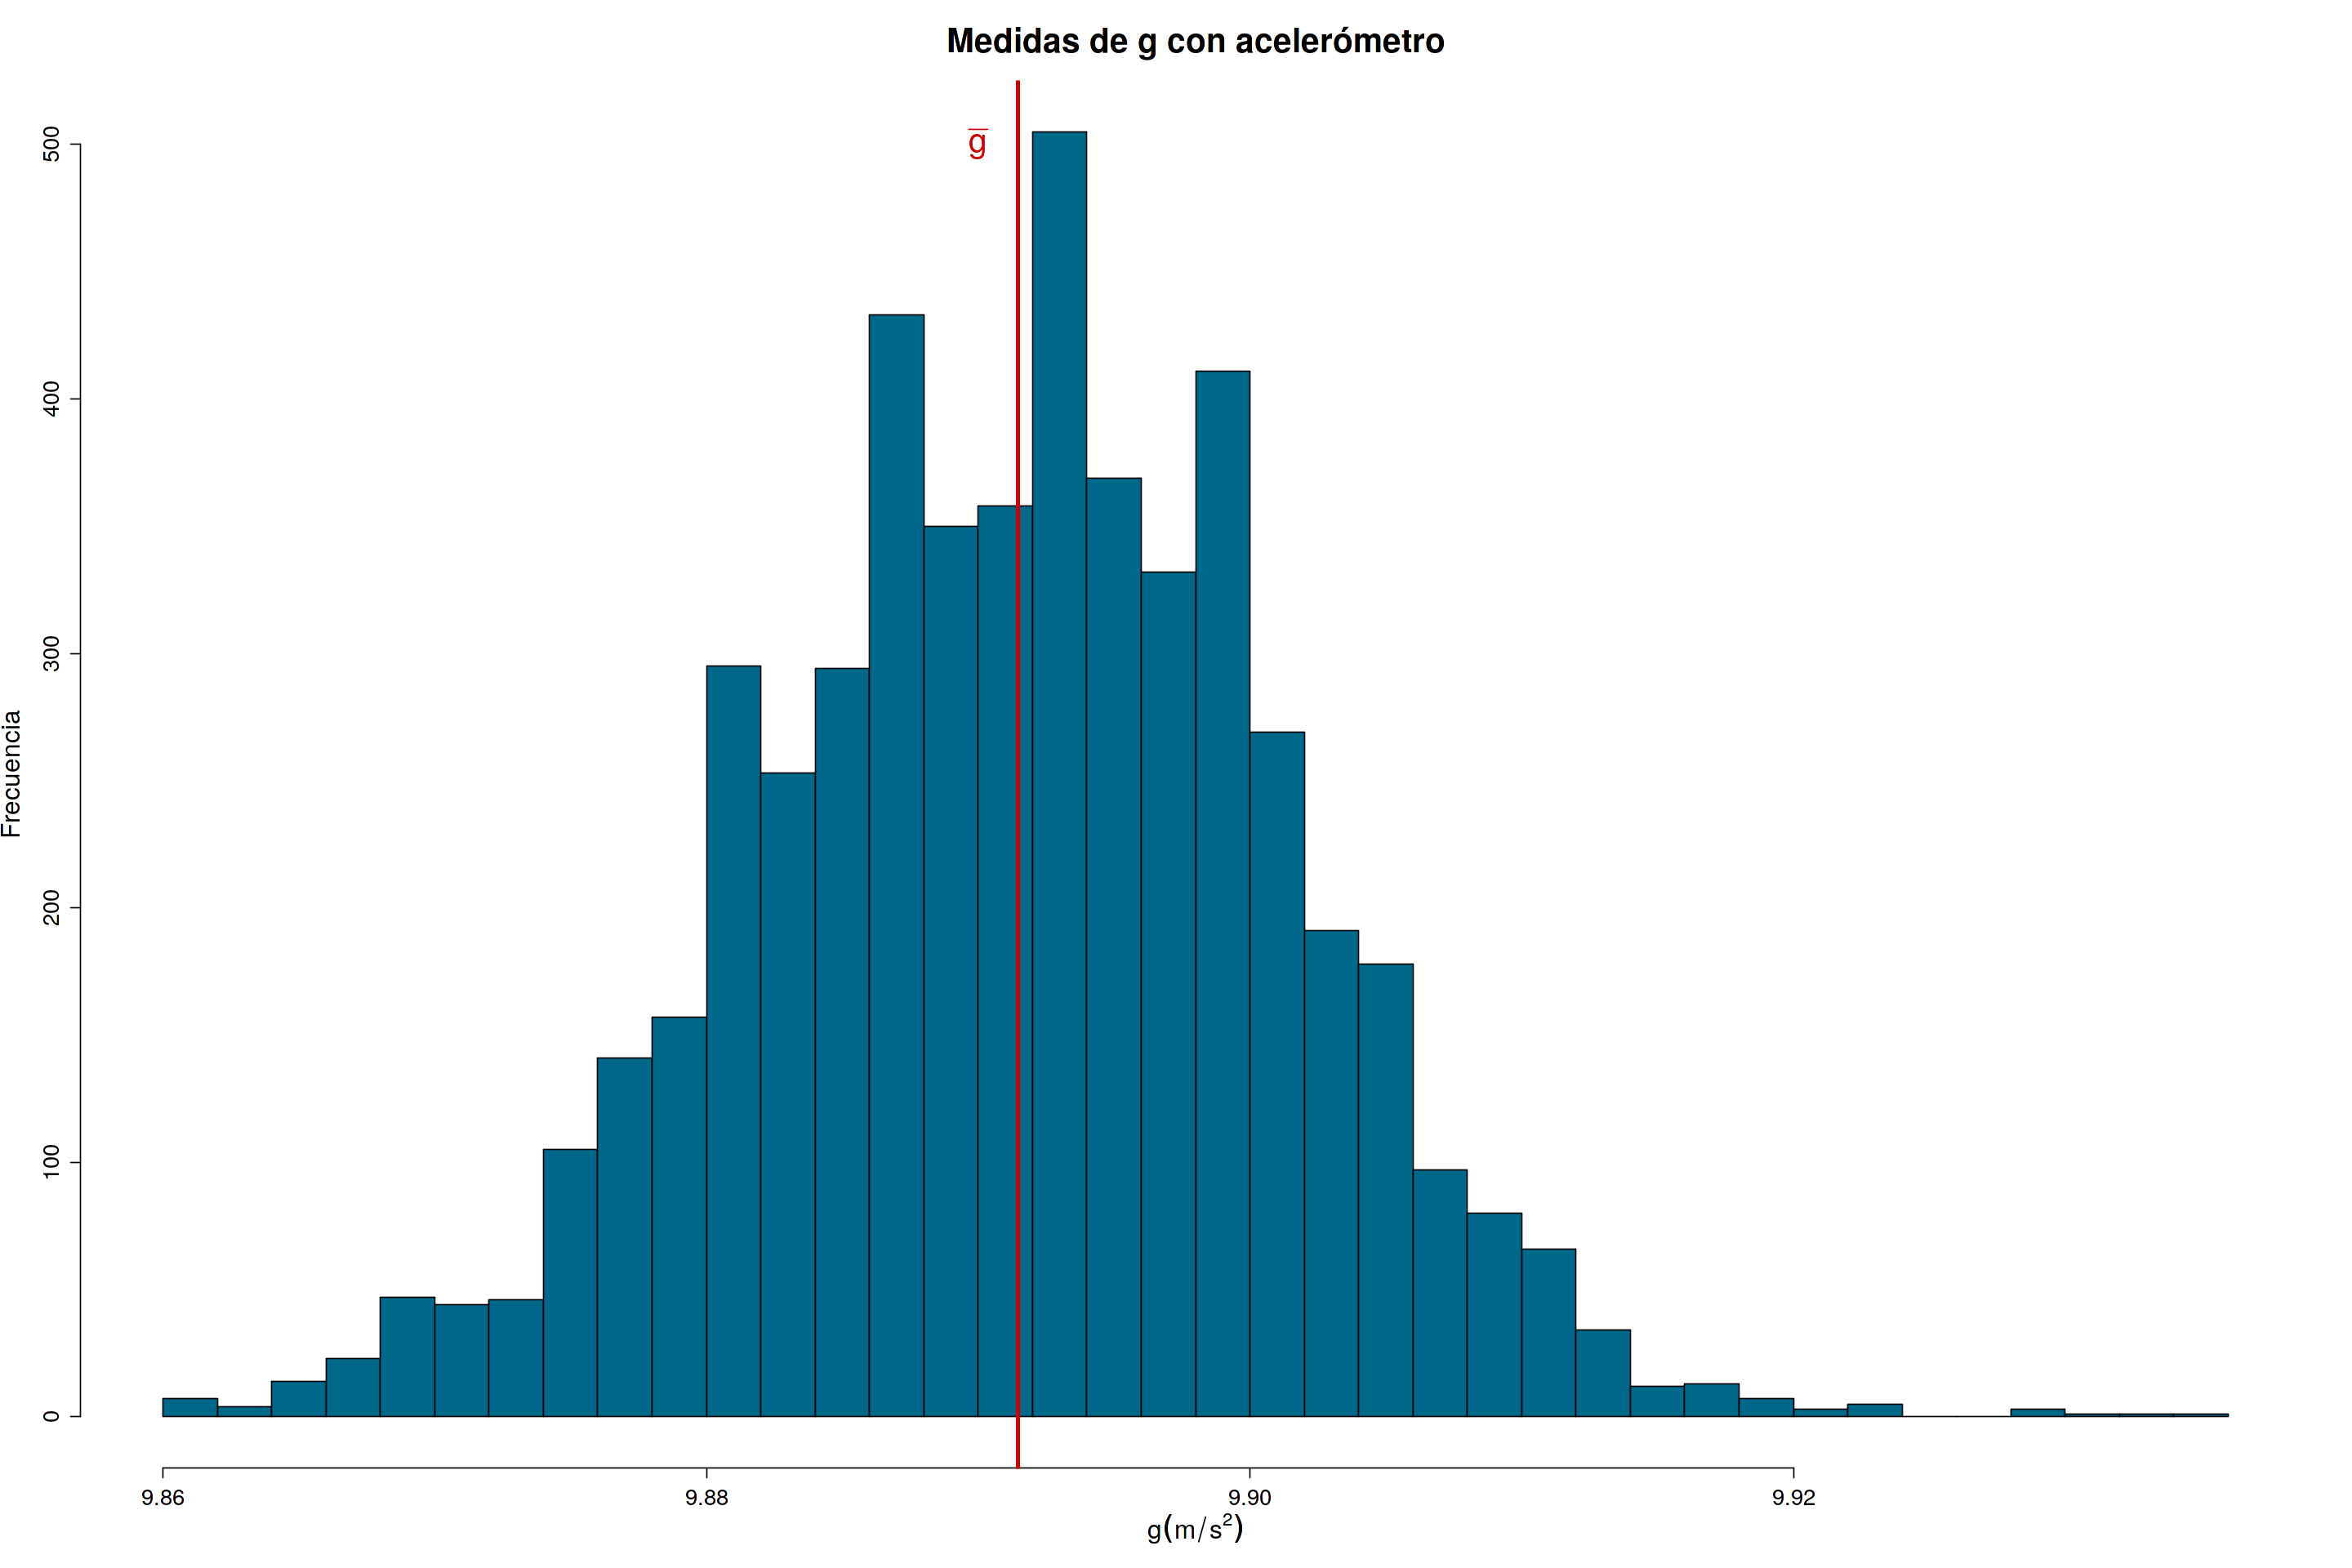

In [47]:
hist(datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), ylab = "Frecuencia",
    cex.axis = 1.35, cex.lab = 1.55, cex.main = 2)
#abline hace líneas rectas (buscar en la ayuda si es necesario)
abline(v = mm.g, col = "Red3", lwd = 3)  #lwd = grosor de la línea

#texto
text(x = 9.89, y = 500, labels = TeX("$\\bar{g}$"), col = "Red3", cex = 2)

Por otra parte, un estimador de la ***dispersión de valores*** puede ser la archiconocida y poco entendida ***desviación estándar de la muestra***, $\mathbf{s}$:

$$s = \sqrt{\sum_{i = 1}^N \frac{(g_i - \overline{g})^2}{N-1}}$$


Si se trata de una ***distribución normal***, $\mathbf{s}$ estima cuántas medidas caen entre $\overline{g} \pm s$. Si se utilizan enteros de s, tenemos que:

+ ~68.3% de las medidas están en el intervalo $\overline{g} \pm s$

+ ~95.4% de las medidas están en el intervalo $\overline{g} \pm 2s$

+ ~99.7% de las medidas están en el intervalo $\overline{g} \pm 3s$

En nuestros datos, podemos calcular la desviación estándar de la muestra como:

In [49]:
s.g <- sd(datos$g); s.g

[1] 0.009786879

Y luego la graficamos en el histograma, como intervalos en la variable que ***pivotan*** la media muestral $\overline{g}$:

In [57]:
par(mar = c(10,10,5,0), mgp = c(6,2,0))
hist(datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), ylab = "Frecuencia",
    cex.axis = 2, cex.lab = 3, cex.main = 3)
#abline hace líneas rectas (buscar en la ayuda si es necesario)
abline(v = mm.g, col = "Red3", lwd = 3)  #lwd = grosor de la línea

#arrows para la sd
arrows(x0 = (mm.g-seq(1,3,1)*s.g), x1 = (mm.g+seq(1,3,1)*s.g),
       y0 = c(250,70,20), y1 = c(250,70,20),
       lwd = 3, col = "yellow3",
       angle = 90,length = 0.1,code = 3,
        )

#texto
text(x = 9.89, y = 500, labels = TeX("$\\bar{g}$"), col = "Red3", cex = 2)
text(x = (mm.g+0.005), y = c(260,80,20) + 20, 
    labels = c(TeX("$\\bar{g} \\pm  s$"), TeX("$\\bar{g} \\pm  2s$"), TeX("$\\bar{g} \\pm 3s$")),
    cex = 2.5, col = "yellow3"            
    )

### Histograma con PDF

PDF no es el tipo de archivo, sino la Función Densidad de Probabilidad (*Probability Density Function*). Es un modelo de probabilidades.

Para agregarle el modelo continuo a nuestros datos, tenemos que dividir la Frecuencia de observación de cada clase por el número total de observaciones. Esto, básicamente, cambia los valores de observación de cada clase a una ***aproximación de la PDF***:

In [58]:
hist(probability =  T,datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), 
    cex.axis = 1.35, cex.lab = 1.55, cex.main = 2)
#abline hace líneas rectas (buscar en la ayuda si es necesario)
abline(v = mm.g, col = "Red3", lwd = 3)  #lwd = grosor de la línea

#arrows para la sd
arrows(x0 = (mm.g-seq(1,3,1)*s.g), x1 = (mm.g+seq(1,3,1)*s.g),
       y0 = c(25,8,2), y1 = c(25,8,2),
       lwd = 3, col = "yellow3",
       angle = 90,length = 0.1,code = 3,
        )

#texto
text(x = 9.89, y = 500, labels = TeX("$\\bar{g}$"), col = "Red3", cex = 2)
text(x = (mm.g+0.005), y = c(25,8,2) + 2, 
    labels = c(TeX("$\\bar{g} \\pm  s$"), TeX("$\\bar{g} \\pm  2s$"), TeX("$\\bar{g} \\pm 3s$")),
    cex = 2.5, col = "yellow3"            
    )

Para terminar, le agregamos tres líneas y una leyenda:


+ Una línea es un Kernel Density Estimate, un algoritmo muy complicado que estima una PDF a partir de los datos.

+ La otra línea es un ajuste de máxima verosimilitud de la Probability Density Function de a __[distribución normal](https://en.wikipedia.org/wiki/Normal_distribution)__, similar a los ajustes lineales en dos dimensiones (que después veremos).

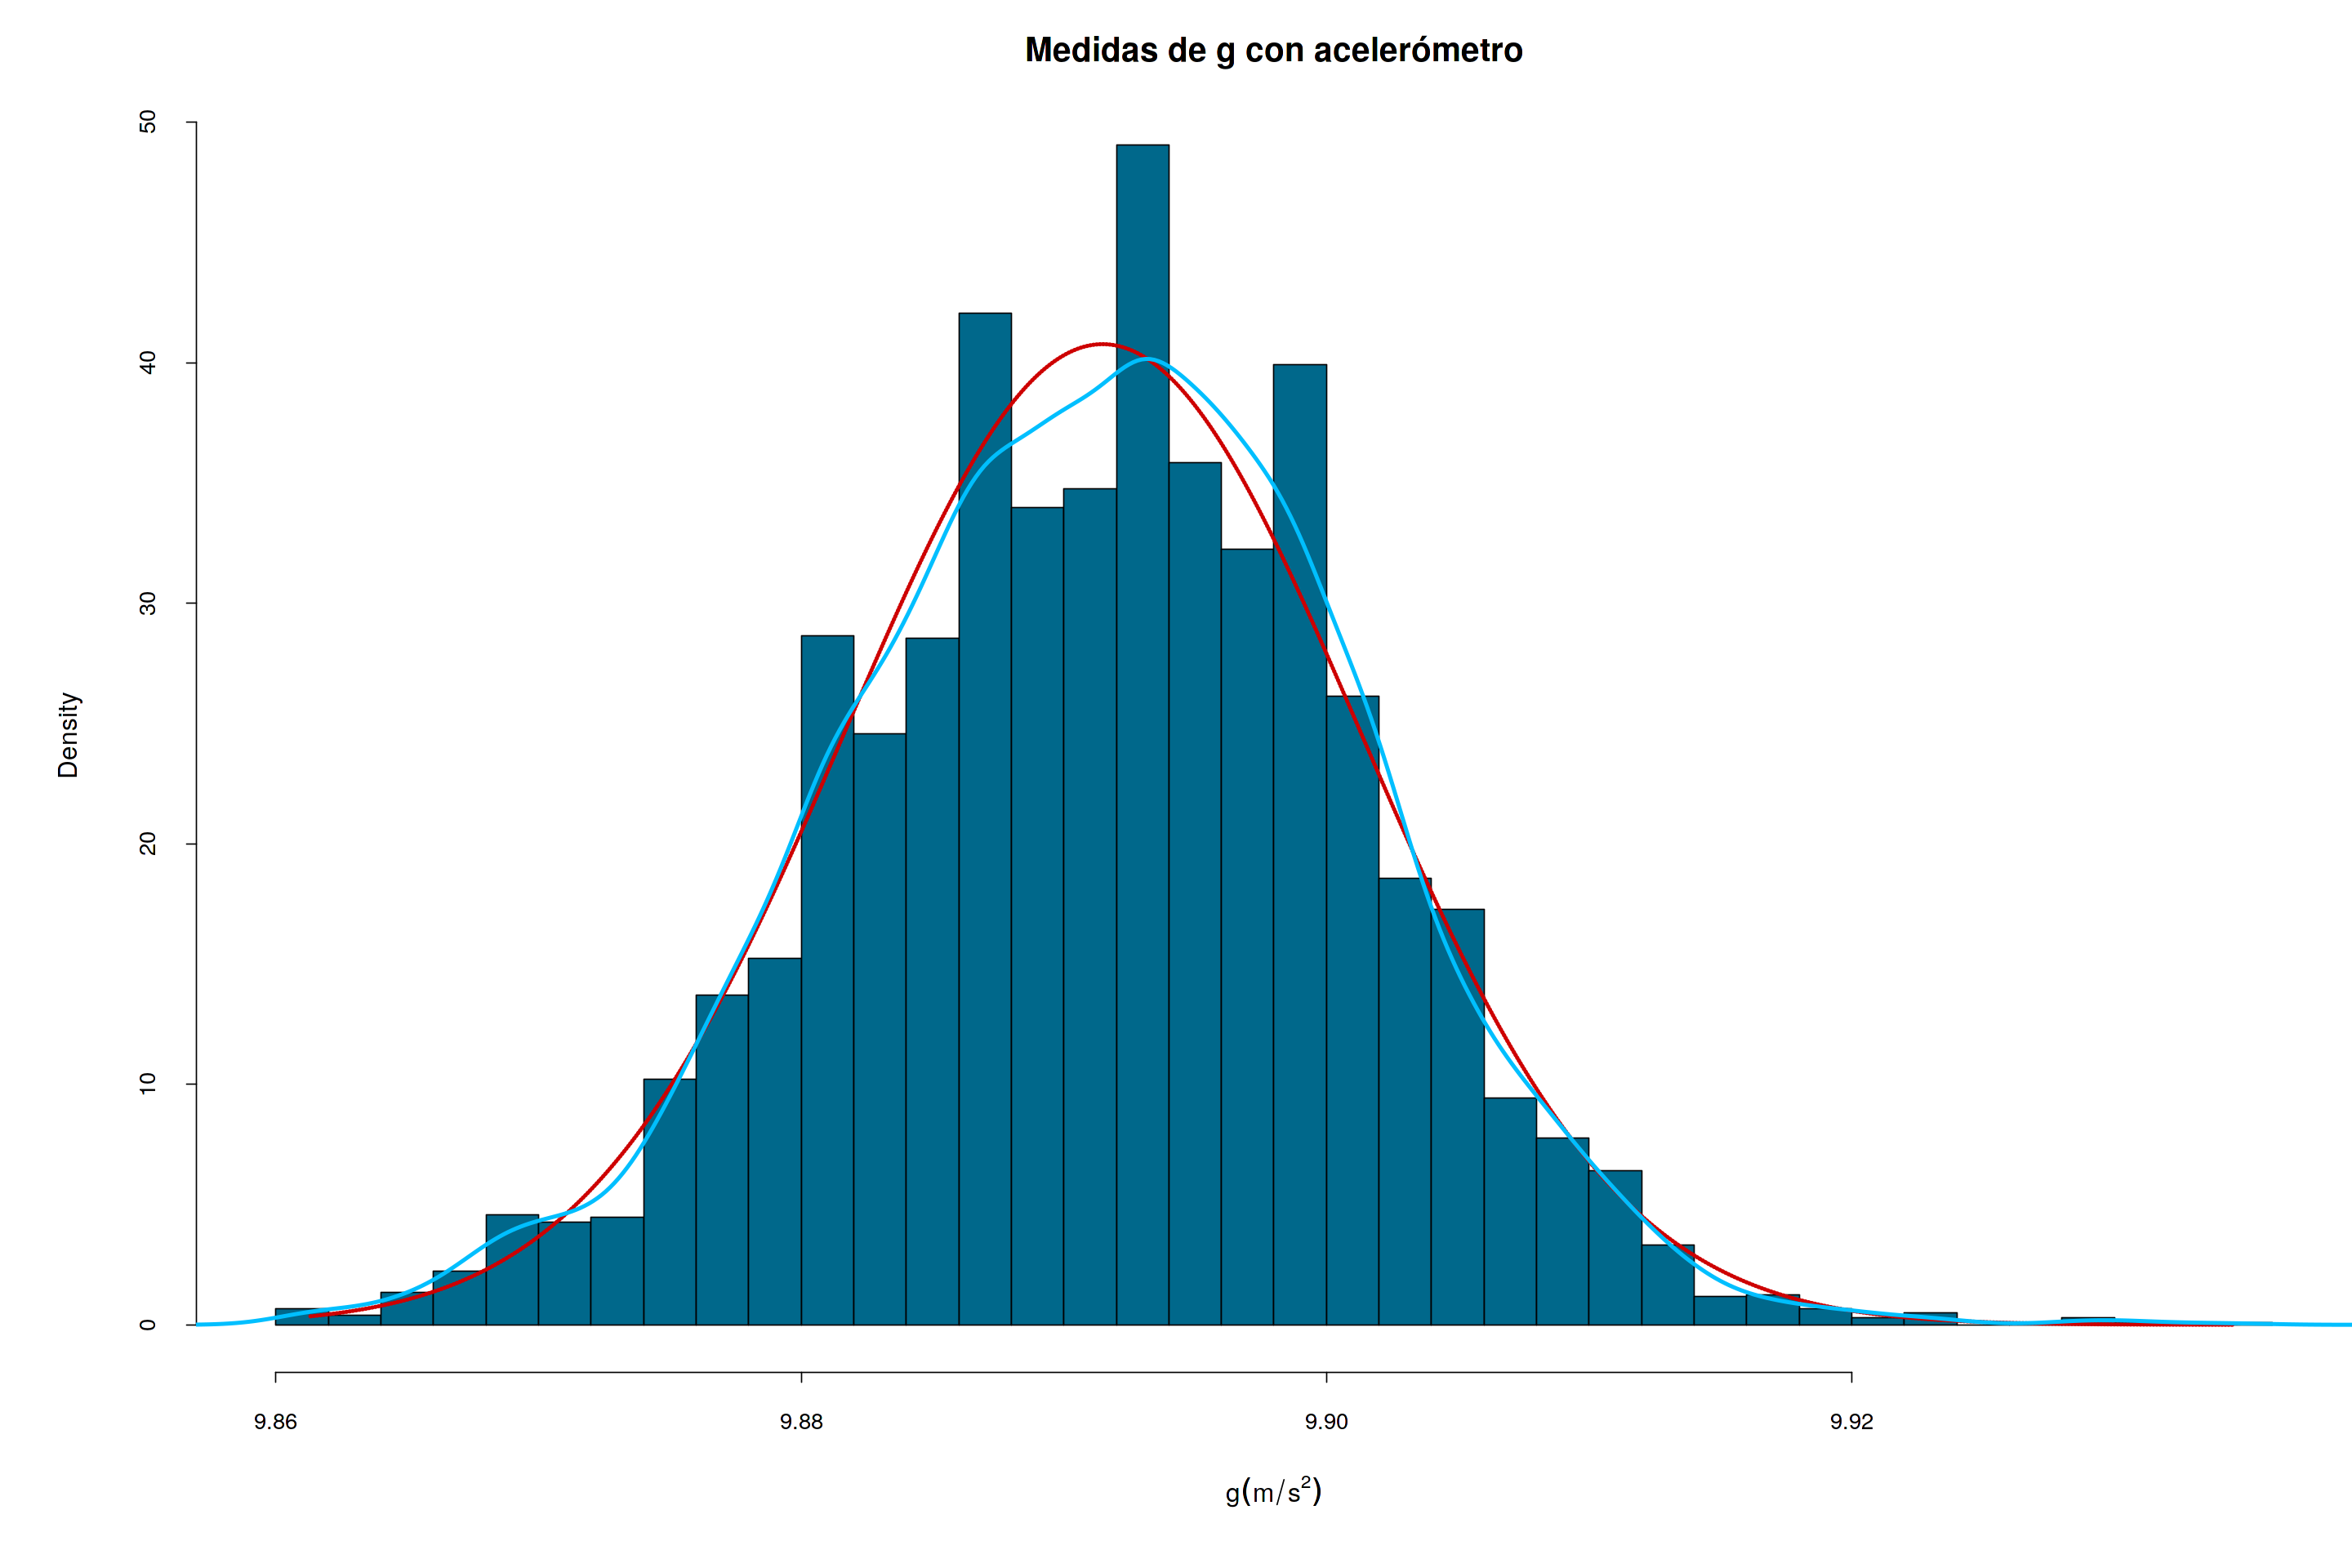

In [64]:
par(mar = c(10,10,5,0), mgp = c(6,2,0))

hist(probability =  T,datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), 
    cex.axis = 1.35, cex.lab = 1.55, cex.main = 2)

#ajuste
library("fitdistrplus")
aju <- fitdistrplus::fitdist(data = datos$g, distr = "norm")

#gráficos de líneas
x <- seq(min(datos$g), max(datos$g),length.out = 1000) #distribución normal
lines( x = x, y = dnorm(x = x, mean = aju$estimate[1], sd = aju$estimate[2]), col = "red3", lwd = 3, type = "l", lty = 3)

lines(density(datos$g), col = "Deepskyblue1", lwd = 3) #gráfica del KDE



#### Una *leyenda* para nuestro gráfico

En este caso la leyenda debería contener las líneas que trazamos, tanto con el ajuste de máxima verosimilitud (Max. Likelihood) de la distribución normal como el KDE...los comandos de leyenda son un poco engorrosos, pero la idea de todo esto es copipastear y toquetear, no una vista exhaustiva de todo, porque es demasiado tedioso y largo.

Vamos entonces:

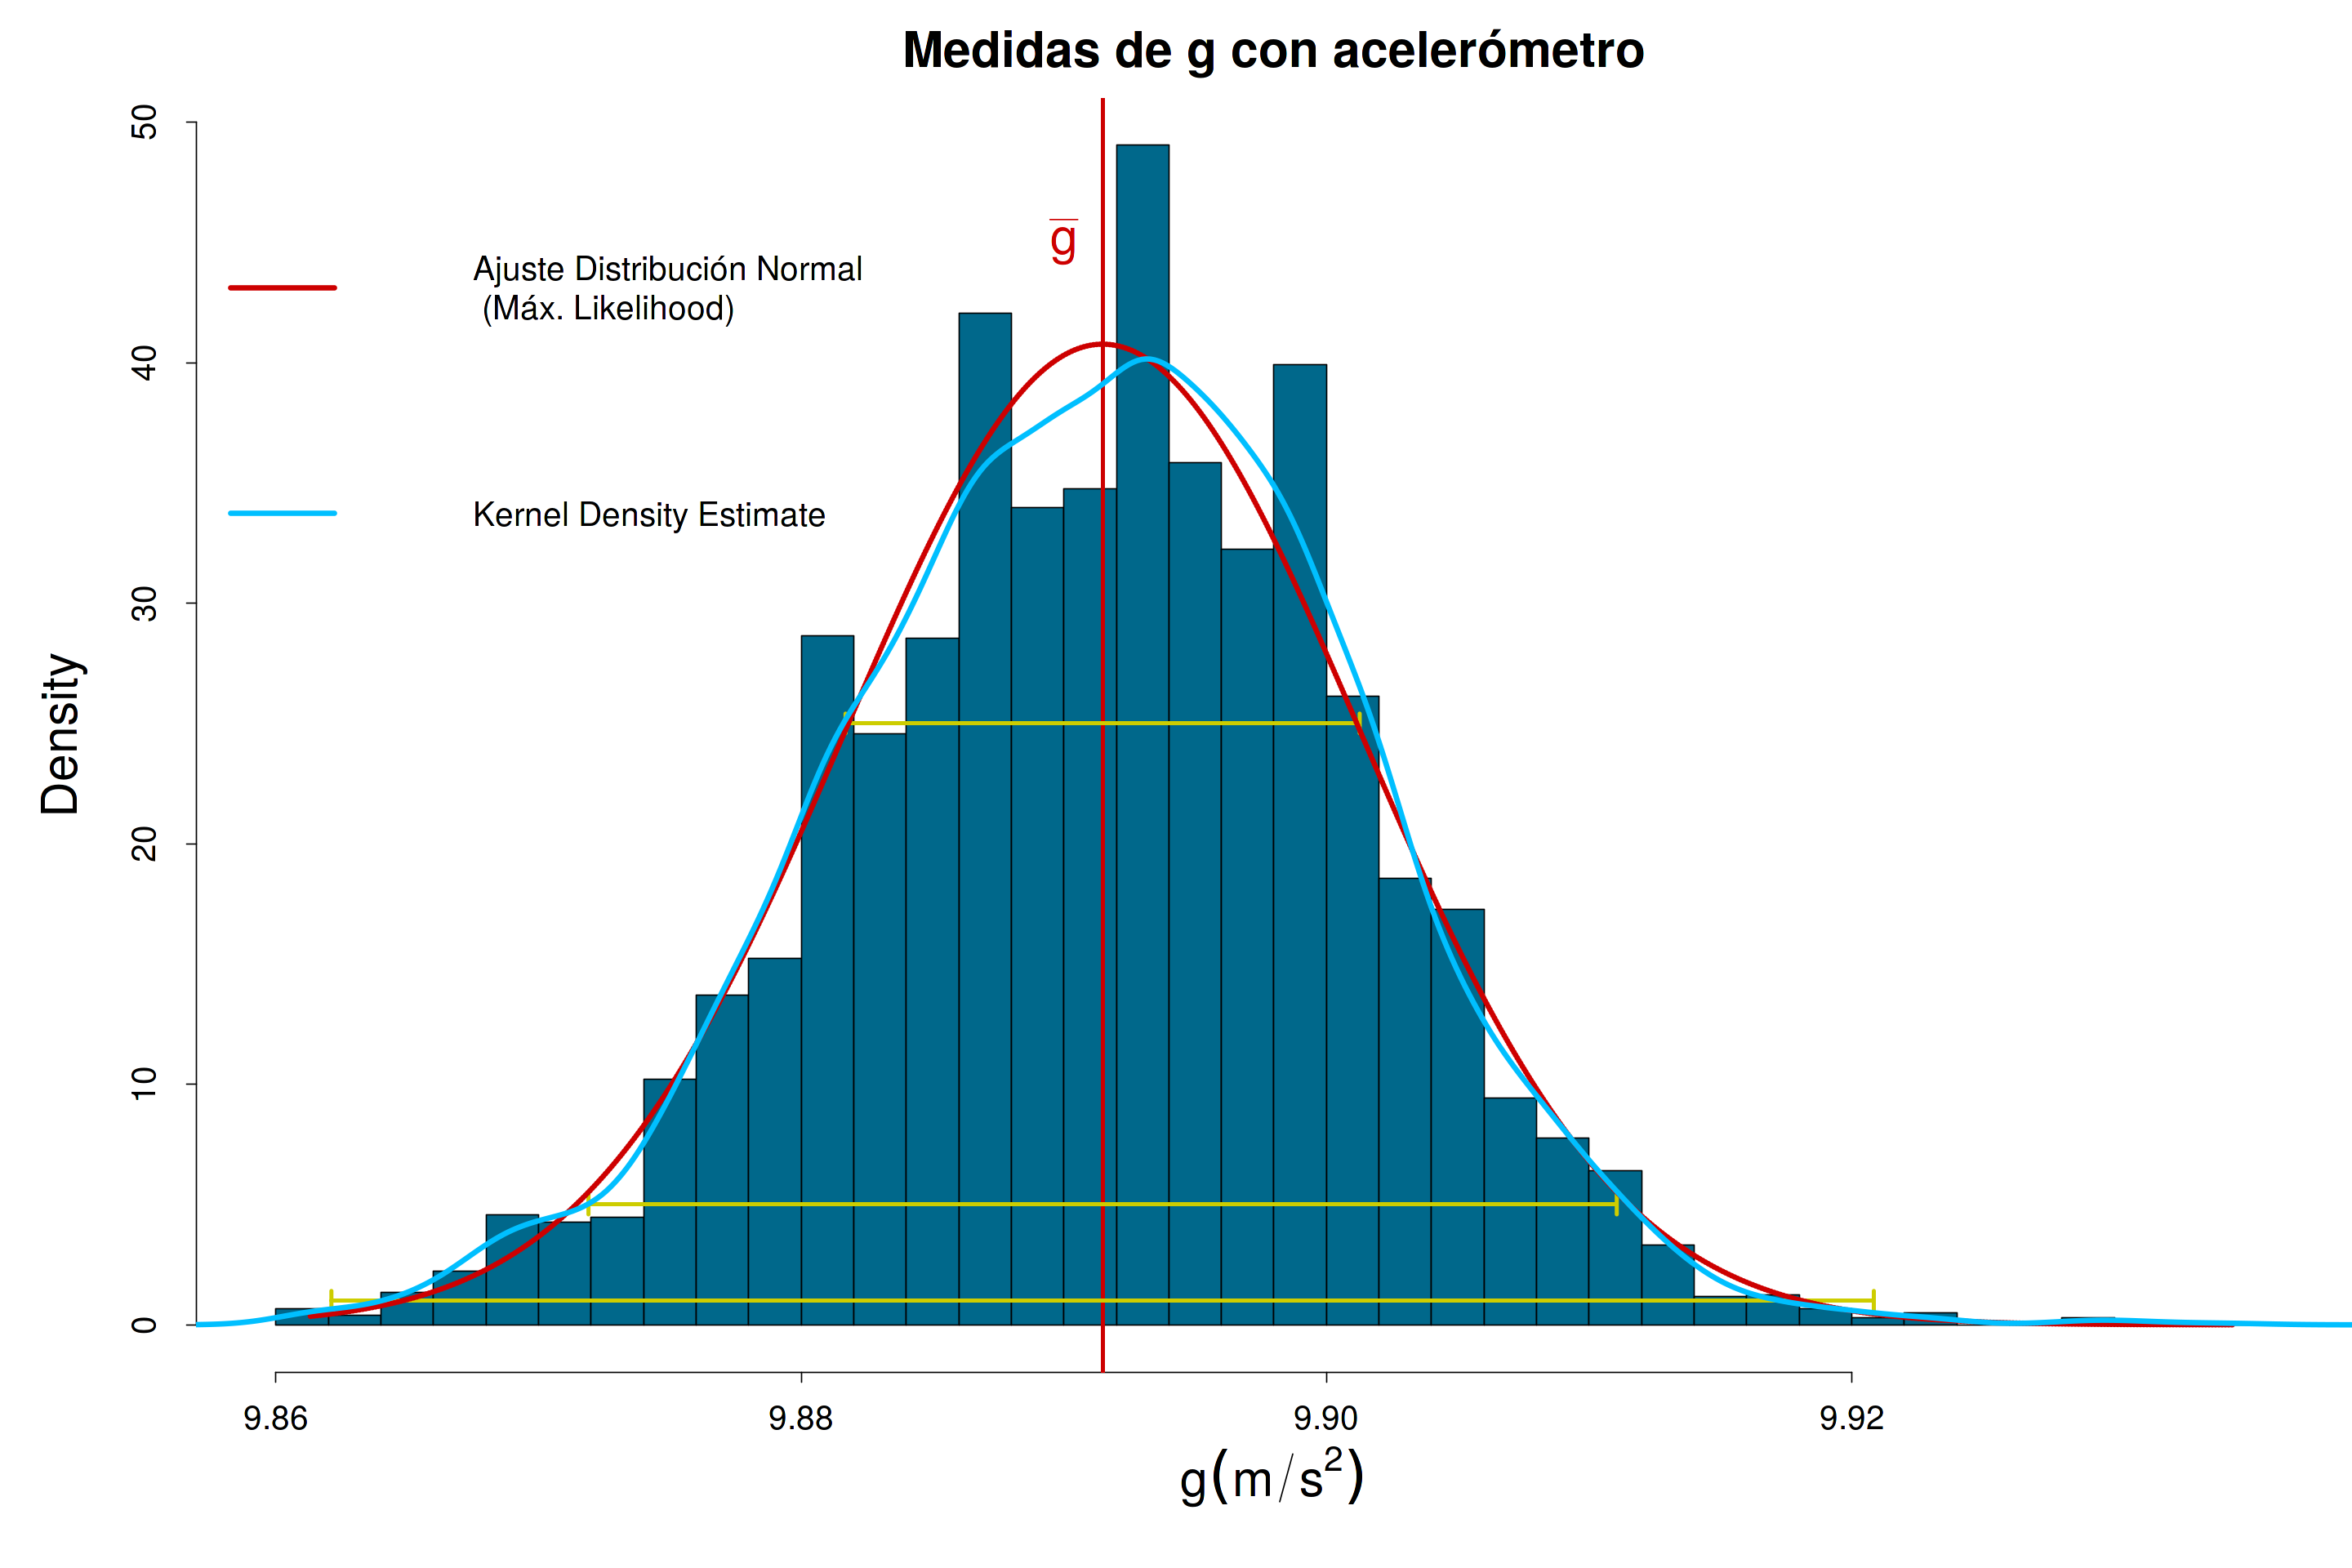

In [88]:
par(mar = c(10,10,5,0), mgp = c(6,2,0))
hist(probability =  T,datos$g, breaks = nclass.FD(datos$g), col = "Deepskyblue4",
     main = "Medidas de g con acelerómetro",
    xlab = expression(g(m/s^2)), 
    cex.axis = 2, cex.lab = 3, cex.main = 3)
#abline hace líneas rectas (buscar en la ayuda si es necesario)
abline(v = mm.g, col = "Red3", lwd = 3)  #lwd = grosor de la línea

#arrows para la sd
arrows(x0 = (mm.g-seq(1,3,1)*s.g), x1 = (mm.g+seq(1,3,1)*s.g),
       y0 = c(25,5,1), y1 = c(25,5,1),
       lwd = 3, col = "yellow3",
       angle = 90,length = 0.1,code = 3,
        )

#texto media muestral
text(x = 9.89, y = 45, labels = TeX("$\\bar{g}$"), col = "Red3", cex = 3)


#gráficos líneas
x <- seq(min(datos$g), max(datos$g),length.out = 1000) #distribución normal
lines( x = x, y = dnorm(x = x, mean = aju$estimate[1], sd = aju$estimate[2]), col = "red3", lwd = 4, type = "l", lty = 3)

lines(density(datos$g), col = "Deepskyblue1" ,lwd = 4) #gráfica del KDE

#leyenda
legend(x = 9.853, y = 52.5, legend=c("Ajuste Distribución Normal \n (Máx. Likelihood)", "Kernel Density Estimate"),bg = NA,box.lwd = 0,
       col=c("red3", "Deepskyblue1"), lty=c(1,1), lwd = 4,cex= 2, seg.len = 0.75)

Bueno, esto parece más tedioso imposible, pero lo vamos a llegar a hacer sin problemas.

+ Hasta que no estemos por hacer un gráfico para "entregar", usen ***gráficos así nomás*** para ver datos. Detalles como título, título de los ejes, leyenda y coso:

<img src="https://media1.tenor.com/images/eeba79d1f1e0969fbbaa61aa348fccf5/tenor.gif?itemid=13802808" width="300"/>   

+ Este paquete de graficación es casi igual que el que encuentran en cualquier software de entorno gráfico, sólo que muchísimo más rápido: se pueden graficar muchos millones de puntos que no se vuelve tan pesado, y eso está relacionado con el código.

**Nunca pensemos en hacer un gráfico desde cero, como siempre:**

1. Copiar y peguar de gráficos anteriores (de aquí, de internet, de donde sea).

1. Modificar lo copipasteado hasta lograr lo que se desea.

***
***

# Tarea 1

1. En el gráfico anterior, cambiar:

    1. El color de las barras del histograma por "aquamarine2"
    1. La palabra inglesa "Density" por la castellana, "Densidad".
    1. Los colores de los ajustes, a los que desee (`colors()` entrega todos los nombres de colores predefinidos, luego se pueden hacer colores de varias maneras)

1. Cambiar los datos a `datos$gx`:
    1. Limpiarlos al principio o al final o en ningún lado, según sea conveniente.
    1. Informar media muestral y desviación estándar de la muestra.
    
***
***

# Gráficos de Dispersión
## (una variable contra otra)

Ya vimos algunas cosas de los histogramas. Ahora nos toca el otro problema de ***scatter plots*** o gráficas de dispersión.

Los gráficos de dispersión se utilizan para ver relaciones en, al menos, dos variables. Tienen una gran utilidad y en general en un labo se usan todo el tiempo, para inspeccionar relaciones que no sabemos cómo andan.

### Datos

Vamos a cargar unos datos que son la evolución de la superficie de cultivo de soja y maíz (***en millones de hectáreas***) en la Argentina, junto con el porcentaje del total de cada año de OGM (organismos genéticamente modificados). Ya están en formato Tidy, así es que a no complicarse. Los datos son de la FAO (Food and Agricultural Organization of the United Nations)

In [91]:
setwd("/home/juan/Documentos/Docencia/fexpi/2020/NTB/3.Graficos.Escalas/");
cultivos <- read.csv(file = "Crop_FAO.csv"); head(cultivos, 2); tail(cultivos,2)

Ano  Superficie Cultivo PorcentajeOGM
1 1961 0.000980   Soja    0            
2 1962 0.009649   Soja    0

Ano  Superficie Cultivo PorcentajeOGM
107 2013 3.060199   Maíz    100.00000    
108 2014 3.451785   Maíz     79.56267

Vemos que:

* los datos van desde 1961 a 2014

* Tenemos una columna que separa soja de maíz, y otra que nos informa el porcentaje de superficie plantada con organismos genéticamente modificados.

Vamos a graficar entonces (lo vamos a hacer de la misma manera que con los histogramas):

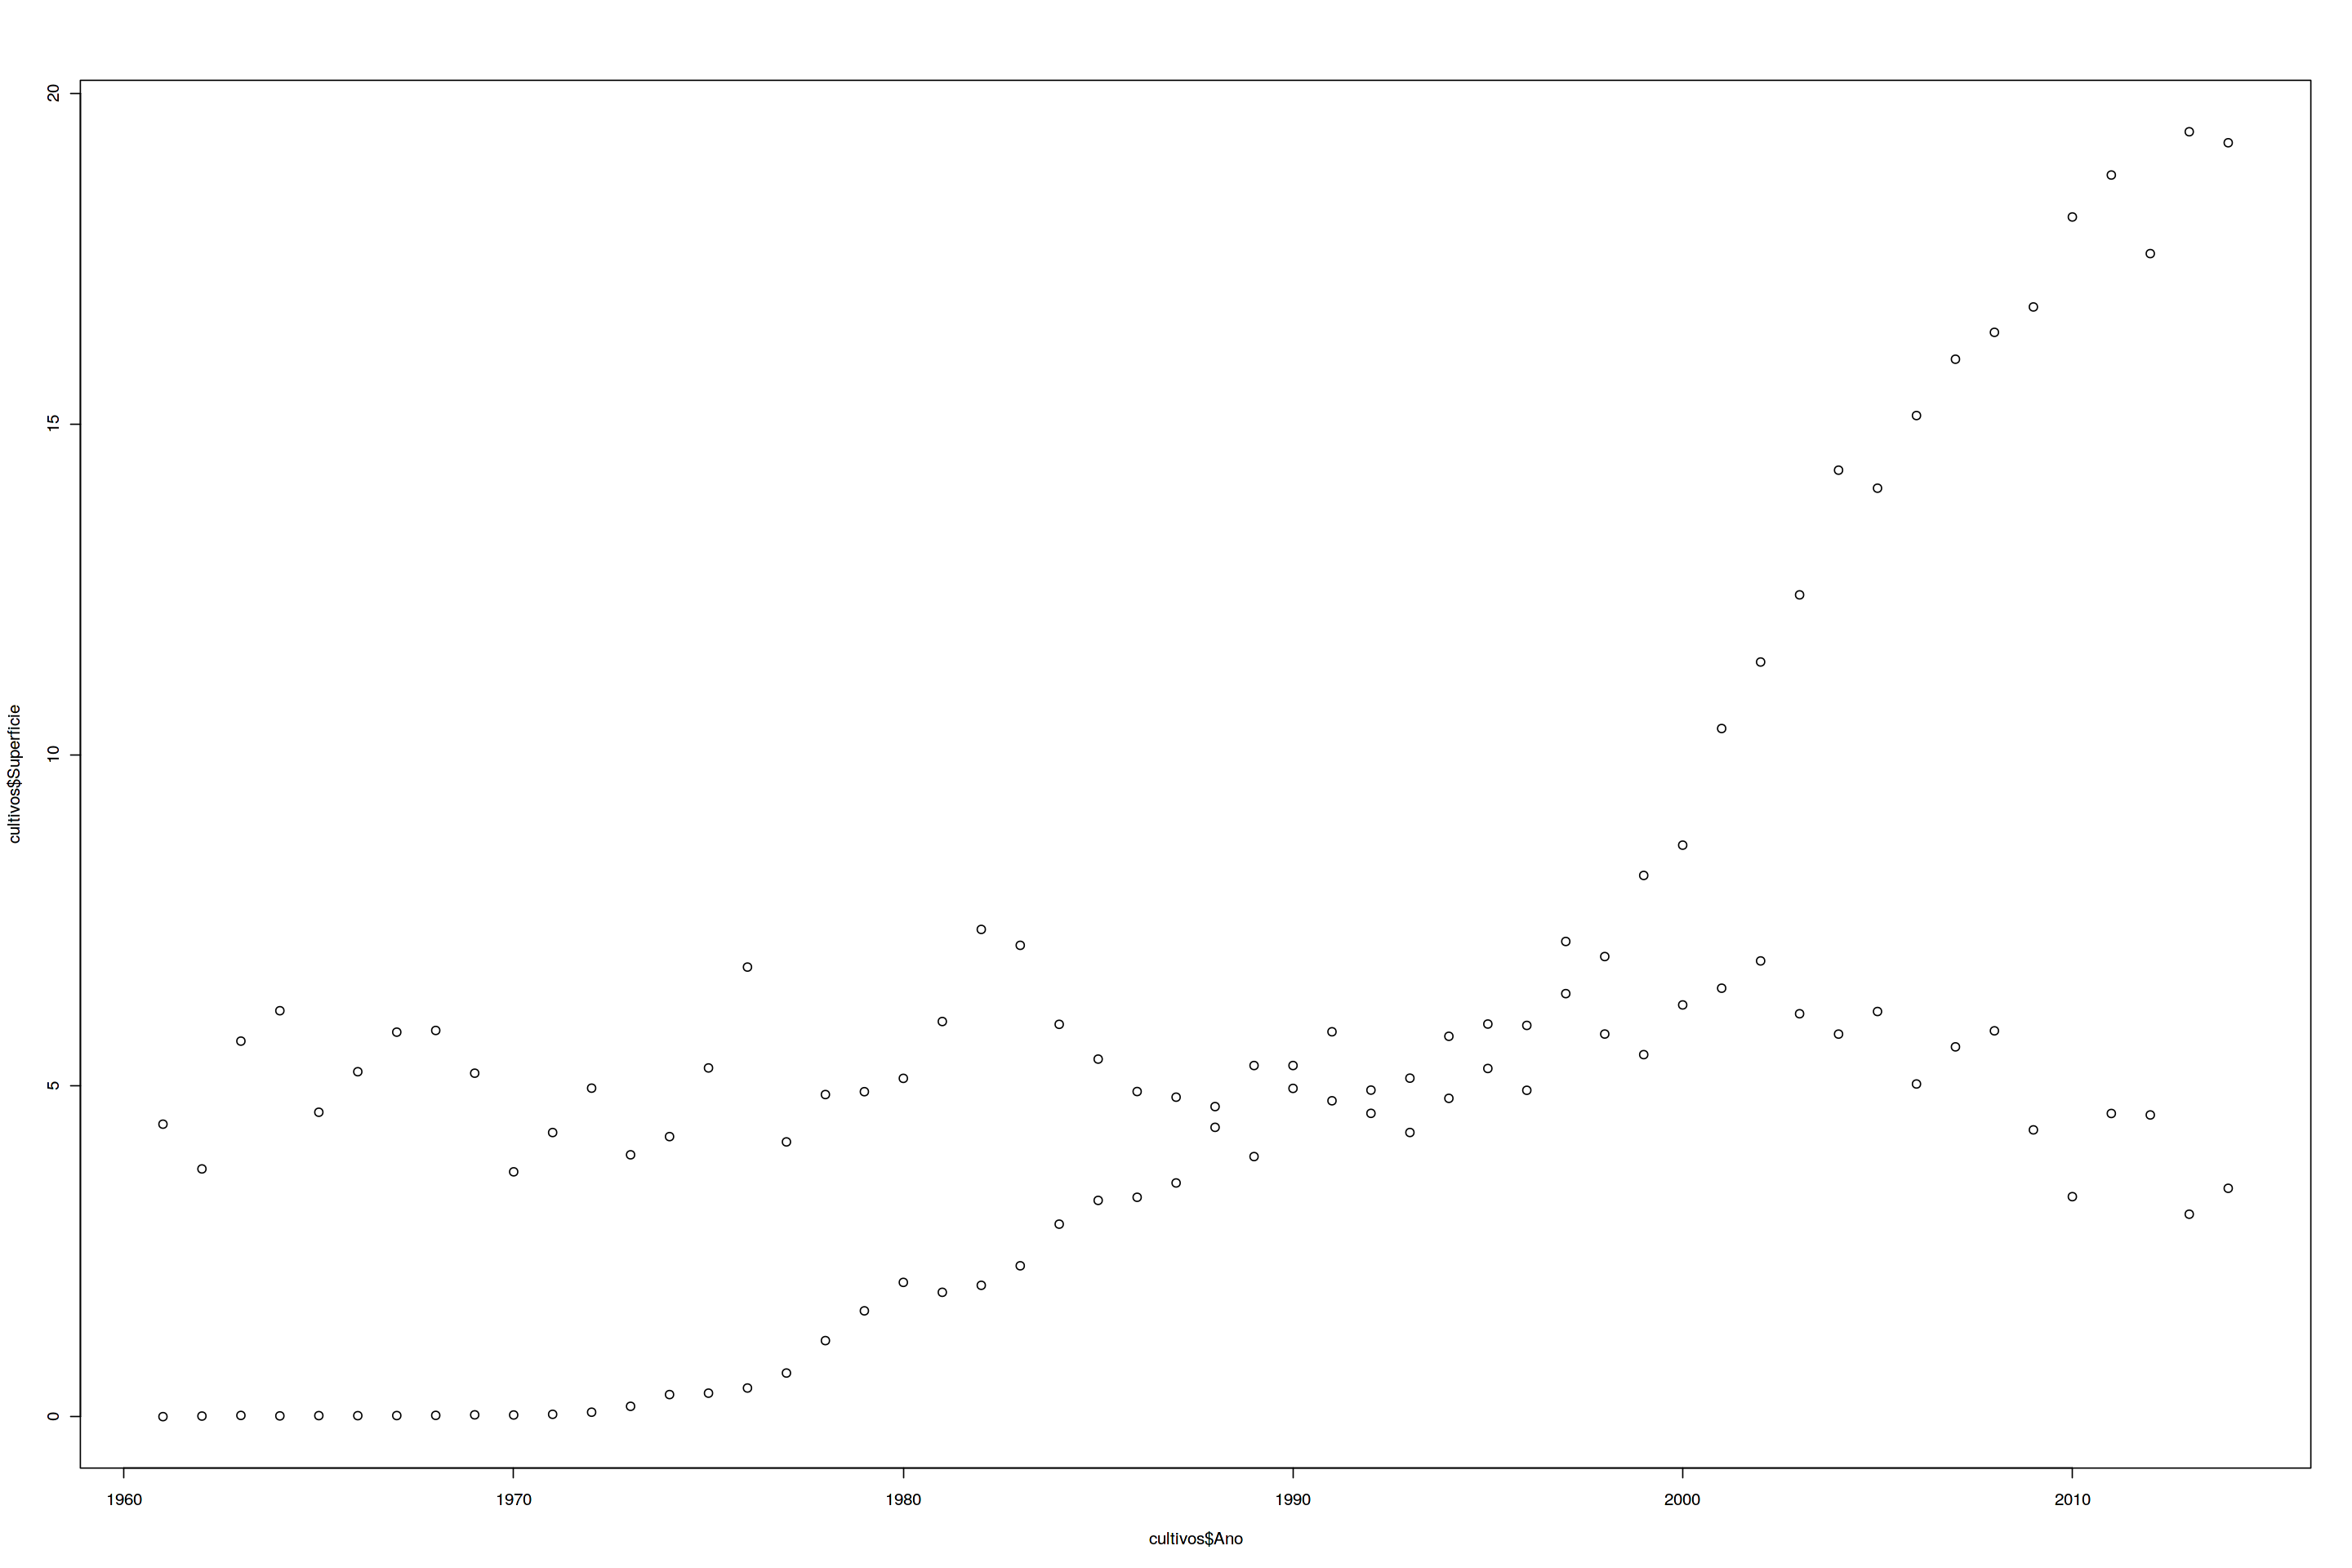

In [92]:
plot(x = cultivos$Ano, y = cultivos$Superficie) #no distinguimos entre soja y maíz...

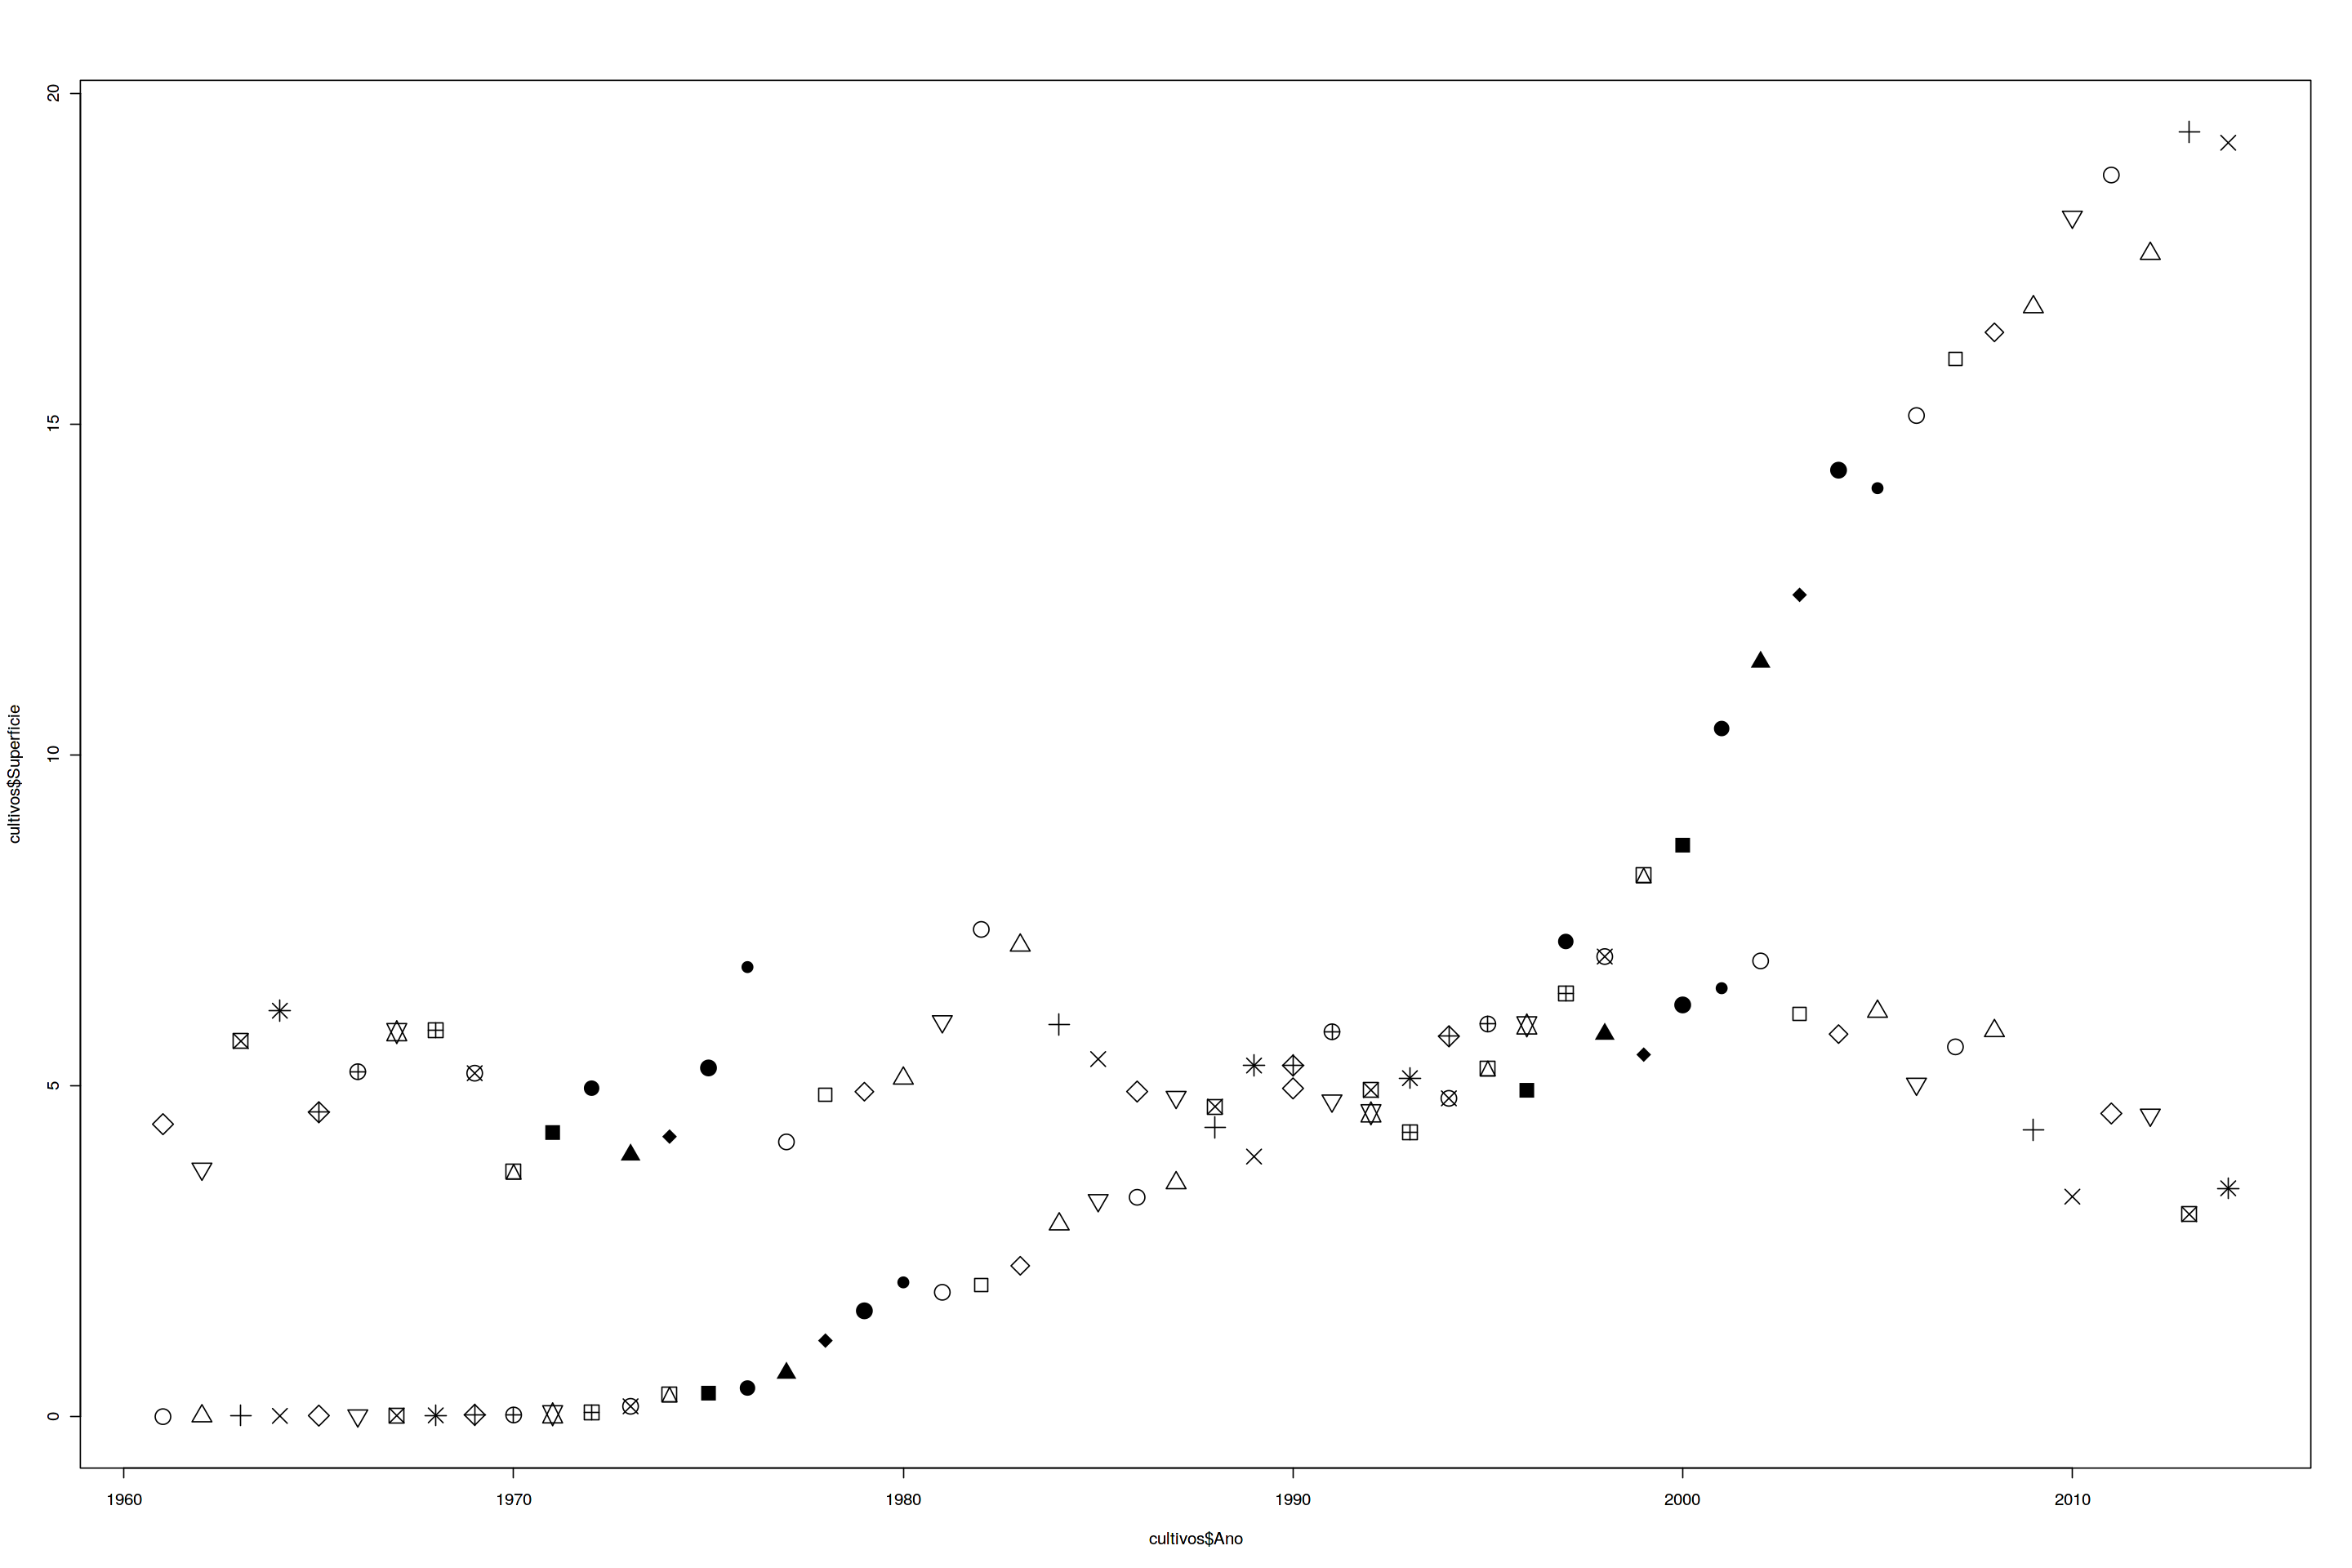

In [93]:
#todos los símbolos posibles, acá no sirve de nada porque mezcla las series
plot(x = cultivos$Ano, y = cultivos$Superficie, pch = seq(1,25,1), cex = 2)

In [96]:
#dejamos dos símbolos, para soja y maíz con un truquito, agregamos detalles
fig(24,14);plot(x = cultivos$Ano, y = cultivos$Superficie,
     pch = c(17,16)[as.integer(cultivos$Cultivo)], #símbolos triángulo y círculo
     cex = 2, #tamaño puntos
    main = "Superficie Cultiva de Soja y Maíz en la Argentina 1960-2014 (FAO)",
    xlab = "Año", ylab = "Superficie (Millones de ha)",
    cex.lab = 1.3, #tamaño letra ejes
    cex.main = 1.5, #tamaño título
    cex.axis = 1.2 #tamaño de los números en los ejes
    )

In [97]:
#dejamos dos símbolos, para soja y maíz con un truquito, agregamos detalles
plot(x = cultivos$Ano, y = cultivos$Superficie, pch = c(17,16)[as.integer(cultivos$Cultivo)],
     cex = 2, main = "Superficie Cultiva de Soja y Maíz en la Argentina 1960-2014 (FAO)",xlab = "Año", ylab = "Superficie (Millones de ha)",
    cex.lab = 1.4,cex.main = 1.5, cex.axis = 1.2)

#LEYENDA
legend(x = 1960, y = 20, #dónde va la leyenda en unidades del plot
       legend=c("Soja", "Maíz"),
       pch = c(16,17),
       cex= 2,
      bg = NA,box.lwd = 0 #sin color de fondo y sin "caja"
      )

Vemos que:

* El maíz parece oscilar en torno a un valor entre 1960 y 2002, luego parece caer.
* La soja parece aumentar exponencialmente después de 1980 (obvio, con cierto ruido). Sin embargo, ahora le vamos a hacer un ajuste lineal.

Vamos al ajuste lineal:

* de la superficie cultivada de maíz entre el 2002 y el 2014 (la pendiente va a ser la tasa media de superficie de maíz que se pierde por año, no?). 

* de la superficie cultivada de soja, entre el 2002 y el 2014....

Luego la graficamos. Y le ponemos leyenda. Etc


In [99]:
#seleccionamos los datos que queremos
maiz <- cultivos[cultivos$Cultivo == "Maíz" & cultivos$Ano >= 2002, ];head(maiz, 2)
soja <- cultivos[cultivos$Cultivo == "Soja" & cultivos$Ano >= 2002, ]; head(soja, 2)

Ano  Superficie Cultivo PorcentajeOGM
96 2002 6.88797    Maíz    13.29048     
97 2003 6.08963    Maíz    21.47548

Ano  Superficie Cultivo PorcentajeOGM
42 2002 11.40525   Soja    99.41037     
43 2003 12.42000   Soja    97.03871

In [100]:
#hacemos el modelito (ajuste) lineal
aju.maiz <- lm(maiz$Superficie ~ maiz$Ano) #es lm(y ~ x) 
aju.soja <- lm(soja$Superficie ~ soja$Ano) 

print("Pendientes")
summary.lm(aju.maiz)$coefficients[2,1:2]
summary.lm(aju.soja)$coefficients[2,1:2]

print("R²")
summary.lm(aju.maiz)$r.squared
summary.lm(aju.soja)$r.squared

print("Crece la soja, decrece el maíz")
#estos objetos aju son complejos y tienen mucha info

[1] "Pendientes"


Estimate  Std. Error 
-0.27436540  0.04316204

Estimate Std. Error 
0.63823252 0.04891309

[1] "R²"


[1] 0.7860206

[1] 0.939313

[1] "Crece la soja, decrece el maíz"


In [101]:
#graficamos el ajuste encima de los datos

#sólo ploteo entre el 2002 y el 2014
plot(x = cultivos$Ano, y = cultivos$Superficie, pch = c(17,16)[as.integer(cultivos$Cultivo)],
     cex = 2, main = "Superficie Cultiva de Soja y Maíz en la Argentina 1960-2014 (FAO)",xlab = "Año", ylab = "Superficie (Millones de ha)",
    cex.lab = 1.4,cex.main = 1.5, cex.axis = 1.2, xlim = c(2002,2014))

#gráfico rectas ajustes
abline(aju.soja, lty = 1)
abline(aju.maiz, lty = 2)

#LEYENDA
legend(x = 2001.5, y = 20.5, #dónde va la leyenda en unidades del plot
       legend=c("Soja","Ajuste Soja","Maíz", "Ajuste Maíz"),
       pch = c(16,NA,17,NA), #no hay puntos en los ajustes, sólo líneas
       lty = c(0,1,0,2), #sin línea en los lugares de los puntos
       cex = 1.5,
       bg = NA,box.lwd = 0 #sin color de fondo y sin "caja"
      )

Notamos que:

* Es importante mantener las leyendas ordenadas.
* Es importante que si se quieren comparar los valores de las pendientes, se muestren en algún del gráfico. Pueden usar `text()` o lo que quieran.


***
***
# Tarea 2

1. Cambie los años de graficación usando, en plot(), el parámetro `xlim = c(1996,2015)`
1. Cambie el rango de la Superficie, usando `ylim(0,54)`. 54 Mha es la ***nueva*** superficie de la zona cultivable, dados desmontes y quemazones.
1. Cambie las líneas de los ajustes por líneas enteras, con dos colores diferentes. Ajuste los parámetros de la leyenda.
***
***

# Gráficos x,y con barras de error

En física está la *sana* costumbre de dibujar barras de error:

* Esto permite ver la calidad de cada uno de los puntos en cuanto a su precisión y también en relación con los modelos.

* Habitualmente tienen un significado particular que no debe ser pervertido, que vamos a discutir después (pero que todes les físiques  ***pervierten***, así es que ustedes no discutan con nadie para tener razón, sino para ver cómo otros pueden no tenerla y defenderla con pasión --zeitgeist--).

Acá sólo queremos graficarlas y después, algún día no tan lejano, veremos qué significado atribuirle.

### Datos 

Ahora vamos a cargar unos datos de medidas de ángulos utilizando el acelerómetro de un teléfono, y el ángulo en que se encontraba el teléfono medido con trigonometría.

Las medidas de gravedad del acelerómetro, como ya vimos, tienen una dispersión caracterizada por $s$. Cuando calculamos un ángulo a partir de las mismas, tendremos una dispersión en el ángulo, que está en los datos que cargaremos a continuación.

In [103]:
setwd("/home/juan/Documentos/Docencia/fexpi/2020/NTB/2.rcargadatos/Datos/"); getwd()
a <- read.csv("calibra.csv", sep = ",", header = T); head(a, 3) #carga y visualiza datos para corroborar

#pasamos todo de radianes a grados sexagesimales, para que podamos visualizar esos ángulos naturalmente
a$Atrig <- a$Atrig*180/pi; a$Aacel <- a$Aacel*180/pi; a$sAacel <- a$sAacel*180/pi
head(a)

[1] "/home/juan/Documentos/Docencia/fexpi/2020/NTB/2.rcargadatos/Datos"

Atrig     Aacel     sAacel    
1 0.0000000 0.0000000 0.01000000
2 0.1896916 0.1959439 0.01702220
3 0.2478344 0.2464785 0.01720603

Atrig    Aacel    sAacel   
1  0.00000  0.00000 0.5729578
2 10.86853 11.22676 0.9753002
3 14.19987 14.12218 0.9858329
4 17.08204 16.81097 1.1169980
5 20.16095 19.86492 1.6770377
6 22.68908 22.43357 0.9758049

* la columna `Atrig` es el ángulo calculado trigonométricamente, a aprtir de longitudes de catetos.
* la columna `Aacel` es el ángulo calculado a partir de los datos del acelerómetro en reposo.
* la columna `sAcel` es la desviación estándar de la muestra de los ángulos calculados a partir de datos del acelerómetro. Este dato es el que pondremos en las barras, cuantificando la **incerteza** o **error**.

Una manera de comparar las medidas es haciendo un gráfico x,y, con la colección de ángulos "trigonométricos" en el eje $x$ y la colección de ángulos calculados a partir del acelerómetro en el eje $y$. Al eje $y$ se le adjuntan barras de error por cuestiones que no vienen al caso, pero es posible adjuntarlas, además, al eje $x$. 

Ahí vamos:

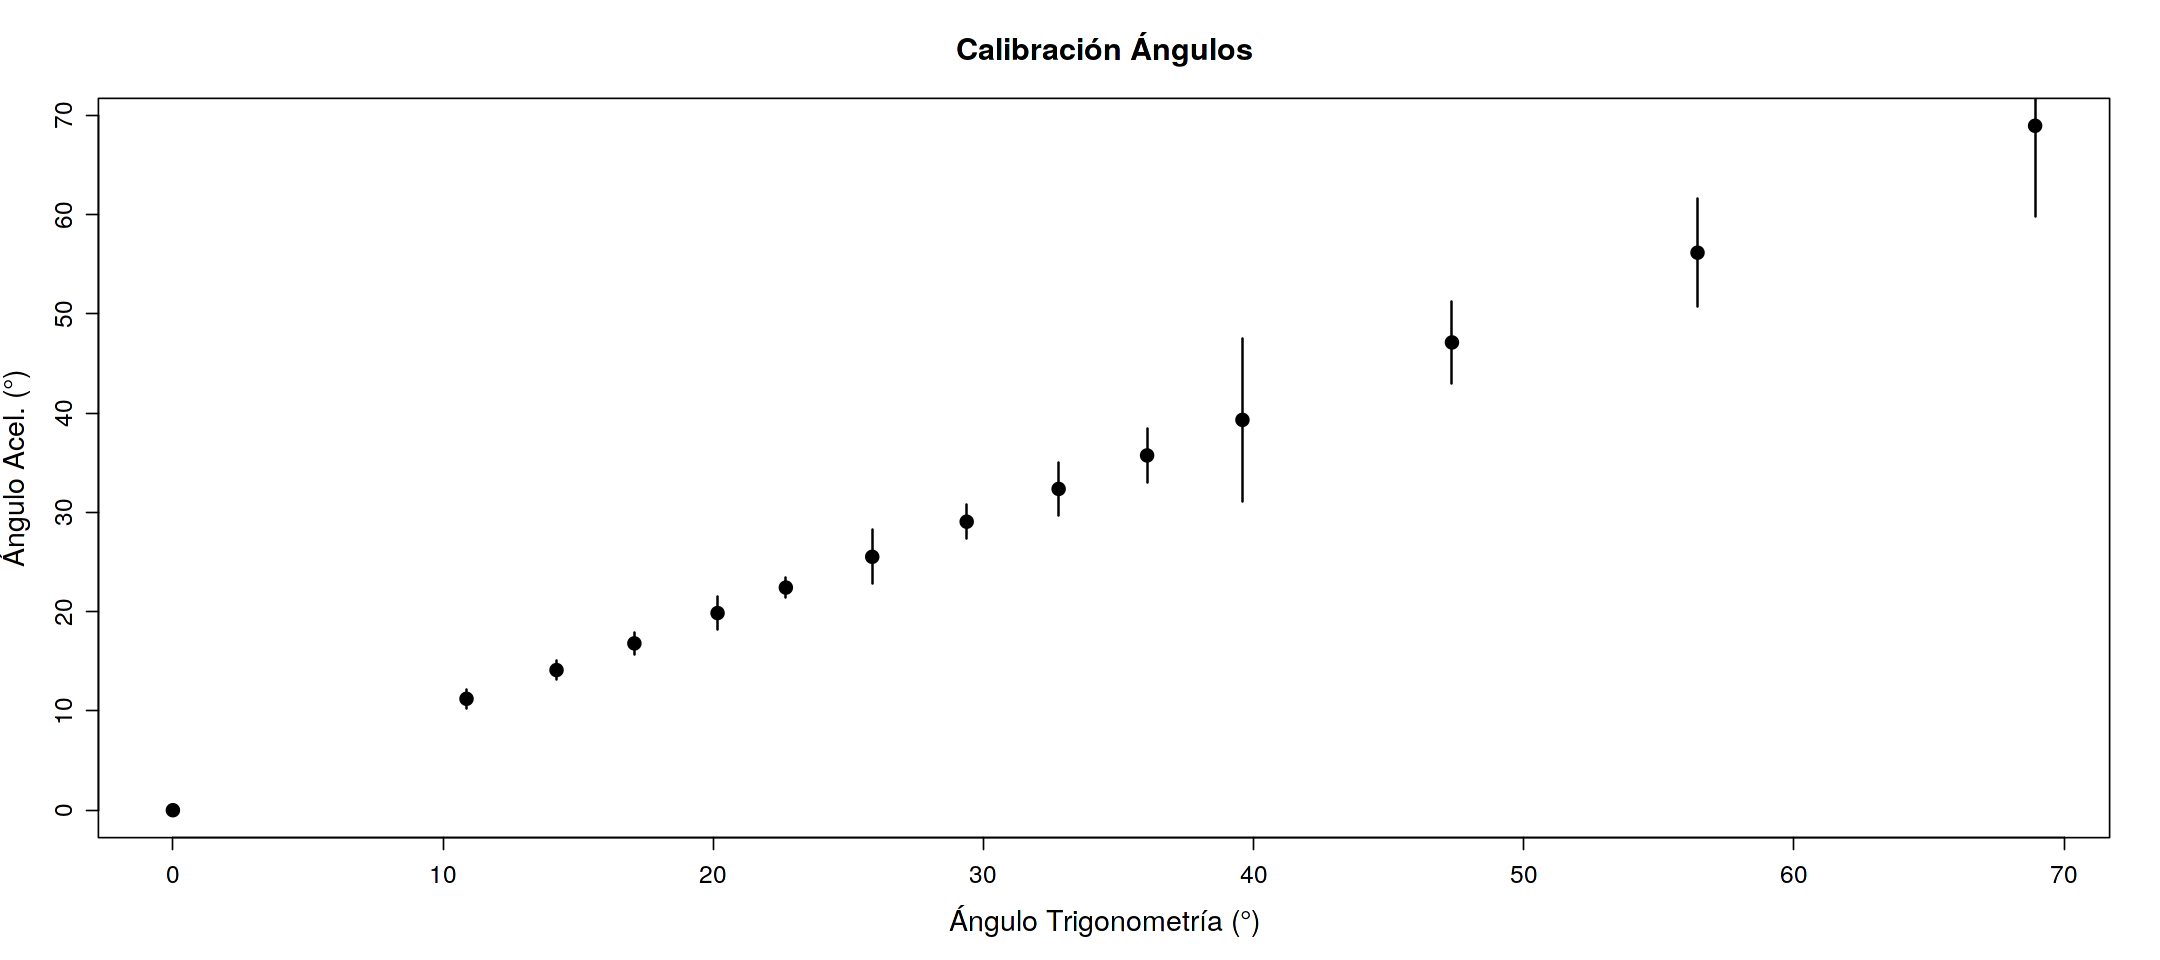

In [26]:
#dejamos dos símbolos, para soja y maíz con un truquito, agregamos detalles
plot(x = a$Atrig, y =  a$Aacel, pch = 16,  cex = 1.5, main = "Calibración Ángulos",xlab = "Ángulo Trigonometría (°)", ylab = "Ángulo Acel. (°)",
    cex.lab = 1.4,cex.main = 1.5, cex.axis = 1.2)

arrows(x0 = a$Atrig, x1 = a$Atrig, 
       y0 = a$Aacel - a$sAacel, #la media - s
       y1 = a$Aacel + a$sAacel, #la media + s
       length =0, lwd = 1.5
      )

Un problema habitual es que las barras de error queden *fuera* de los límites de graficación. Lo arreglamos usando ``xlim``en `plot()`

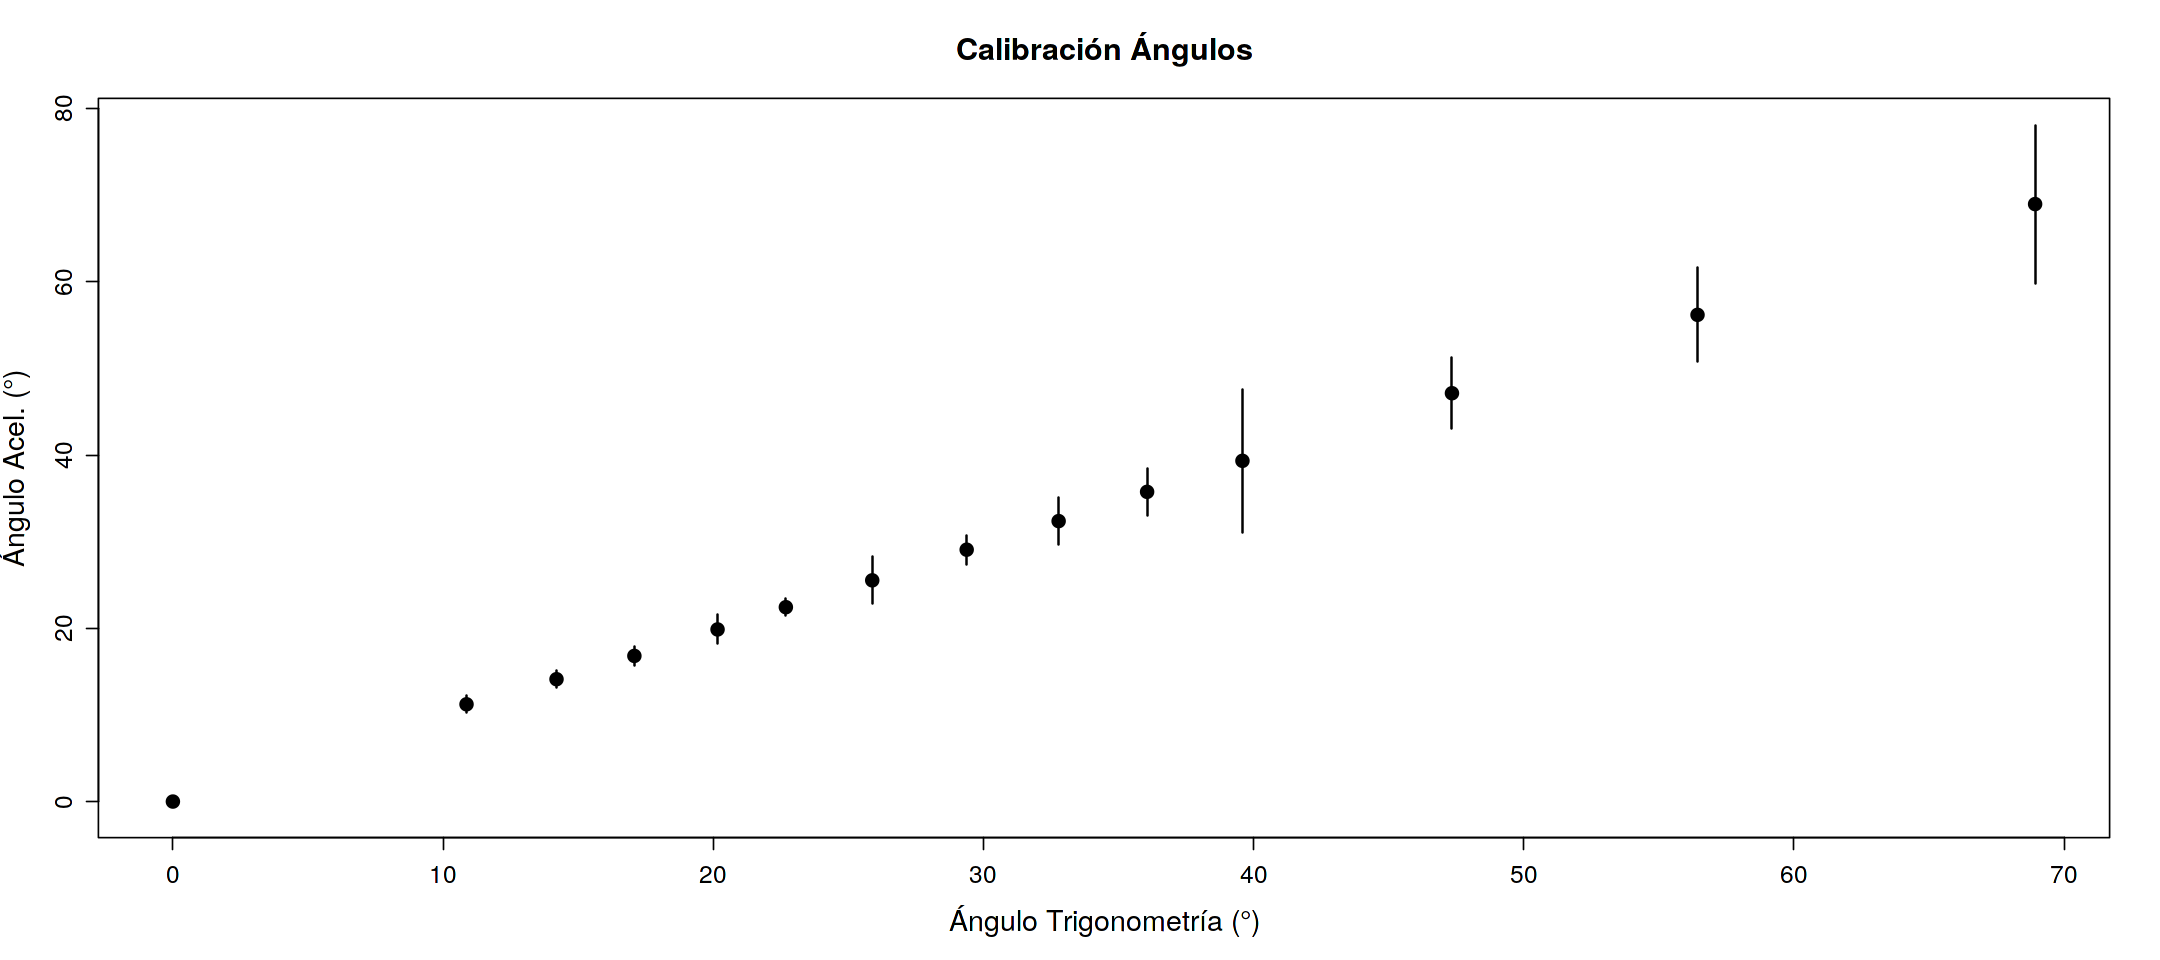

In [27]:
plot(x = a$Atrig, y =  a$Aacel, pch = 16,  cex = 1.5, main = "Calibración Ángulos",xlab = "Ángulo Trigonometría (°)", ylab = "Ángulo Acel. (°)",
    cex.lab = 1.4,cex.main = 1.5, cex.axis = 1.2, ylim = c(-1,78))

arrows(x0 = a$Atrig, x1 = a$Atrig, 
       y0 = a$Aacel - a$sAacel, #la media - 3*s
       y1 = a$Aacel + a$sAacel, #la media + 3*s
       length =0, lwd = 1.5
      )

El gráfico anterior es un gráfico de calibración. Nos informa si *hay acuerdo* entre las medidas del acelerómetro y la trigonometría (obvio que se tiene que *hilar* más fino, pero lo veremos luego).

En efecto, si hay acuerdo entonces todos los puntos deben caer *cerca* de una recta $y = x$. Por otra parte, se puede realizar un ajuste lineal de los datos y comparar parámetros para dar una primera cuantificación del acuerdo. Vamos a graficar estas dos líneas.

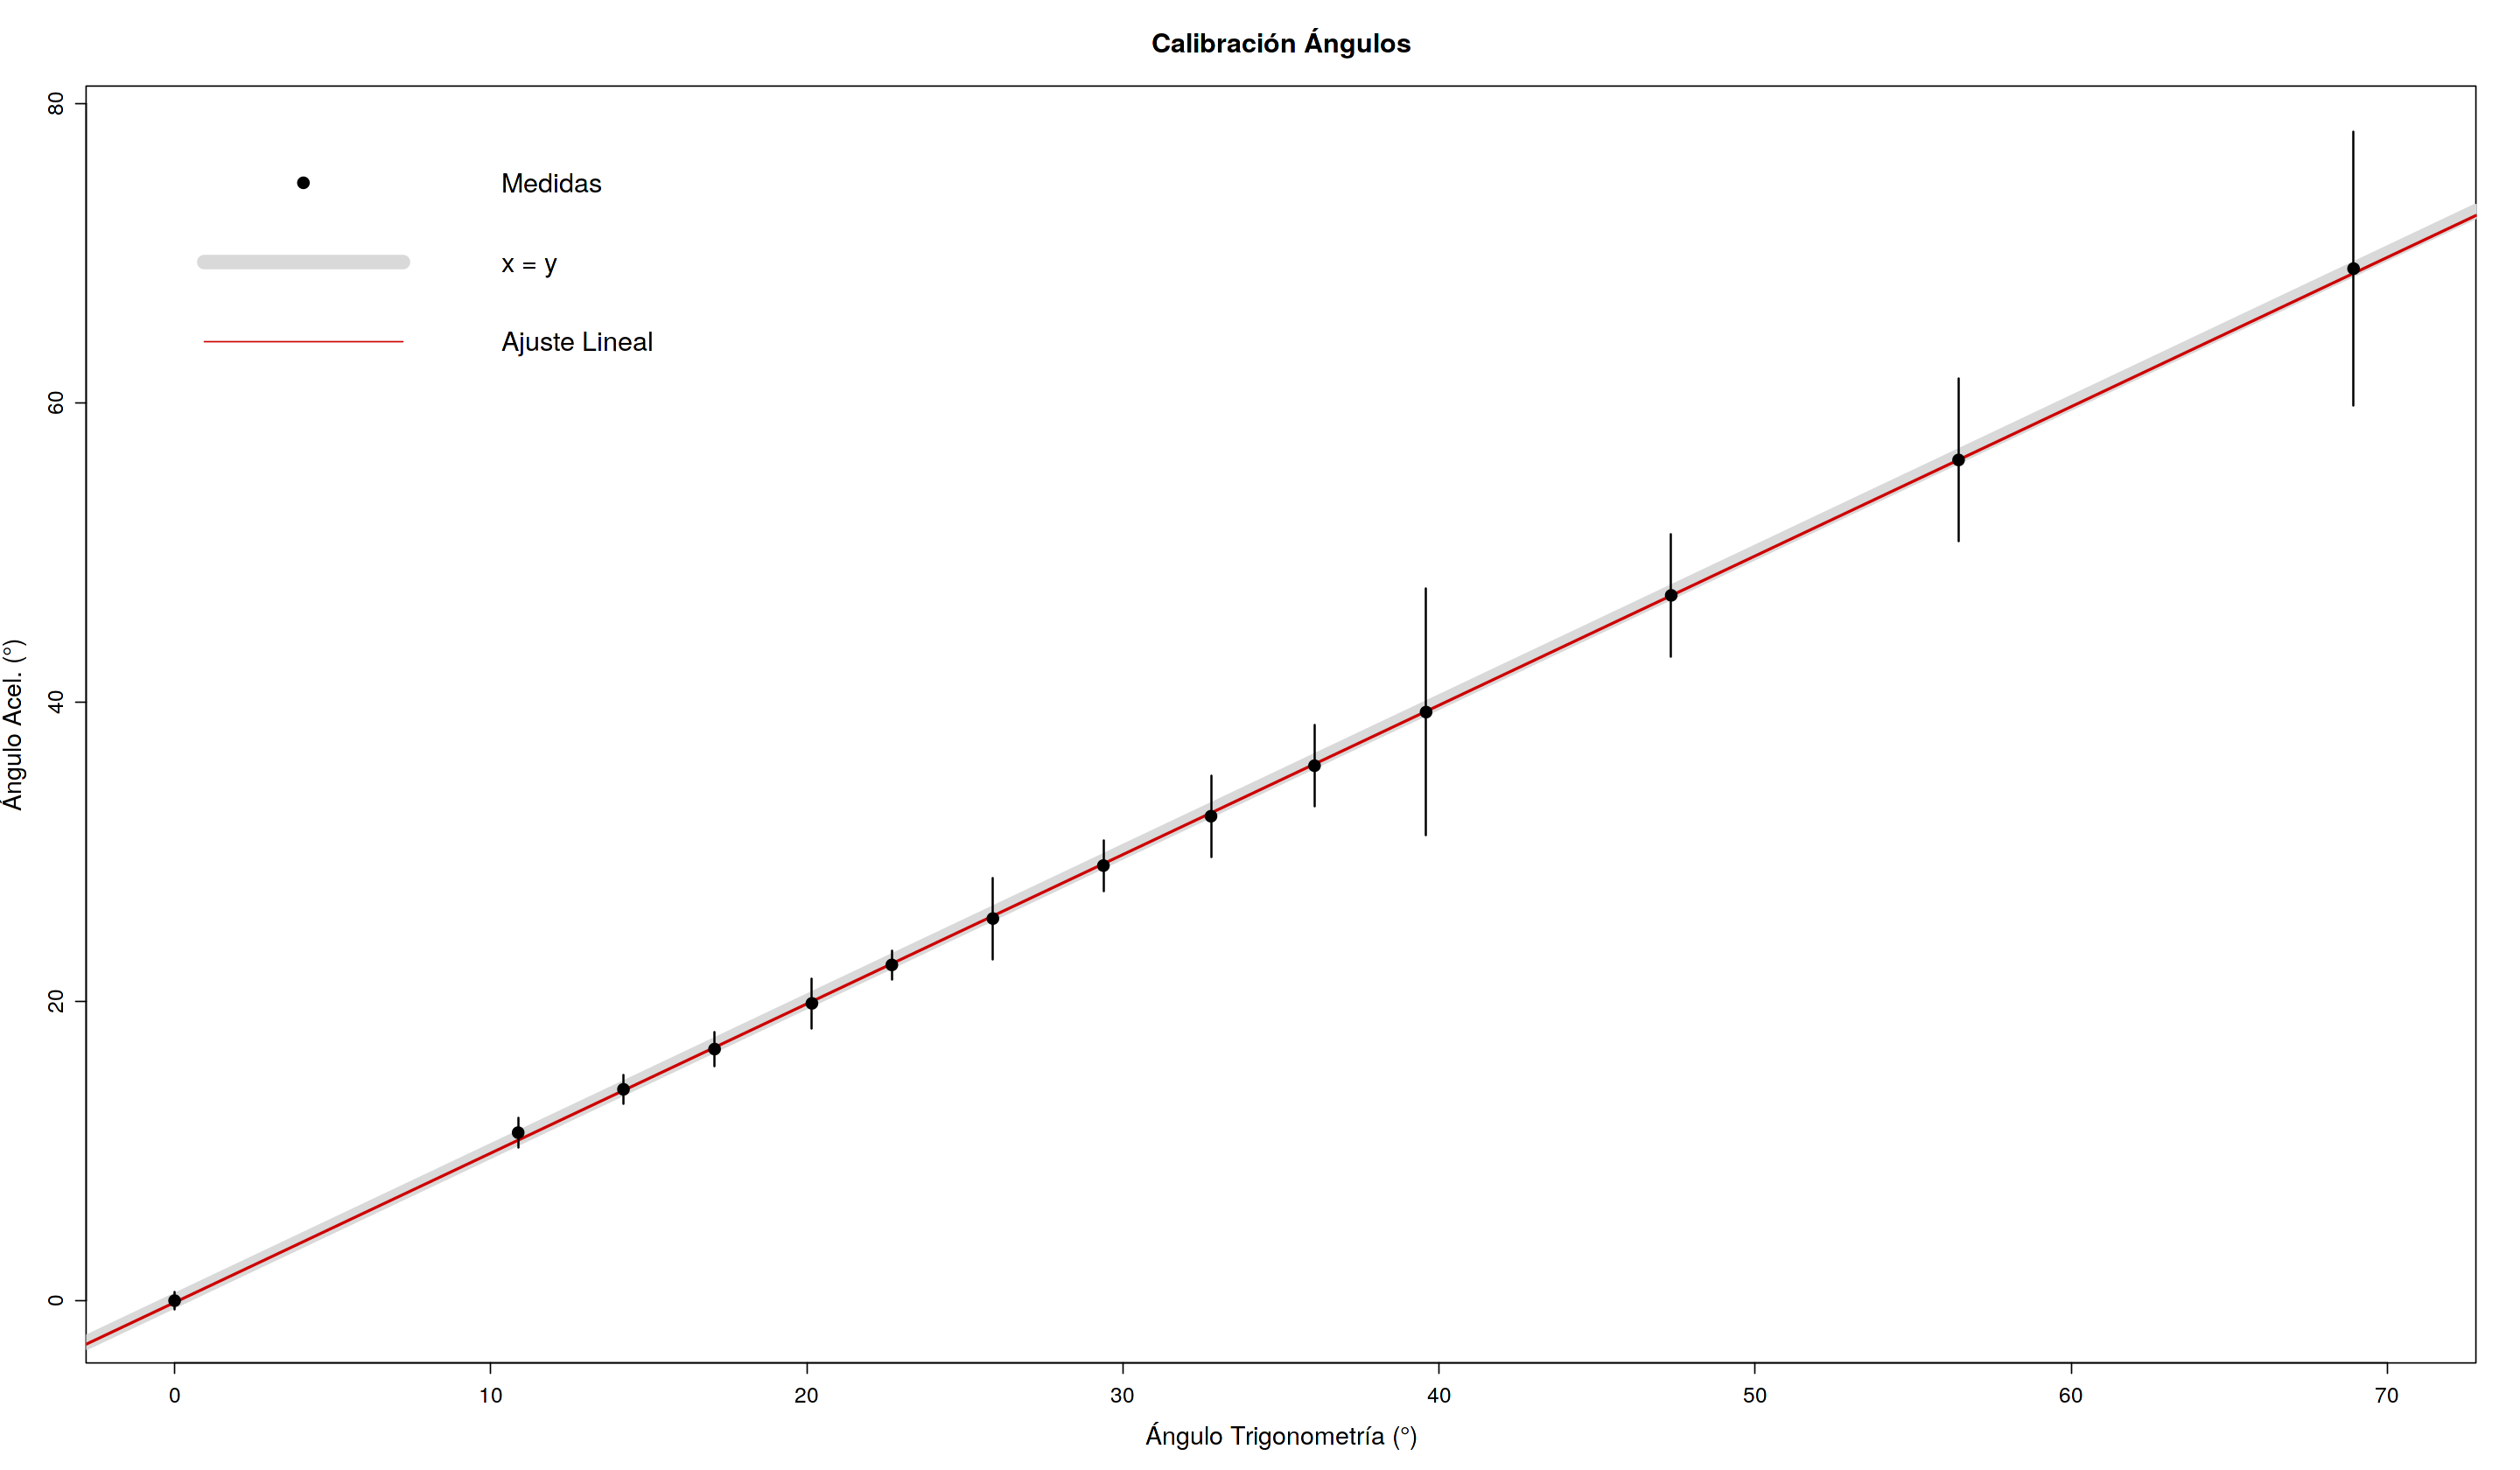

In [104]:
ajuste <- lm(a$Aacel ~ a$Atrig)

plot(x = a$Atrig, y =  a$Aacel, pch = 16,  cex = 1.5,main = "Calibración Ángulos",xlab = "Ángulo Trigonometría (°)", ylab = "Ángulo Acel. (°)",
    cex.lab = 1.4,cex.main = 1.5, cex.axis = 1.2, xlim = c(0,70), ylim = c(-1,78), type = "n")
abline(a = 0,b = 1, lty = 1, lwd = 10, col = "grey85")
abline(ajuste, lwd = 2, col = "red3", )
points(x = a$Atrig, y =  a$Aacel, pch = 16,  cex = 1.5) #ploteo encima para que se vean bien los puntos

arrows(x0 = a$Atrig, x1 = a$Atrig, 
       y0 = a$Aacel - a$sAacel, #la media - 3*s
       y1 = a$Aacel + a$sAacel, #la media + 3*s
       length =0, lwd = 1.5
      )
#ajuste y línea x = y

#LEYENDA
legend(x = 0, y = 80, #dónde va la leyenda en unidades del plot
       legend=c("Medidas","x = y","Ajuste Lineal"),
       pch = c(16,NA,NA), #no hay puntos en los ajustes, sólo líneas
       lty = c(0,1,1), #sin línea en los lugares de los puntos
       lwd = c(1,10,1),
       col = c("Black", "Grey85", "red3"),
       cex = 1.5,
       bg = NA,box.lwd = 0 #sin color de fondo y sin "caja"
      )

In [29]:
summary.lm(ajuste) #a primera vista da muy muy lindo


Call:
lm(formula = a$Aacel ~ a$Atrig)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22050 -0.12151 -0.06804  0.05921  0.50263 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.119582   0.108139  -1.106     0.29    
a$Atrig      0.997716   0.003086 323.261   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2071 on 12 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.045e+05 on 1 and 12 DF,  p-value: < 2.2e-16


## Cerrando

Las gráficas son la forma de comunicar datos en ciencias. Poseen, como todo sistema de símbolos destinada a comunicar cosas, una semiología.

Aquí mostramos algunos detalles de esa semiología, que no vale la pena repetir (pero que deben saber).



# Cambio de escala: usando ln en un gráfico x,y

Vamos a ver un típico cambio de escala de una función que crece exponencialmente. La función la vamos a definir acá, para resaltar el problema que queremos ver, el cambio de escala de uno o dos ejes.

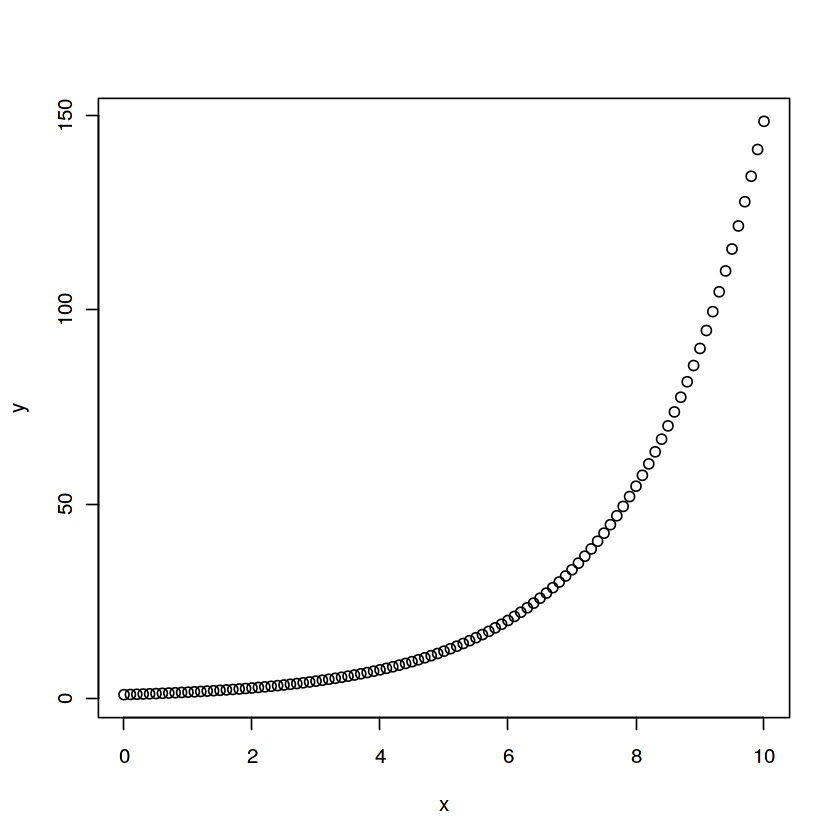

In [2]:
#Definimos x e y

x <- seq(0,10,0.1)
y <- exp(0.5*x) # e^x
plot(x,y)

Ya sabemos que las funciones exponenciales se ven como rectas cuando hacemos la gráfica semi-log. Tenemos que:

$$y = Ce^{ax}$$

Si tomamos el logaritmo natural en ambos miembros queda:

$$ln(y) = ln(C) + ln(e^{ax}) = ln(C) + ax \;\; \Rightarrow y' = ln(y) \Rightarrow \\ \Rightarrow y' = ln(C) + ax$$

ojo que esto vale para cualquier base, con ciertos cuidados, es decir, si tenemos $y = 2^{ax}$ también funciona, pero aparece un factorcito...sacando la cuenta sale rápido.

Ploteamos en escala semi-log, pero hay dos formas:

1. Le indicamos a `plot()` que use logaritmos.

(Intercept) 
-7.070164e-16

x 
0.5

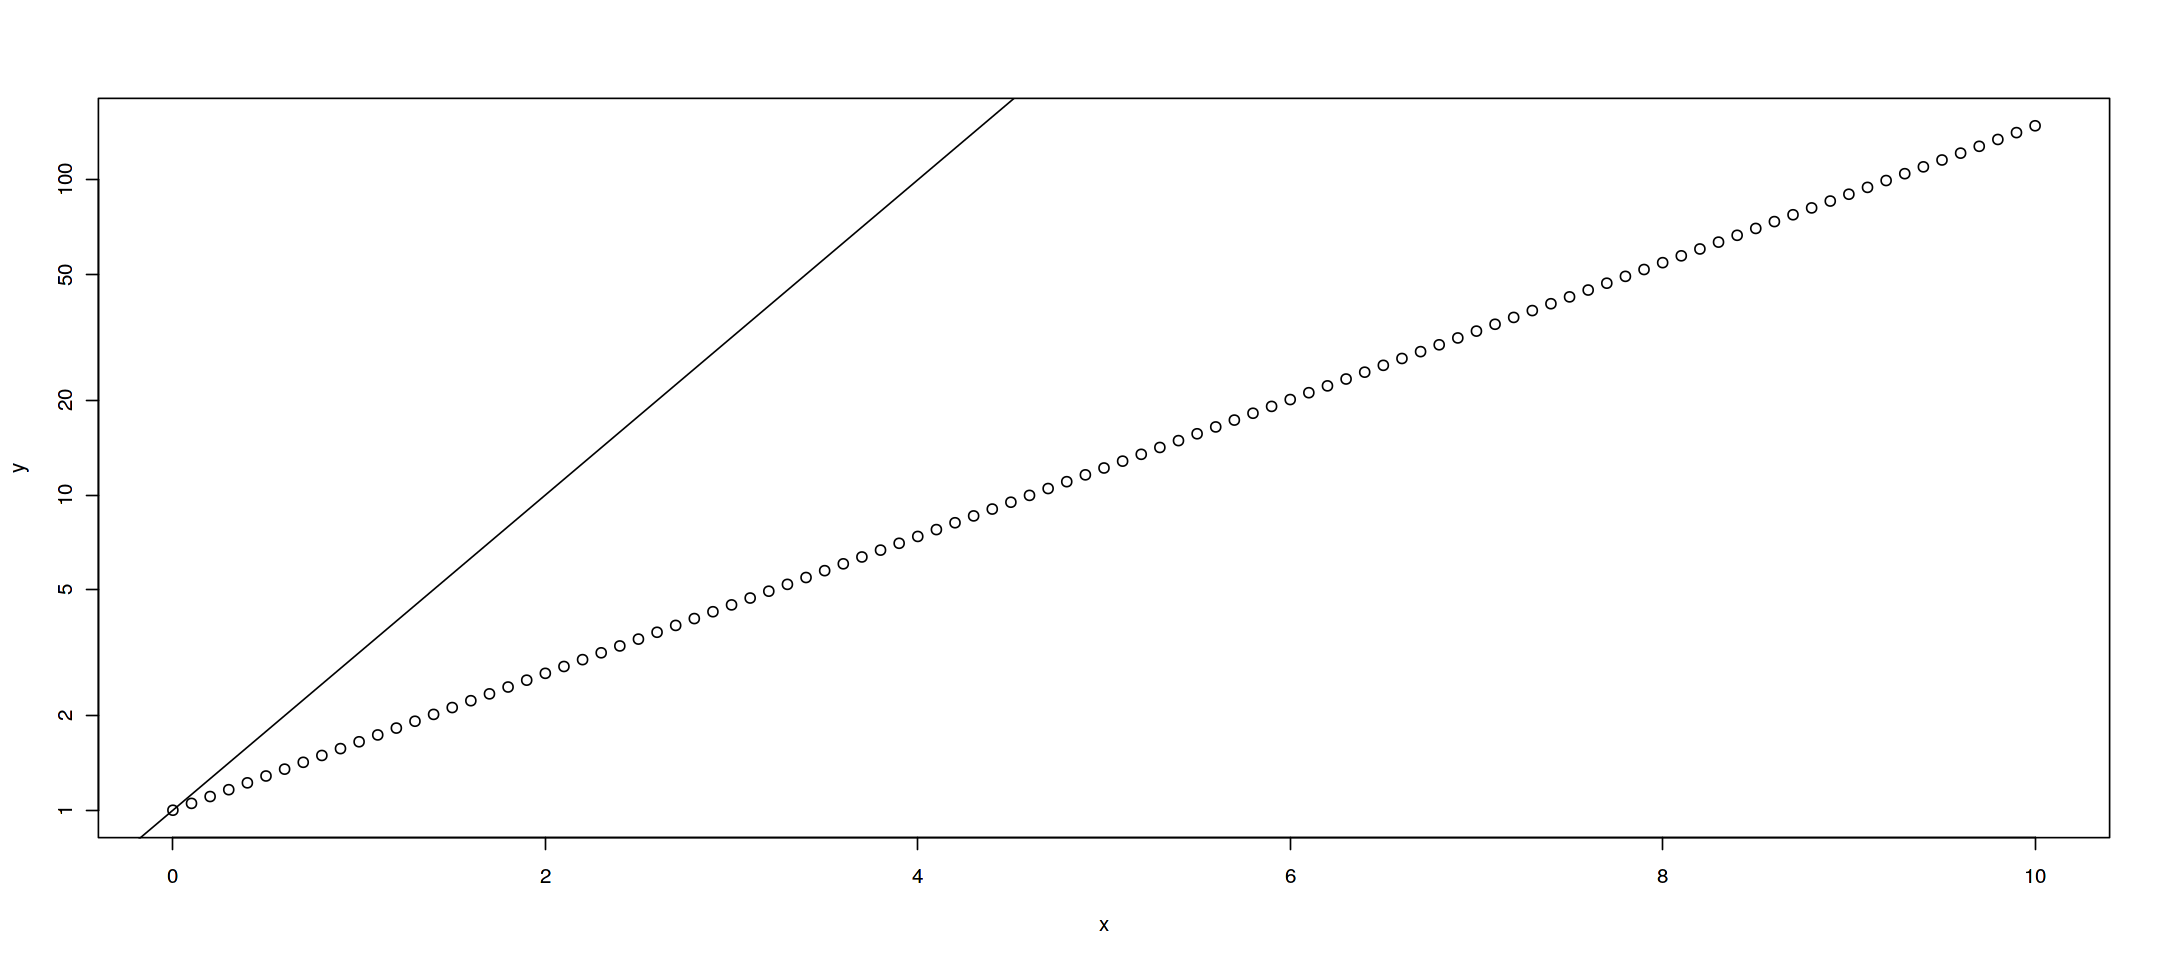

In [31]:
plot(x,y,log = "y"); #recordamos siempre que log es logaritmo natural 

a <- lm(log(y) ~ x); #ajuste de una recta en escala semi-log

abline(a)#nos grafica una recta, que tiene pendiente a, y ordenada al origen b,
#pero en la escala transformada...y sale cualquier cosa


ord.origen <- a$coefficients[1]; pendiente <- a$coefficients[2]; #sacamos los parámetros del ajuste
ord.origen; pendiente #imprime parámetros de ajuste

Para ver que estamos graficando mal, notamos que $y' = ln(y) = ln(C) + ax$, con lo que si ajustamos una recta $y' = pendiente \; x + ord.origen$, tenemos una identificación fácil:

* La $pendiente = a$. 
* La $ord.origen = ln(C)$.

Si queremos ***reconstruir*** la recta en la escala del logaritmo, lo que tenemos que hacer es dibujar una ***exponencial en la escala lineal***. Esa exponencial es:

$$Ajuste = e^{\;ln(C) + a x} \;\;\; = e^{ln(C)} \;\;\; e^{ax}\;\; =\;\; C \;e^{ax}$$

lo que reconstruye el modelo exponencial del cual partimos.

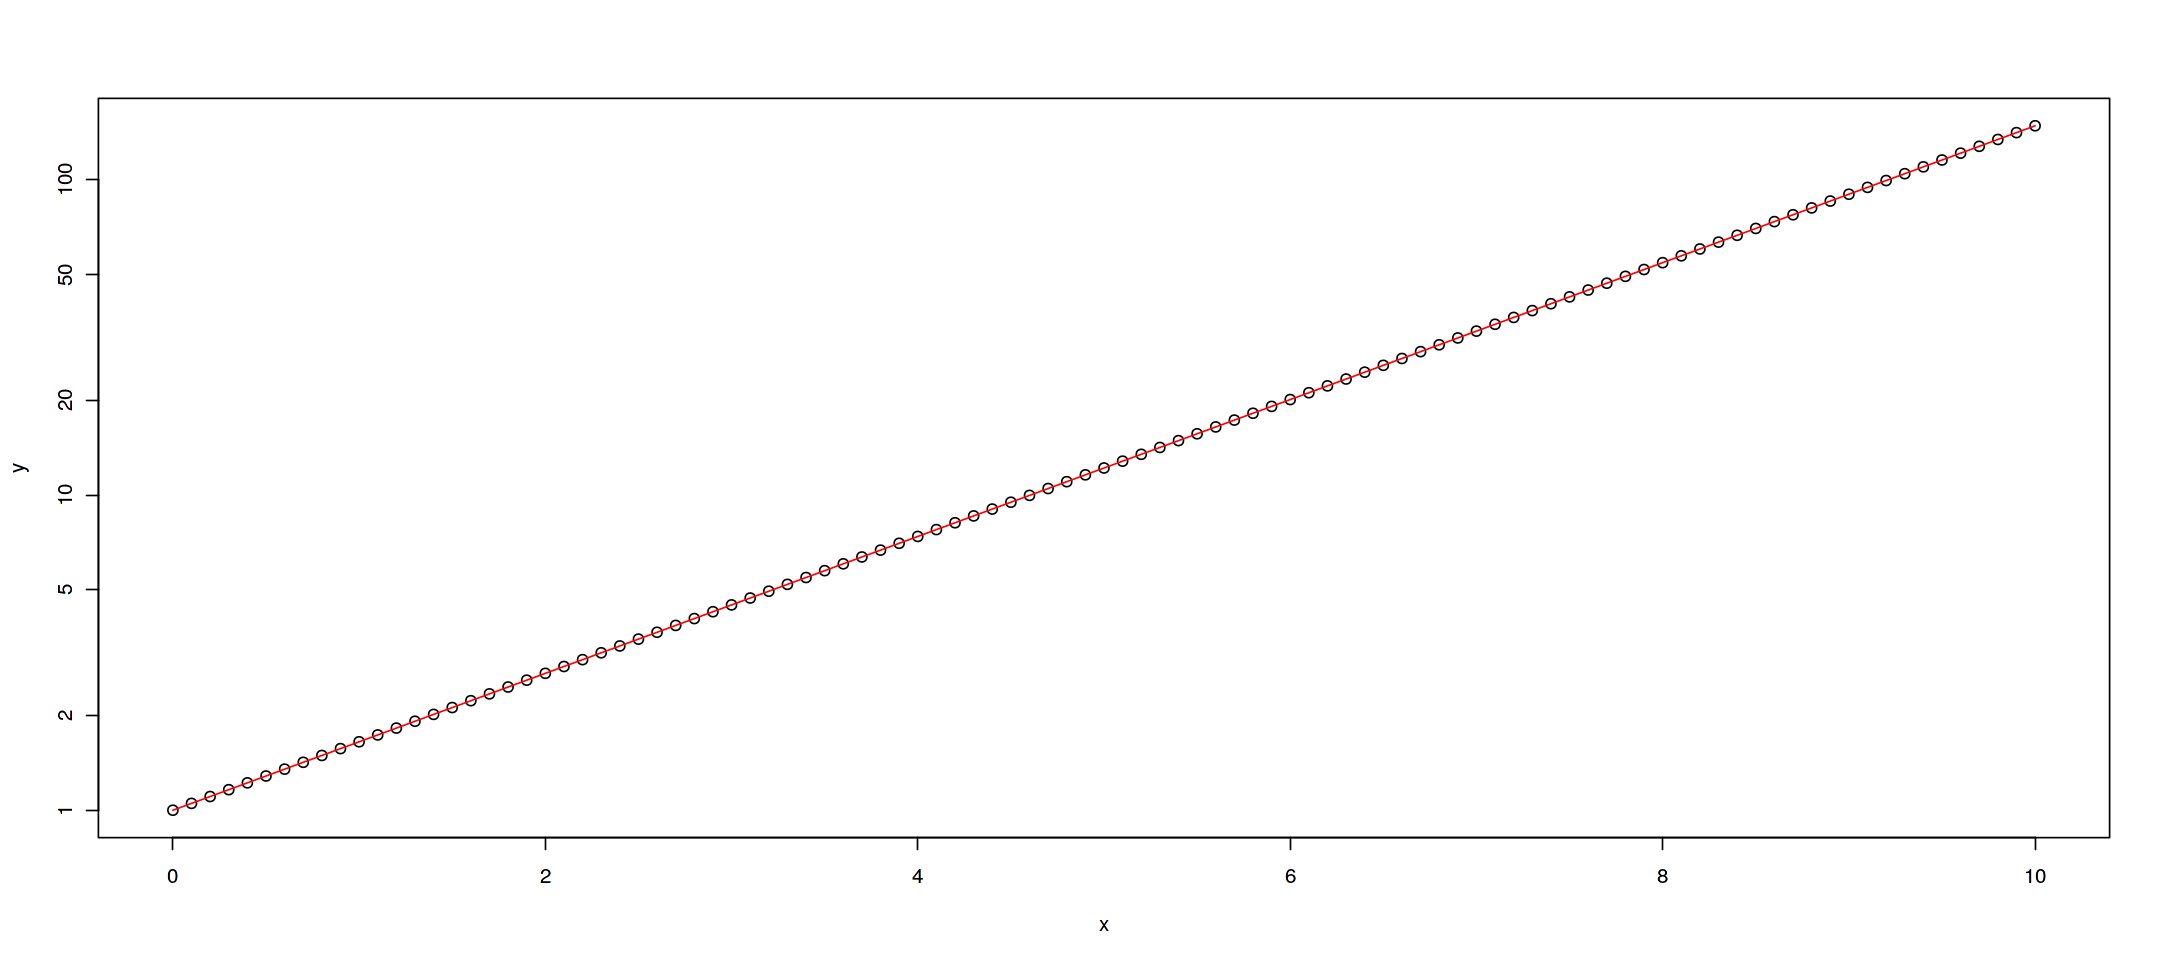

In [32]:
plot(x,y,log = "y")
lines(x = x, y = exp(ord.origen+pendiente*x), col = "red")
#ahora sí funciona, porque graficamos una exponencial

2. La otra versión es transformar "a mano" y graficar el ln(y)....lo que nos lleva al problema de los valores en el eje: si miramos, el eje y mantiene los valores sin transformar (y está bien que así sea):

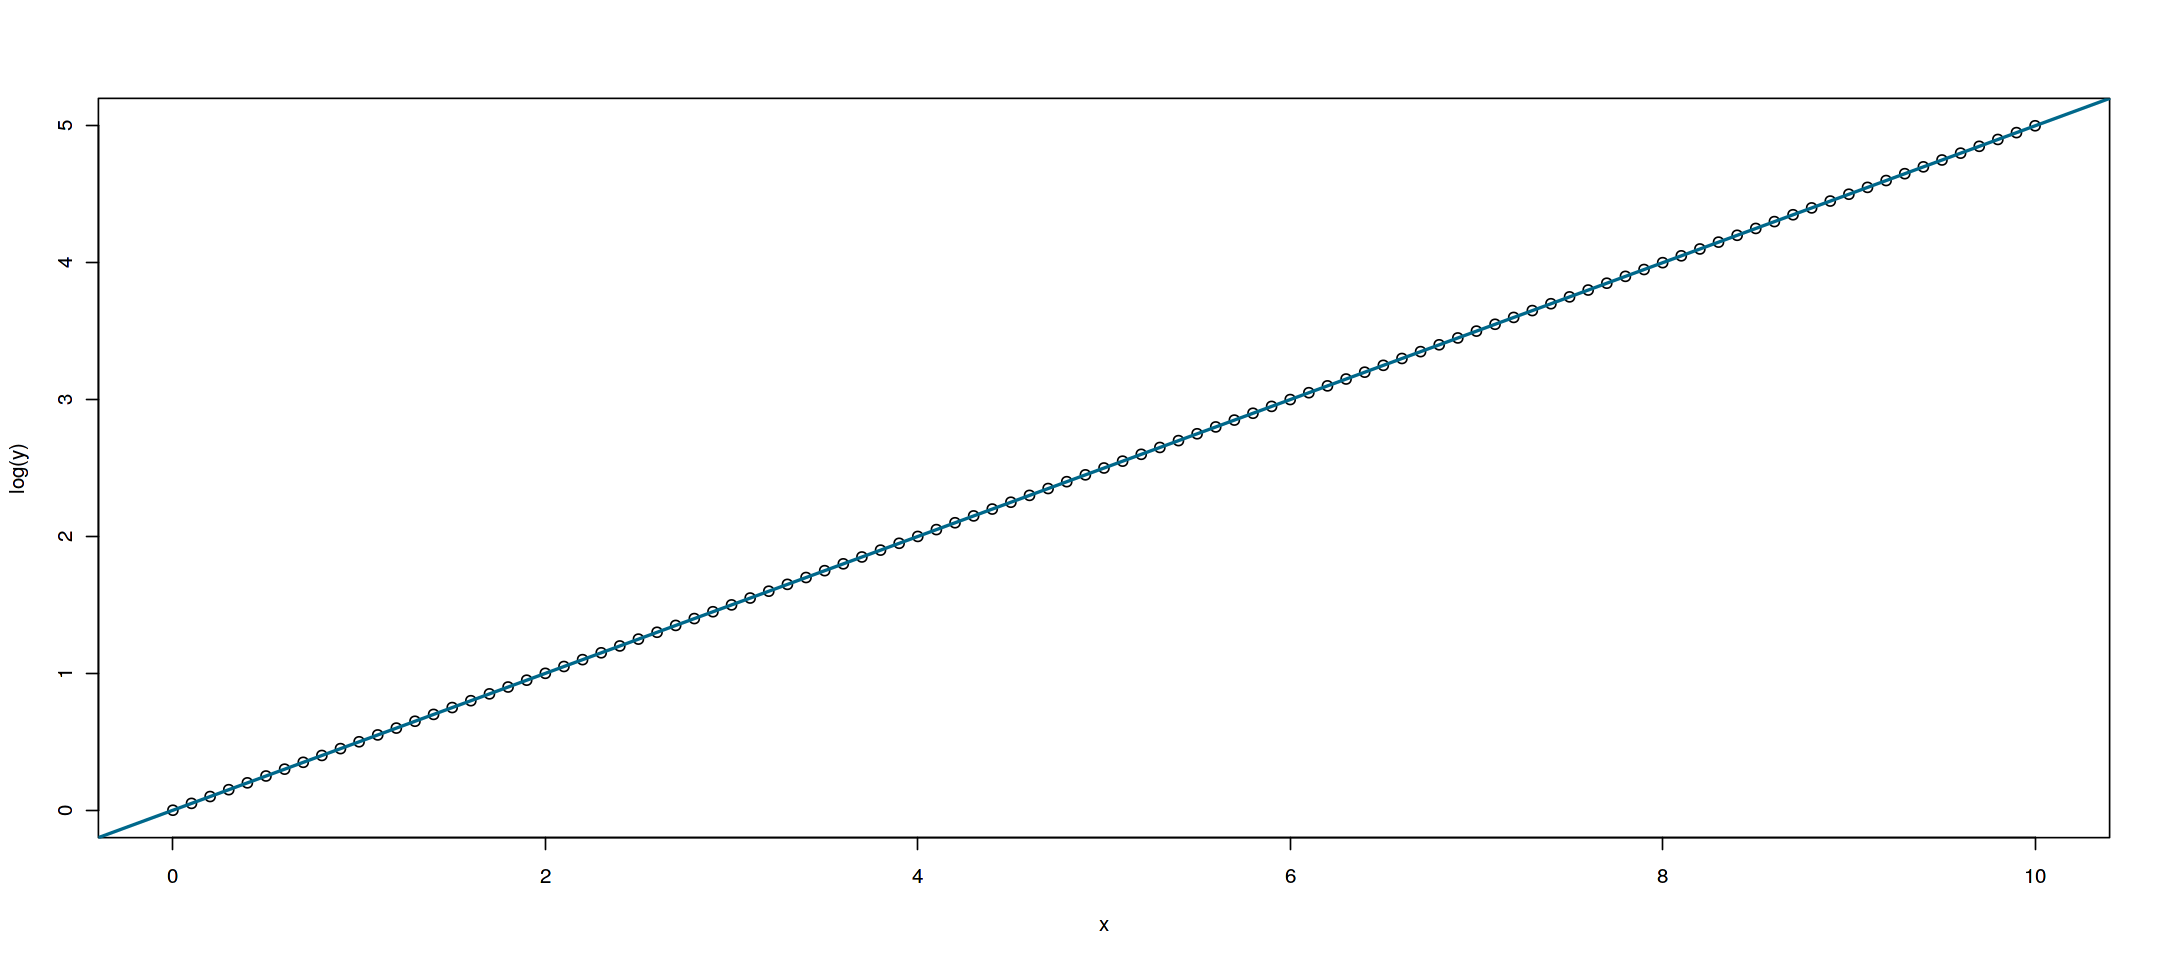

In [33]:
plot(x, log(y))
abline(a, col = "Deepskyblue4", lwd = 2)

El problema de esto es que los valores que salen en el eje vertical son los valores del logaritmo de $y$, y eso no está nada bueno, porque queremos los valores de $y$ ***escala logarítmica***. Nadie ve un gráfico en escala semi-log buscando los valores del logaritmo, porque es difícil ver en qué rango de la variable $y$ estamos parados.

Por ejemplo, si se informara en la televisión que la pandemia de coronavirus tiene $e^{10.12}$ muertos, la información sólo sería accesible a personas que sepan que eso es una potencia. Igualito para los gráficos con escalas no lineales: es necesario entender que las escalas no lineales sirven para ***extraer información de parámetros y de comportamiento de la relación***, y esto no hace que el rango de la variable $y$ deje de importar.

Es posible escribir los valores de la variable $y$ a mano, y de hecho lo utilizaremos cuando la transformación de escala no sea un logaritmo, sino otra función.

In [34]:
plot(x, log(y), ylab = "y (unidades) [log]", yaxt = "n") #yaxt le dice que no grafique intervalos el eje y

labels <- c(1,10,50,100,150) #etiquetas que vamos a querer
axis(2,at=log(labels),labels=labels) #vean que at= log(labels) indica que ponga cada etiqueta
#en las posiciones log(etiquta) del eje

abline(a, col = "Deepskyblue4", lwd = 2) #podemos, claro, dibujar la recta, porque la escala
#del gráfico no está transformada.

# Escalas log-log

Vamos a proponer una relación: 
$$
y = \Big(\frac{x}{C}\Big) ^{1/c} + 5
$$

Es importante ver que, con logaritmos, no se puede ***linealizar la ecuación*** mediante escalas semi-log o log-log(intentarlo sería bueno).

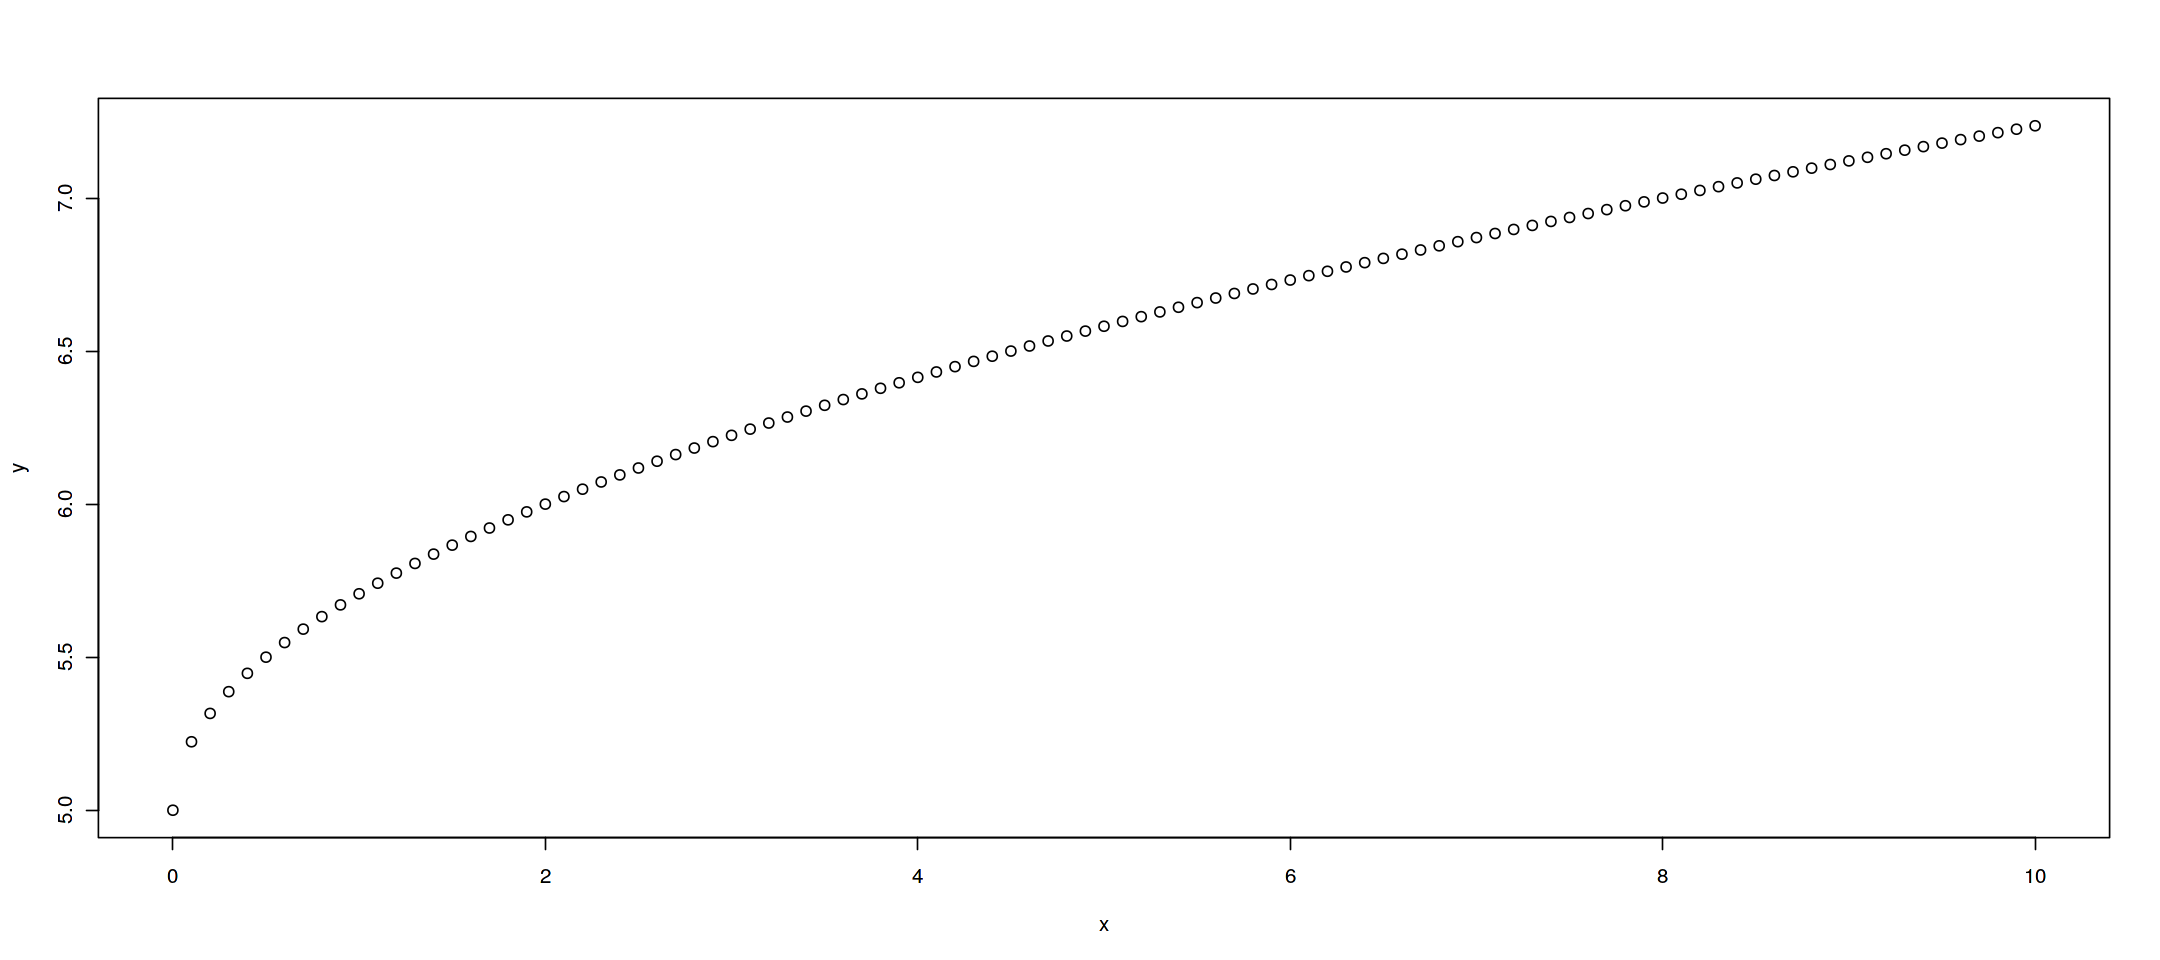

In [35]:
y <- (x/2)^{1/2} + 5 # acá pusimos C = 2, pero podría ser cualquier valor
plot(x,y)

* Si conocemos el valor de $C$ y $c$, y simplemente quisiéramos ***testear la funcionalidad***, es decir, corroborar si los datos corresponden a la función que escribimos arriba, entonces basta con definir una variable transformada $x' = (x/C)^{1/c} + 5$, con lo que la ec. de y queda:

$$ y = \Big(\frac{x}{C}\Big) ^{1/c} + 5 = x'$$

lo que entregaría una recta de pendiente 1 en una gráfica y vs. x'(si los datos se correspondieran con la función).


* Si no conocemos los valores de $C$ ni de $c$, entonces podríamos definir una variable transformada $y' = y-5 = (x/C)^{1/c}$. Esta ecuación es linealizable mediante logaritmos.

Vamos a hacer un ejemplito sin conocer el número, usando un generador de pseudo aleatorios:

In [3]:
set.seed(as.integer(runif(1,10,1000)))
C.azar <- runif(min = 0, max = 10, n = 1); #número aleatorio para la constante C
e.azar <- runif(min = 0, max = 10, n = 1); #número aleatorio para el denominador del exponente 1/c
y <- (x/ C.azar )^{1/e.azar} + 5
plot(x,y) 

In [4]:
y.prima <- y - 5;
plot(log(x), log(y.prima))
ajuste <- lm(log(y.prima) ~ log(x)); pendiente <- ajuste$coefficients[2];

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


ERROR: Error in eval(expr, envir, enclos): objeto 'ajuste' no encontrado


Bueno, el gráfico es una recta de pe a pa, pero al ajustar aparece un problema: es que tanto `x` como `y.prima` tienen ceros, y al calcular el logaritmo tira `NA/NaN/Inf in 'x'`. La solución es indexar los vectores con ` x > 0 ` ó `y.prima > 0`

In [5]:
ajuste <- lm(log(y.prima[x>0]) ~ log(x[x>0]));ord.origen <- ajuste$coefficients[1] ;pendiente <- ajuste$coefficients[2];

Ahora funciona y tenemos el ajuste. Nuevamente, los parámetros del ajuste necesitan ser identificados con funciones de los parámetros de la ecuación.

In [6]:
plot(log(x), log(y.prima))
abline(ajuste, col = "red")

***
***
# Tarea 3

Estimar `e.azar` y `C.azar` mediante los parámetros del ajuste. Explicitar todos los pasos, las transformaciones y las técnicas utilizadas.

Luego imprimir todo y comparar con los parámetros `e.azar` y `C.azar`.

***
***

# Guardando Gráficos en el disco

Para cerrar, vamos a ver cómo guardar estos gráficos al disco.

Primero, como siempre, indicamos un directorio de trabajo (acá abajo)

In [39]:
setwd("/home/juan/Escritorio/"); getwd()

[1] "/home/juan/Escritorio"

### 1. Guardando gráficos en pdf

In [40]:
pdf("Ejemplo.pdf",width=7,height=5) #acá va el tamaño, que puede ser útil

#plot
 x=rnorm(1000)
 y=rnorm(1000)
 plot(x,y, type = "l", lty= 1,lwd=1,col="Deepskyblue4")
 lines(y,x,lty=2,lwd = 0.25,col="green4")
#endplot

dev.off()

png 
  2

Se pueden usar otros formatos, pero el pdf siempre está bueno, porque es un formato vectorizado (preguntar a la gente de geoinformática) y no tiene problemas de resolución.

### 2. Guardando gráficos en png
 Siempre: resolución aceptable, pero no gigantesca, detalles, cositas...los archivos de píxeles son menos piolas, porque hay que estar cambiándolos de resolución según la necesidad de cada momento: si no se necesita mucha resolución, no hay problema, pero si éste es el caso, entonces el archivo se hace inmanejable en tamaño.

In [41]:
png("Ejemplo.png",units = "cm", width = 10, height = 10, res = 200) #acá va el tamaño, que puede ser útil

#plot
 x=rnorm(1000)
 y=rnorm(1000)
 plot(x,y, type = "l", lty= 1,lwd=1,col="Deepskyblue4")
 lines(y,x,lty=2,lwd = 0.25,col="green4")
#endplot

dev.off()

png 
  2

***
***

# Tarea 4

Guarde los gráficos que realizó en este archivo. Guárdelos en archivos que tengan igual ancho que alto, y en relación 16:9, como la relación de aspecto de una pantalla en una computadora portátil.

***
***

Colorín colorado, ese gráfico ya está cocinado.


***Nota***
En estos archivos de Jupyter voy a mezclar librerías de graficación, generalmente más piolas e incluso más fáciles de usar y salvar: el problema es que habitualmente tienen una sintaxis de código con reglas que sería necesario aprender, mientras que `plot()` es menos eficiente, menos bonito, etc., pero se puede utilizar sin aprender sintaxis nueva.

Cada quien robe lo que quiera, como siempre.